# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import torch
import time
import pytorch_lightning as pl
from pytorch_lightning import loggers
import config
from utils.Visual import draw_plot

# Run Adversarial Training

In [5]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
from attacks.pgd import ProjectedGradientDescent

exp_config = [{
              "attack_fn": ProjectedGradientDescent, 
              "attack_arg": {"norm":["inf"], "epsilon": [0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]},
              "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGSM"}
             }]

# uncomment this if you want to create a new experiment instead!
#experiment = RobustnessExperiment(exp_config, title="Ablation_DATASET1")
experiment = load_experiment(exp_folder = "0040_Ablation_DATASET1")

Loaded model 0040_Ablation_DATASET1


In [32]:
from utils.TrainHelper import TrainHelper, get_all_models_data
th = TrainHelper()

In [49]:
# define hyperparameters
hparams = torch.load("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN8K_D2/optuna_spec8kd2_0.9144.p")['hparams']

In [50]:
hparams

{'batch_size': 32,
 'learning_rate': 0.00010343266002469642,
 'p_dropout': 0.007489327720017605,
 'lr_decay': 0.9027701150847917,
 'n_hidden': 155,
 'weight_decay': 0.06739356340794497}

In [51]:
hparams["epochs"] = 20

In [6]:
##############################################################################################################
##############################################################################################################
##############################################################################################################

from attacks.pgd import ProjectedGradientDescent

from classification.models.M5 import M5PLModule
from classification.models.SpectrogramCNN import SpectrogramCNNPLModule
from classification.models.CRNN import CRNNPLModule
from classification.models.DeepRecursiveCNN import DeepRecursiveCNNPLModule
from classification.models.SpectrogramCNN_8K_Dataset2 import SpectrogramCNN_8K_Dataset2_PLModule
from classification.models.CRNN_8k_D2 import CRNN8k_D2_PLModule

from classification.models.AblationModel import AblationModelPLModule

# define attack configs
attack_configs = []
for i in range(50):
    epsilon = 0.1 + (i)/100
    attack_configs.append(
                      {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[epsilon], "num_iter": [1]
                                     },
                       "META": {"TITLE": f"L_inf_eps={epsilon}_iters=1"}
                       },
    )

In [21]:
attack_configs = []
attack_configs.extend([
                      {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[0.01], "num_iter": [2]
                                     },
                       "META": {"TITLE": f"L_inf_eps={0.01}_iters=2"}
                       },
                       {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[0.02], "num_iter": [2]
                                     },
                       "META": {"TITLE": f"L_inf_eps={0.02}_iters=2"}
                       },
                       {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[0.03], "num_iter": [2]
                                     },
                       "META": {"TITLE": f"L_inf_eps={0.03}_iters=2"}
                       },
                        {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[0.05], "num_iter": [2]
                                     },
                       "META": {"TITLE": f"L_inf_eps={0.05}_iters=2"}
                       }])

In [ ]:
models = th.run(SpectrogramCNN_8K_Dataset2_PLModule, hparams, attack_configs, save_epochs = [10,20,30,40], dataset_id=config.DATASET_CONTROL)
##############################################################################################################
##############################################################################################################
##############################################################################################################

GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d                  | 0     
7  | model.convs.5  | Dropout                    | 0     
8  | model.convs.6  | Conv2d                     | 20 K  
9  | model.convs.7  | BatchNorm2d                | 40    
10 | model.convs.8  | PReLU                      | 1     
11 | model.convs.9  | MaxPool2d                  | 0     
12 | model.convs.10 | Dropout                

loaded!
Training Models with Attack ProjectedGradientDescent (1 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


Val-Acc=0.011858974358974358


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.8634615384615385
Train-Acc=0.6408503365025104


Val-Acc=0.7932692307692307
Train-Acc=0.8274756970409144


Val-Acc=0.8878205128205128
Train-Acc=0.8275825232346972


Val-Acc=0.8967948717948718
Train-Acc=0.9144322187800449


Val-Acc=0.833974358974359
Train-Acc=0.9228714880888794


Val-Acc=0.7477564102564103
Train-Acc=0.9246875333831855


Val-Acc=0.7147435897435898
Train-Acc=0.9359042837303707


Val-Acc=0.8586538461538461
Train-Acc=0.9426343339386818


Val-Acc=0.8554487179487179
Train-Acc=0.944023074457857


Val-Acc=0.9
Train-Acc=0.9490439055656447
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59_epoch_10.p"


Val-Acc=0.7397435897435898
Train-Acc=0.9418865505822027


Val-Acc=0.7237179487179487
Train-Acc=0.941031941031941


Val-Acc=0.853525641025641
Train-Acc=0.9478688174340348


Val-Acc=0.8391025641025641
Train-Acc=0.9506462984723855


Val-Acc=0.8839743589743589
Train-Acc=0.9519282127977781


Val-Acc=0.8224358974358974
Train-Acc=0.9639995726952248


Val-Acc=0.8326923076923077
Train-Acc=0.9604743083003953


Val-Acc=0.7939102564102564
Train-Acc=0.9634654417263113


Val-Acc=0.7682692307692308
Train-Acc=0.9661360965708792


Val-Acc=0.8596153846153847
Train-Acc=0.968806751415447


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59.p"
Training Models with Attack ProjectedGradientDescent (2 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.008333333333333333


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6134615384615385
Train-Acc=0.540754192928106


Val-Acc=0.7474358974358974
Train-Acc=0.7002457002457002


Val-Acc=0.791025641025641
Train-Acc=0.8432859737207563


Val-Acc=0.7753205128205128
Train-Acc=0.8928533276359363


Val-Acc=0.6913461538461538
Train-Acc=0.9391090695438522


Val-Acc=0.8371794871794872
Train-Acc=0.9543852152547805


Val-Acc=0.9009615384615385
Train-Acc=0.9582309582309583


Val-Acc=0.7022435897435897
Train-Acc=0.9609016130755261


Val-Acc=0.9
Train-Acc=0.9570558700993483


Val-Acc=0.8198717948717948
Train-Acc=0.9649610084392694
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60_epoch_10.p"


Val-Acc=0.8727564102564103
Train-Acc=0.9666702275397927


Val-Acc=0.8833333333333333
Train-Acc=0.9680589680589681


Val-Acc=0.8766025641025641
Train-Acc=0.9647473560517039


Val-Acc=0.7846153846153846
Train-Acc=0.9658156179895311


Val-Acc=0.8323717948717949
Train-Acc=0.9675248370900544


Val-Acc=0.7932692307692307
Train-Acc=0.9703023181284051


Val-Acc=0.9038461538461539
Train-Acc=0.968806751415447


Val-Acc=0.8525641025641025
Train-Acc=0.9704091443221878


Val-Acc=0.9073717948717949
Train-Acc=0.9719047110351459


Val-Acc=0.9064102564102564
Train-Acc=0.9739344087170174


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60.p"
Training Models with Attack ProjectedGradientDescent (3 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.009294871794871795


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6176282051282052
Train-Acc=0.6229035359470142


Val-Acc=0.6875
Train-Acc=0.7989531033009294


Val-Acc=0.7375
Train-Acc=0.8872983655592351


Val-Acc=0.7291666666666666
Train-Acc=0.9274650144215362


Val-Acc=0.8432692307692308
Train-Acc=0.9283196239717979


Val-Acc=0.8836538461538461
Train-Acc=0.9345155432111953


Val-Acc=0.871474358974359
Train-Acc=0.9462664245272941


Val-Acc=0.775
Train-Acc=0.942527507744899


Val-Acc=0.7557692307692307
Train-Acc=0.9503258198910373


Val-Acc=0.8958333333333334
Train-Acc=0.9597265249439163
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61_epoch_10.p"


Val-Acc=0.7794871794871795
Train-Acc=0.9641063988890076


Val-Acc=0.8432692307692308
Train-Acc=0.9599401773314816


Val-Acc=0.8733974358974359
Train-Acc=0.962824484563615


Val-Acc=0.8782051282051282
Train-Acc=0.9646405298579211


Val-Acc=0.7490384615384615
Train-Acc=0.9670975323149236


Val-Acc=0.8801282051282051
Train-Acc=0.9648541822454866


Val-Acc=0.825
Train-Acc=0.9626108321760496


Val-Acc=0.7647435897435897
Train-Acc=0.9661360965708792


Val-Acc=0.8919871794871795
Train-Acc=0.9691272299967952


Val-Acc=0.7775641025641026
Train-Acc=0.9647473560517039


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61.p"
Training Models with Attack ProjectedGradientDescent (4 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.008012820512820512


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6291666666666667
Train-Acc=0.663924794359577


Val-Acc=0.5897435897435898
Train-Acc=0.8081401559662429


Val-Acc=0.6067307692307692
Train-Acc=0.8679628244845636


Val-Acc=0.6326923076923077
Train-Acc=0.8708471317166969


Val-Acc=0.6698717948717948
Train-Acc=0.8823843606452302


Val-Acc=0.7884615384615384
Train-Acc=0.8926396752483708


Val-Acc=0.6474358974358975
Train-Acc=0.9051383399209486


Val-Acc=0.6006410256410256
Train-Acc=0.910265997222519


Val-Acc=0.6525641025641026
Train-Acc=0.9073816899903856


Val-Acc=0.739423076923077
Train-Acc=0.9190257451127016
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62_epoch_10.p"


Val-Acc=0.6368589743589743
Train-Acc=0.9206281380194423


Val-Acc=0.5733974358974359
Train-Acc=0.9183847879500053


Val-Acc=0.8118589743589744
Train-Acc=0.9285332763593633


Val-Acc=0.6121794871794872
Train-Acc=0.9277854930028843


Val-Acc=0.794551282051282
Train-Acc=0.9351565003738916


Val-Acc=0.6141025641025641
Train-Acc=0.9317380621728448


Val-Acc=0.7006410256410256
Train-Acc=0.9315244097852794


Val-Acc=0.7650641025641025
Train-Acc=0.9397500267065484


Val-Acc=0.7458333333333333
Train-Acc=0.9401773314816793


Val-Acc=0.6810897435897436
Train-Acc=0.9441299006516398


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62.p"
Training Models with Attack ProjectedGradientDescent (5 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.010256410256410256


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5621794871794872
Train-Acc=0.6059181711355625


Val-Acc=0.7192307692307692
Train-Acc=0.7961756222625788


Val-Acc=0.6269230769230769
Train-Acc=0.849802371541502


Val-Acc=0.6012820512820513
Train-Acc=0.8936011109924153


Val-Acc=0.6701923076923076
Train-Acc=0.9174233522059609


Val-Acc=0.7237179487179487
Train-Acc=0.9369725456681979


Val-Acc=0.6307692307692307
Train-Acc=0.9434889434889435


Val-Acc=0.7410256410256411
Train-Acc=0.9548125200299113


Val-Acc=0.6330128205128205
Train-Acc=0.9507531246661681


Val-Acc=0.7695512820512821
Train-Acc=0.9601538297190471
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63_epoch_10.p"


Val-Acc=0.7817307692307692
Train-Acc=0.959833351137699


Val-Acc=0.6929487179487179
Train-Acc=0.9539579104796496


Val-Acc=0.6692307692307692
Train-Acc=0.9592992201687854


Val-Acc=0.6157051282051282
Train-Acc=0.9639995726952248


Val-Acc=0.7544871794871795
Train-Acc=0.9646405298579211


Val-Acc=0.7439102564102564
Train-Acc=0.9619698750133533


Val-Acc=0.7330128205128205
Train-Acc=0.9637859203076594


Val-Acc=0.6743589743589744
Train-Acc=0.9698750133532742


Val-Acc=0.7705128205128206
Train-Acc=0.9693408823843607


Val-Acc=0.6461538461538462
Train-Acc=0.9692340561905779


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63.p"
Training Models with Attack ProjectedGradientDescent (6 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.008333333333333333


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5586538461538462
Train-Acc=0.6468326033543425


Val-Acc=0.7304487179487179
Train-Acc=0.8183954705693837


Val-Acc=0.6278846153846154
Train-Acc=0.8660399529964747


Val-Acc=0.6503205128205128
Train-Acc=0.9127229996795214


Val-Acc=0.7060897435897436
Train-Acc=0.9221237047324004


Val-Acc=0.889102564102564
Train-Acc=0.9288537549407114


Val-Acc=0.8753205128205128
Train-Acc=0.9363315885055016


Val-Acc=0.7086538461538462
Train-Acc=0.9443435530392053


Val-Acc=0.6458333333333334
Train-Acc=0.9415660720008546


Val-Acc=0.7477564102564103
Train-Acc=0.9456254673645978
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64_epoch_10.p"


Val-Acc=0.6807692307692308
Train-Acc=0.9510736032475163


Val-Acc=0.7471153846153846
Train-Acc=0.9558807819677385


Val-Acc=0.657051282051282
Train-Acc=0.9597265249439163


Val-Acc=0.607051282051282
Train-Acc=0.9604743083003953


Val-Acc=0.6689102564102564
Train-Acc=0.9568422177117829


Val-Acc=0.7467948717948718
Train-Acc=0.9630381369511805


Val-Acc=0.7118589743589744
Train-Acc=0.9607947868817434


Val-Acc=0.7253205128205128
Train-Acc=0.9649610084392694


Val-Acc=0.6445512820512821
Train-Acc=0.9660292703770965


Val-Acc=0.7227564102564102
Train-Acc=0.9705159705159705


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64.p"
Training Models with Attack ProjectedGradientDescent (7 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.009294871794871795


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6253205128205128
Train-Acc=0.5735498344193997


Val-Acc=0.6358974358974359
Train-Acc=0.7610298045080653


Val-Acc=0.7836538461538461
Train-Acc=0.8676423459032154


Val-Acc=0.8615384615384616
Train-Acc=0.9158209592992201


Val-Acc=0.6855769230769231
Train-Acc=0.9134707830360004


Val-Acc=0.6480769230769231
Train-Acc=0.9188120927251362


Val-Acc=0.6490384615384616
Train-Acc=0.9428479863262472


Val-Acc=0.6435897435897436
Train-Acc=0.9381476337998077


Val-Acc=0.7903846153846154
Train-Acc=0.9411387672257238


Val-Acc=0.7471153846153846
Train-Acc=0.9477619912402521
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65_epoch_10.p"


Val-Acc=0.7208333333333333
Train-Acc=0.9478688174340348


Val-Acc=0.6455128205128206
Train-Acc=0.9542783890609977


Val-Acc=0.8480769230769231
Train-Acc=0.9502189936972546


Val-Acc=0.819551282051282
Train-Acc=0.9557739557739557


Val-Acc=0.6394230769230769
Train-Acc=0.9565217391304348


Val-Acc=0.8016025641025641
Train-Acc=0.959833351137699


Val-Acc=0.7743589743589744
Train-Acc=0.9567353915180002


Val-Acc=0.7685897435897436
Train-Acc=0.9610084392693088


Val-Acc=0.7185897435897436
Train-Acc=0.9626108321760496


Val-Acc=0.7583333333333333
Train-Acc=0.959833351137699


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65.p"
Training Models with Attack ProjectedGradientDescent (8 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.008333333333333333


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5477564102564103
Train-Acc=0.6632838371968807


Val-Acc=0.6326923076923077
Train-Acc=0.8268347398782181


Val-Acc=0.6032051282051282
Train-Acc=0.8743723961115265


Val-Acc=0.7576923076923077
Train-Acc=0.9035359470142079


Val-Acc=0.8217948717948718
Train-Acc=0.9183847879500053


Val-Acc=0.6708333333333333
Train-Acc=0.932806324110672


Val-Acc=0.5573717948717949
Train-Acc=0.9366520670868497


Val-Acc=0.6041666666666666
Train-Acc=0.9415660720008546


Val-Acc=0.5833333333333334
Train-Acc=0.9465869031086422


Val-Acc=0.5458333333333333
Train-Acc=0.9502189936972546
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66_epoch_10.p"


Val-Acc=0.6073717948717948
Train-Acc=0.9539579104796496


Val-Acc=0.5913461538461539
Train-Acc=0.9576968272620446


Val-Acc=0.5721153846153846
Train-Acc=0.9558807819677385


Val-Acc=0.6381410256410256
Train-Acc=0.9583377844247409


Val-Acc=0.5900641025641026
Train-Acc=0.9618630488195705


Val-Acc=0.6278846153846154
Train-Acc=0.9625040059822668


Val-Acc=0.5967948717948718
Train-Acc=0.9626108321760496


Val-Acc=0.6487179487179487
Train-Acc=0.9654951394081829


Val-Acc=0.8134615384615385
Train-Acc=0.9693408823843607


Val-Acc=0.6208333333333333
Train-Acc=0.9646405298579211


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66.p"
Training Models with Attack ProjectedGradientDescent (9 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.01217948717948718


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5205128205128206
Train-Acc=0.6260014955667129


Val-Acc=0.5397435897435897
Train-Acc=0.7986326247195813


Val-Acc=0.5884615384615385
Train-Acc=0.8858027988462771


Val-Acc=0.5487179487179488
Train-Acc=0.9252216643520992


Val-Acc=0.6336538461538461
Train-Acc=0.9354769789552398


Val-Acc=0.6442307692307693
Train-Acc=0.9377203290246768


Val-Acc=0.6157051282051282
Train-Acc=0.9375066766371114


Val-Acc=0.566025641025641
Train-Acc=0.9431684649075953


Val-Acc=0.5400641025641025
Train-Acc=0.943702595876509


Val-Acc=0.5397435897435897
Train-Acc=0.9432752911013781
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67_epoch_10.p"


Val-Acc=0.5980769230769231
Train-Acc=0.9439162482640744


Val-Acc=0.5506410256410257
Train-Acc=0.9455186411708151


Val-Acc=0.5480769230769231
Train-Acc=0.9456254673645978


Val-Acc=0.5381410256410256
Train-Acc=0.9501121675034718


Val-Acc=0.5602564102564103
Train-Acc=0.9482961222091657


Val-Acc=0.5948717948717949
Train-Acc=0.9497916889221237


Val-Acc=0.5708333333333333
Train-Acc=0.948937079371862


Val-Acc=0.5522435897435898
Train-Acc=0.952675996154257


Val-Acc=0.5875
Train-Acc=0.9516077342164299


Val-Acc=0.5875
Train-Acc=0.9545988676423459


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67.p"
Training Models with Attack ProjectedGradientDescent (10 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.011858974358974358


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5528846153846154
Train-Acc=0.6262151479542784


Val-Acc=0.7330128205128205
Train-Acc=0.7848520457216109


Val-Acc=0.5166666666666667
Train-Acc=0.8538617669052452


Val-Acc=0.5407051282051282
Train-Acc=0.8744792223053093


Val-Acc=0.8560897435897435
Train-Acc=0.8999038564255956


Val-Acc=0.5974358974358974
Train-Acc=0.907595342377951


Val-Acc=0.5605769230769231
Train-Acc=0.9194530498878325


Val-Acc=0.5471153846153847
Train-Acc=0.92564896912723


Val-Acc=0.528525641025641
Train-Acc=0.9208417904070078


Val-Acc=0.5477564102564103
Train-Acc=0.9305629740412349
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68_epoch_10.p"


Val-Acc=0.5990384615384615
Train-Acc=0.9254353167396646


Val-Acc=0.5365384615384615
Train-Acc=0.937293024249546


Val-Acc=0.5788461538461539
Train-Acc=0.9378271552184596


Val-Acc=0.5621794871794872
Train-Acc=0.9360111099241534


Val-Acc=0.5522435897435898
Train-Acc=0.9317380621728448


Val-Acc=0.5317307692307692
Train-Acc=0.9396432005127657


Val-Acc=0.5977564102564102
Train-Acc=0.9355838051490225


Val-Acc=0.5294871794871795
Train-Acc=0.9373998504433287


Val-Acc=0.5894230769230769
Train-Acc=0.9403909838692447


Val-Acc=0.5490384615384616
Train-Acc=0.9455186411708151


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68.p"
Training Models with Attack ProjectedGradientDescent (11 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.010576923076923078


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.510576923076923
Train-Acc=0.6109390022433501


Val-Acc=0.5108974358974359
Train-Acc=0.7575045401132358


Val-Acc=0.6592948717948718
Train-Acc=0.8491614143788057


Val-Acc=0.6080128205128205
Train-Acc=0.9044973827582523


Val-Acc=0.6833333333333333
Train-Acc=0.9085567781219955


Val-Acc=0.7150641025641026
Train-Acc=0.9213759213759214


Val-Acc=0.658974358974359
Train-Acc=0.9357974575365879


Val-Acc=0.575
Train-Acc=0.9285332763593633


Val-Acc=0.6240384615384615
Train-Acc=0.9341950646298472


Val-Acc=0.6051282051282051
Train-Acc=0.9315244097852794
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69_epoch_10.p"


Val-Acc=0.7538461538461538
Train-Acc=0.9356906313428053


Val-Acc=0.6826923076923077
Train-Acc=0.9469073816899903


Val-Acc=0.8416666666666667
Train-Acc=0.9459459459459459


Val-Acc=0.6583333333333333
Train-Acc=0.9382544599935905


Val-Acc=0.7778846153846154
Train-Acc=0.9430616387138127


Val-Acc=0.8532051282051282
Train-Acc=0.9435957696827262


Val-Acc=0.6512820512820513
Train-Acc=0.9448776840081188


Val-Acc=0.7099358974358975
Train-Acc=0.9401773314816793


Val-Acc=0.7326923076923076
Train-Acc=0.9428479863262472


Val-Acc=0.6333333333333333
Train-Acc=0.9444503792329879


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69.p"
Training Models with Attack ProjectedGradientDescent (12 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.01217948717948718


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5666666666666667
Train-Acc=0.6405298579211622


Val-Acc=0.6618589743589743
Train-Acc=0.7986326247195813


Val-Acc=0.6112179487179488
Train-Acc=0.8533276359363315


Val-Acc=0.555448717948718
Train-Acc=0.8795000534130969


Val-Acc=0.5567307692307693
Train-Acc=0.8972332015810277


Val-Acc=0.5836538461538462
Train-Acc=0.9173165260121782


Val-Acc=0.5637820512820513
Train-Acc=0.9190257451127016


Val-Acc=0.6621794871794872
Train-Acc=0.9255421429334473


Val-Acc=0.5560897435897436
Train-Acc=0.9332336288858027


Val-Acc=0.7608974358974359
Train-Acc=0.9361179361179361
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70_epoch_10.p"


Val-Acc=0.5637820512820513
Train-Acc=0.9409251148381583


Val-Acc=0.5788461538461539
Train-Acc=0.940284157675462


Val-Acc=0.5551282051282052
Train-Acc=0.9388954171562868


Val-Acc=0.5355769230769231
Train-Acc=0.9459459459459459


Val-Acc=0.5644230769230769
Train-Acc=0.9469073816899903


Val-Acc=0.5714743589743589
Train-Acc=0.9417797243884201


Val-Acc=0.5525641025641026
Train-Acc=0.9471210340775558


Val-Acc=0.5570512820512821
Train-Acc=0.9465869031086422


Val-Acc=0.5394230769230769
Train-Acc=0.9492575579532101


Val-Acc=0.5375
Train-Acc=0.9461595983335114


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70.p"
Training Models with Attack ProjectedGradientDescent (13 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.01217948717948718


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5490384615384616
Train-Acc=0.5971584232453798


Val-Acc=0.5317307692307692
Train-Acc=0.7400918705266532


Val-Acc=0.5525641025641026
Train-Acc=0.8554641598119859


Val-Acc=0.5801282051282052
Train-Acc=0.8814229249011858


Val-Acc=0.5532051282051282
Train-Acc=0.8834526225830573


Val-Acc=0.867948717948718
Train-Acc=0.9109069543852153


Val-Acc=0.8474358974358974
Train-Acc=0.9051383399209486


Val-Acc=0.5253205128205128
Train-Acc=0.9127229996795214


Val-Acc=0.5288461538461539
Train-Acc=0.9153936545240893


Val-Acc=0.5551282051282052
Train-Acc=0.9165687426556992
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71_epoch_10.p"


Val-Acc=0.8169871794871795
Train-Acc=0.9296015382971905


Val-Acc=0.7044871794871795
Train-Acc=0.9307766264288003


Val-Acc=0.6567307692307692
Train-Acc=0.9322721931417584


Val-Acc=0.5737179487179487
Train-Acc=0.9337677598547164


Val-Acc=0.5442307692307692
Train-Acc=0.9312039312039312


Val-Acc=0.6080128205128205
Train-Acc=0.9353701527614571


Val-Acc=0.5846153846153846
Train-Acc=0.9392158957376349


Val-Acc=0.5487179487179488
Train-Acc=0.938040807606025


Val-Acc=0.5391025641025641
Train-Acc=0.9376135028308942


Val-Acc=0.5461538461538461
Train-Acc=0.9415660720008546


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71.p"
Training Models with Attack ProjectedGradientDescent (14 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.010256410256410256


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5195512820512821
Train-Acc=0.6002563828650785


Val-Acc=0.5868589743589744
Train-Acc=0.7357119965815618


Val-Acc=0.591025641025641
Train-Acc=0.8428586689456254


Val-Acc=0.6701923076923076
Train-Acc=0.8708471317166969


Val-Acc=0.614423076923077
Train-Acc=0.8905031513727166


Val-Acc=0.8528846153846154
Train-Acc=0.9205213118256597


Val-Acc=0.5833333333333334
Train-Acc=0.9208417904070078


Val-Acc=0.5846153846153846
Train-Acc=0.9225510095075312


Val-Acc=0.580448717948718
Train-Acc=0.915500480717872


Val-Acc=0.6012820512820513
Train-Acc=0.9257557953210127
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72_epoch_10.p"


Val-Acc=0.5516025641025641
Train-Acc=0.930135669266104


Val-Acc=0.5557692307692308
Train-Acc=0.9399636790941138


Val-Acc=0.6
Train-Acc=0.9331268026920201


Val-Acc=0.5467948717948717
Train-Acc=0.938788590962504


Val-Acc=0.6073717948717948
Train-Acc=0.9450913363956842


Val-Acc=0.5477564102564103
Train-Acc=0.9471210340775558


Val-Acc=0.6294871794871795
Train-Acc=0.9479756436278175


Val-Acc=0.6913461538461538
Train-Acc=0.9449845102019016


Val-Acc=0.573076923076923
Train-Acc=0.9503258198910373


Val-Acc=0.5923076923076923
Train-Acc=0.9525691699604744


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 620 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72_epoch_20.p"

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72.p"
Training Models with Attack ProjectedGradientDescent (15 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.015064102564102564


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5089743589743589
Train-Acc=0.6146779190257451


Val-Acc=0.7974358974358975
Train-Acc=0.7879500053413097


Val-Acc=0.5233974358974359
Train-Acc=0.863689776733255


Val-Acc=0.6496794871794872
Train-Acc=0.8919987180856747


Val-Acc=0.5692307692307692
Train-Acc=0.9111206067727807


Val-Acc=0.6291666666666667
Train-Acc=0.9242602286080547


Val-Acc=0.525
Train-Acc=0.9224441833137486


Val-Acc=0.5288461538461539
Train-Acc=0.9307766264288003


Val-Acc=0.5189102564102565
Train-Acc=0.9274650144215362


Val-Acc=0.5262820512820513
Train-Acc=0.9310971050101485
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v73_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v73_epoch_10.p"


# Create Plots

Loaded model 0025_EVAL_DATASET2
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:26<00:00,  9.56s/it]


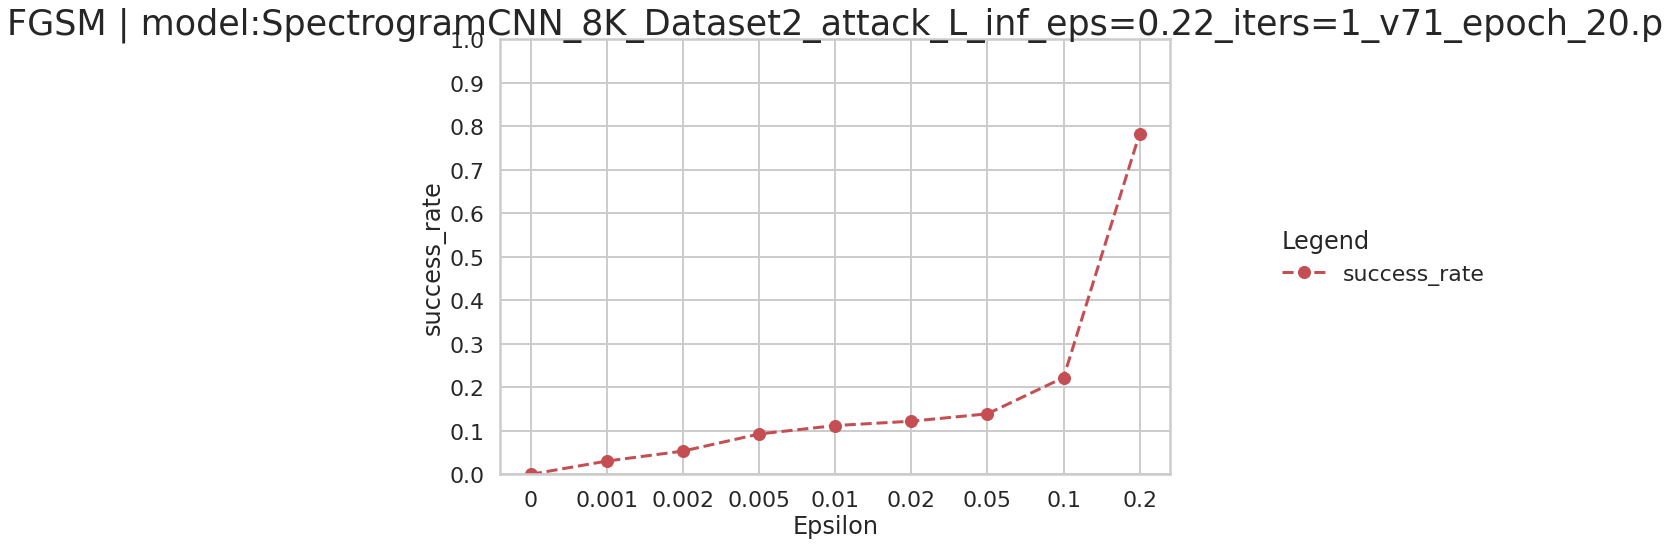

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:59<00:00, 13.25s/it]


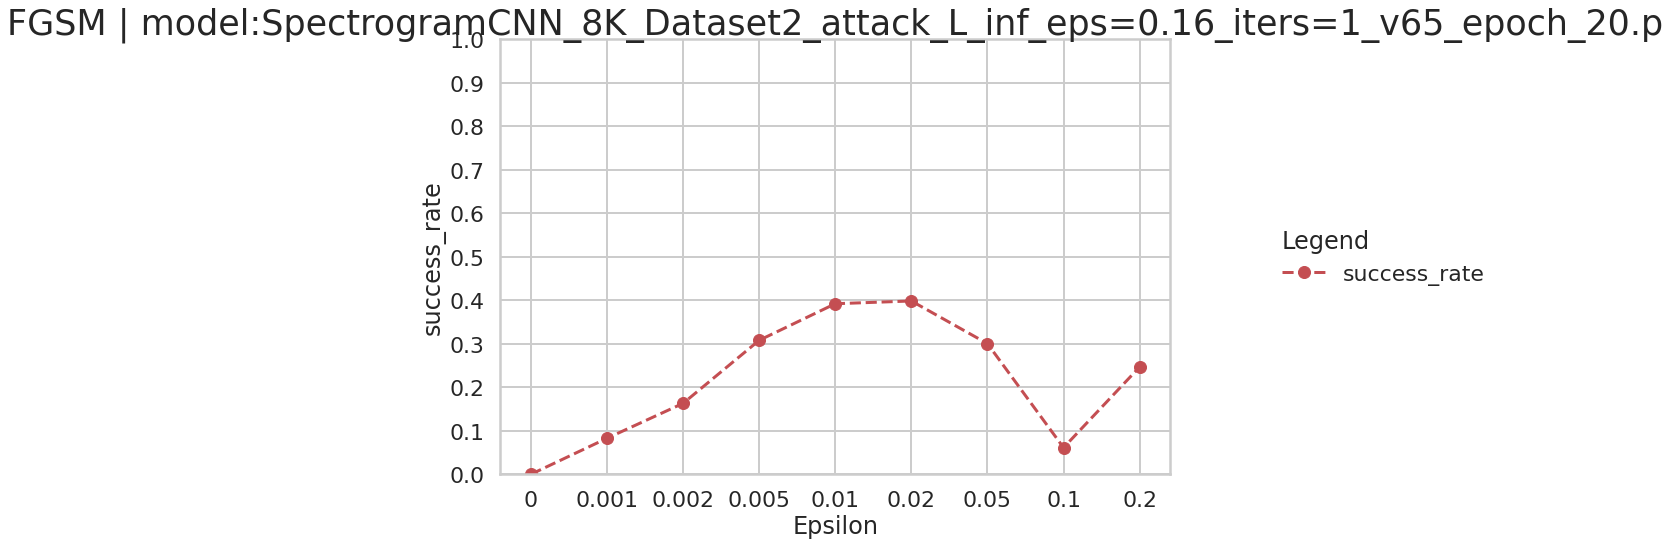

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v73_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v73_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:44<00:00, 11.62s/it]


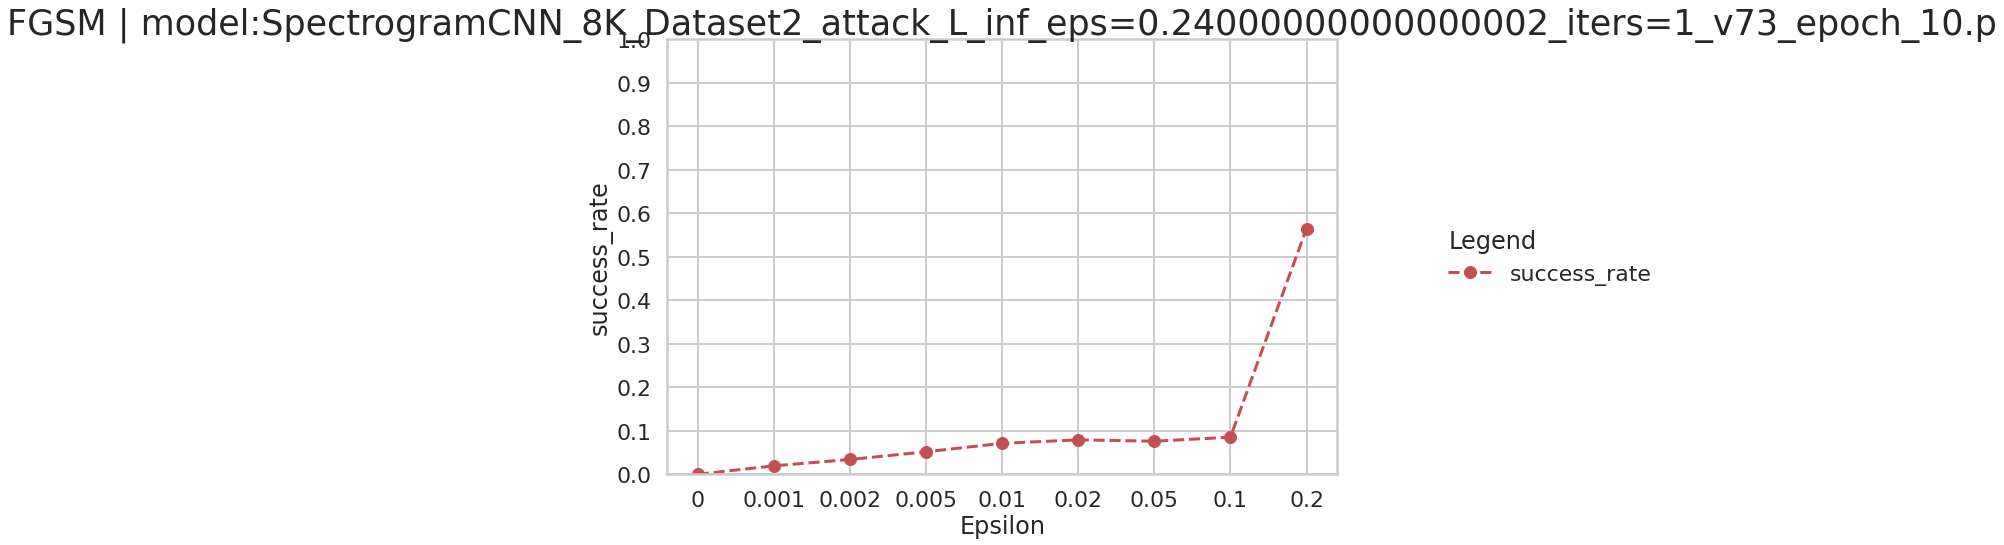

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:46<00:00, 11.82s/it]


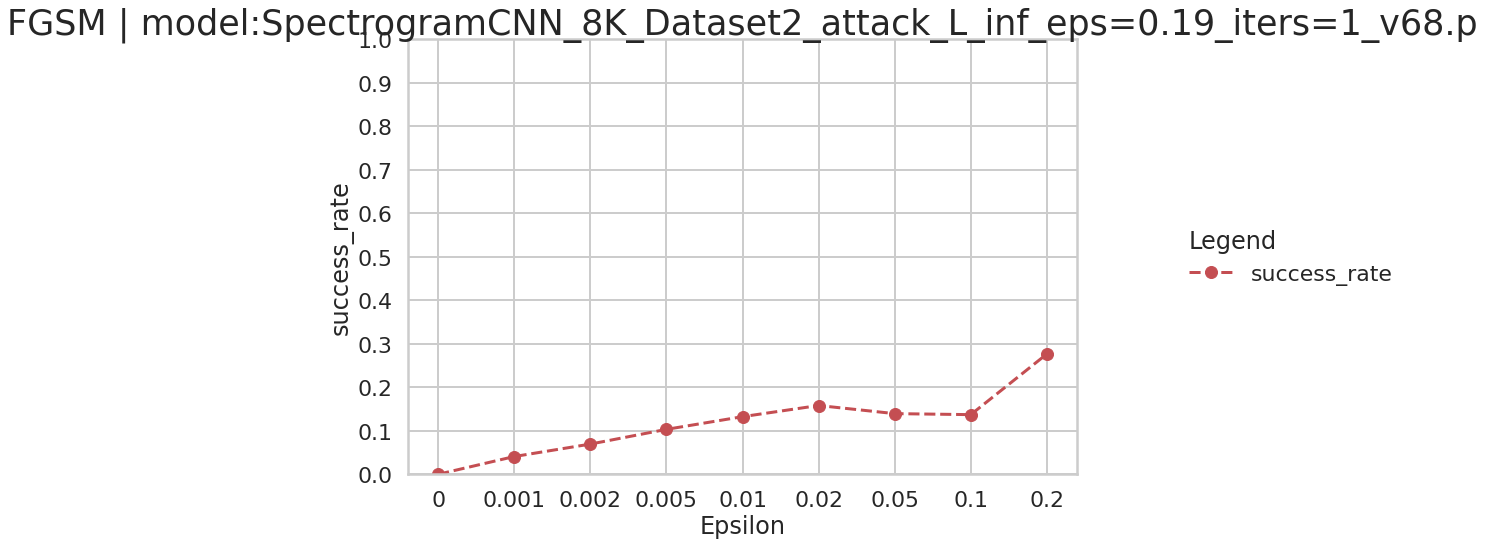

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [02:01<00:00, 13.51s/it]


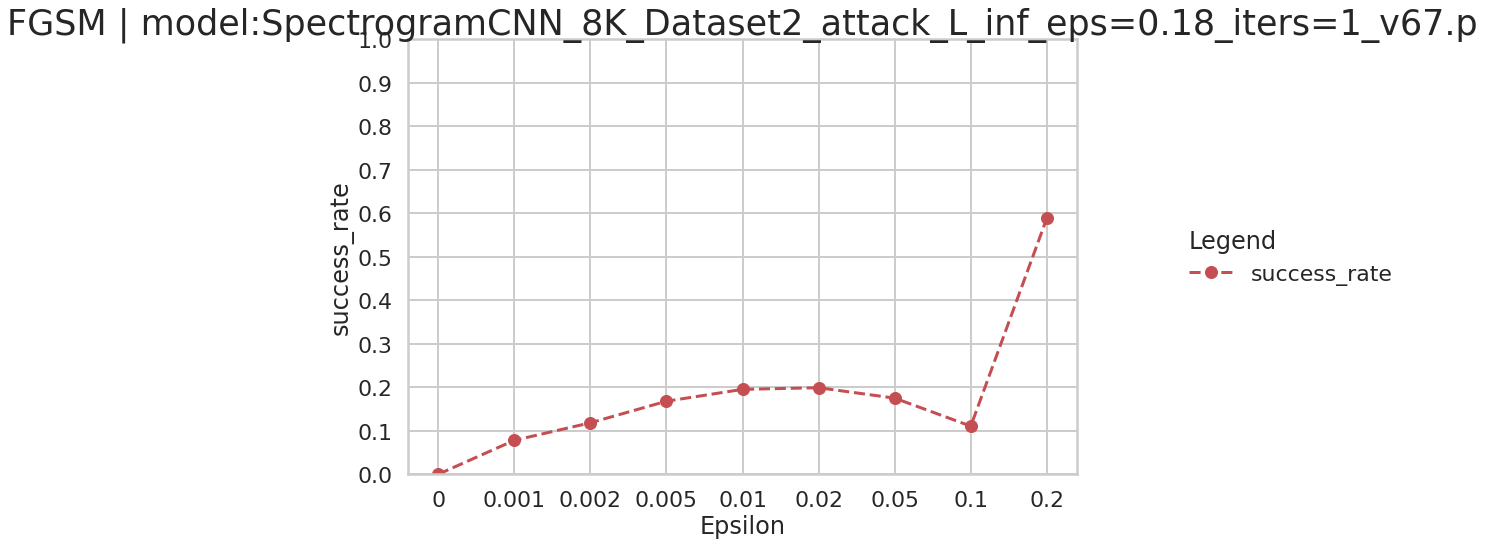

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:38<00:00, 10.94s/it]


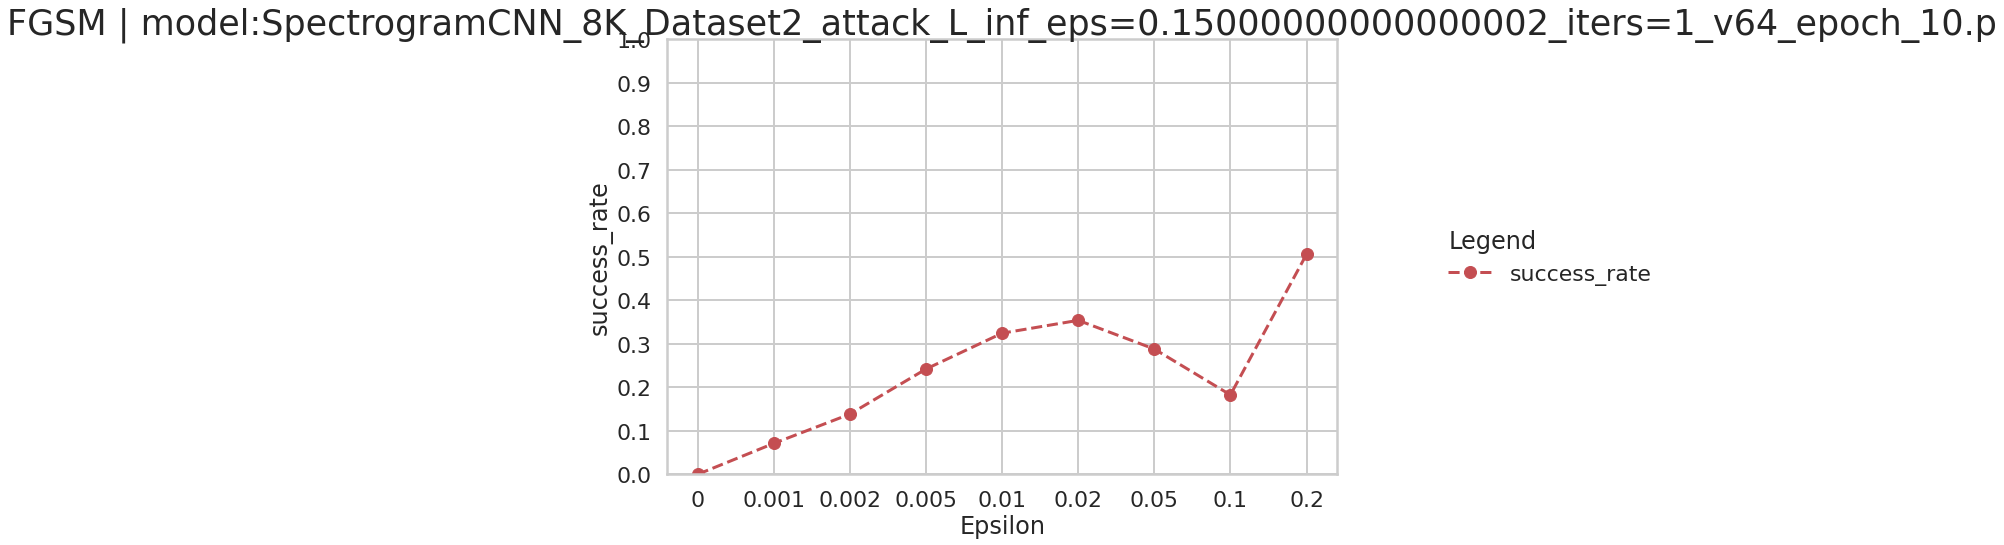

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:03<00:00,  7.11s/it]


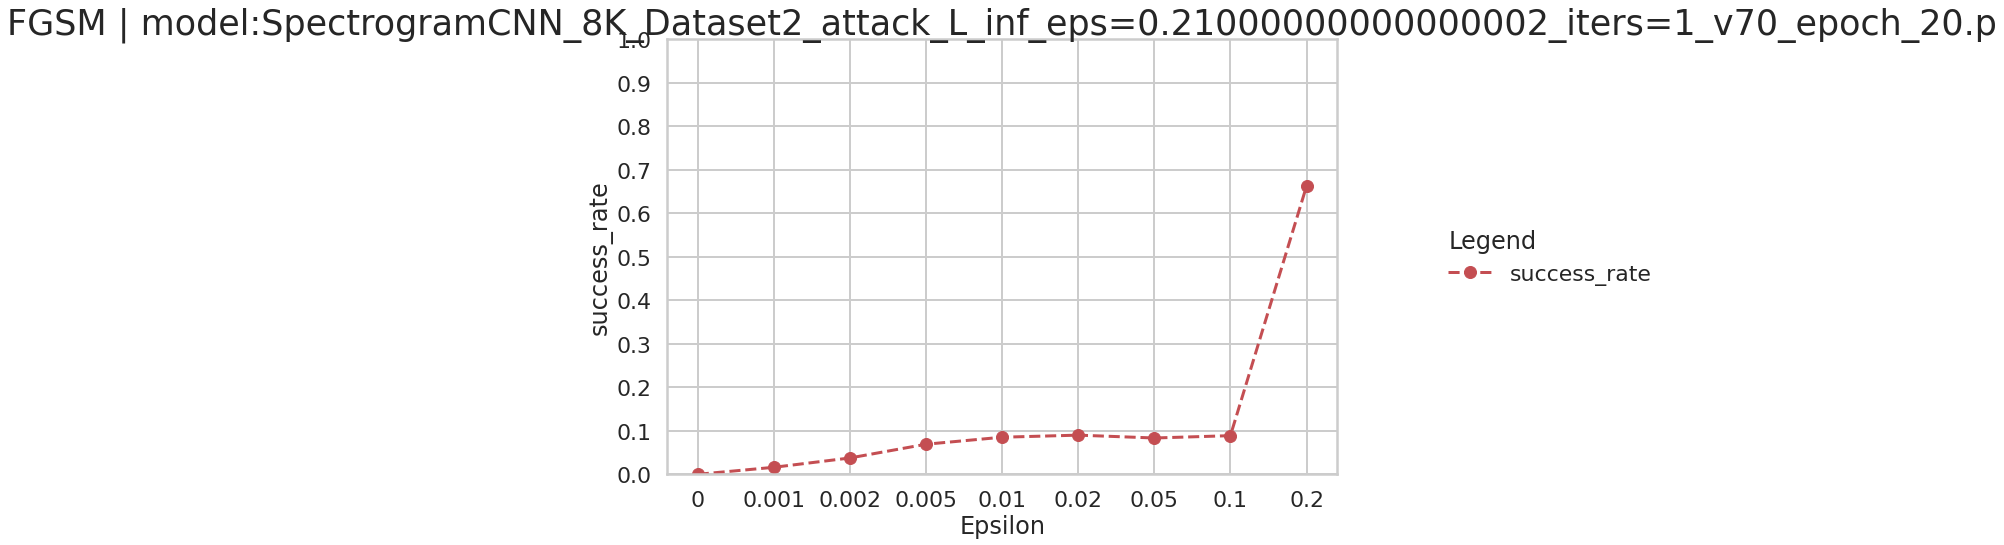

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:53<00:00,  5.97s/it]


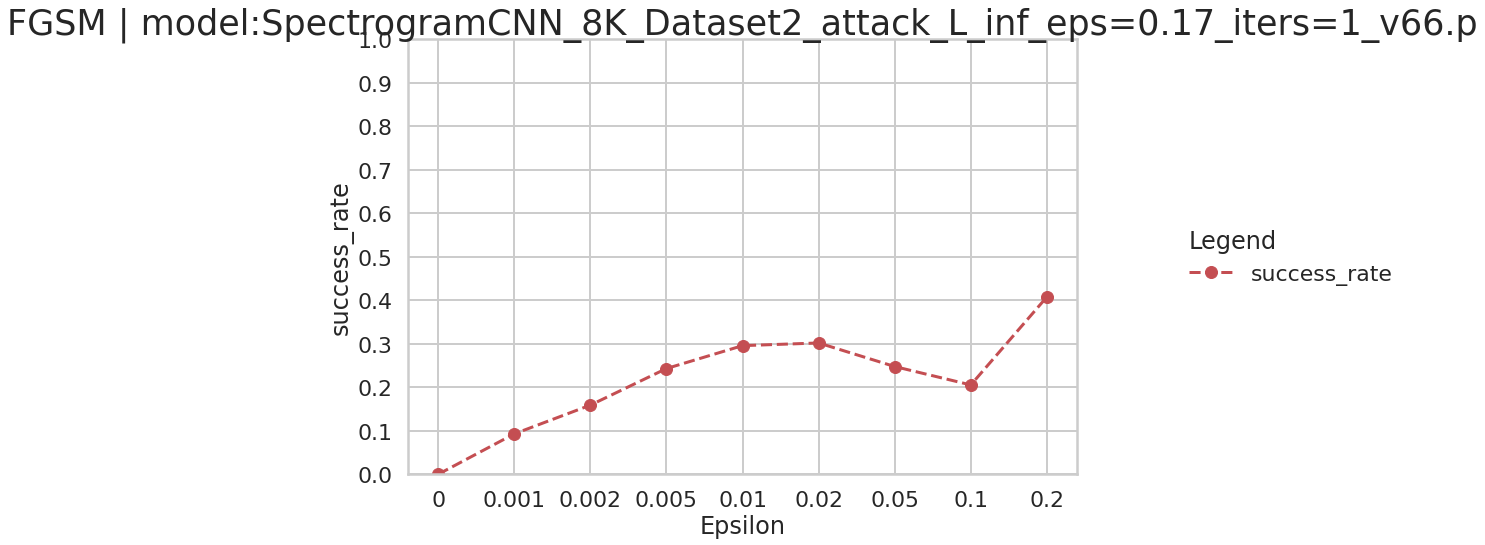

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v54_epoch_20.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v54_epoch_20.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:59<00:00,  6.60s/it]


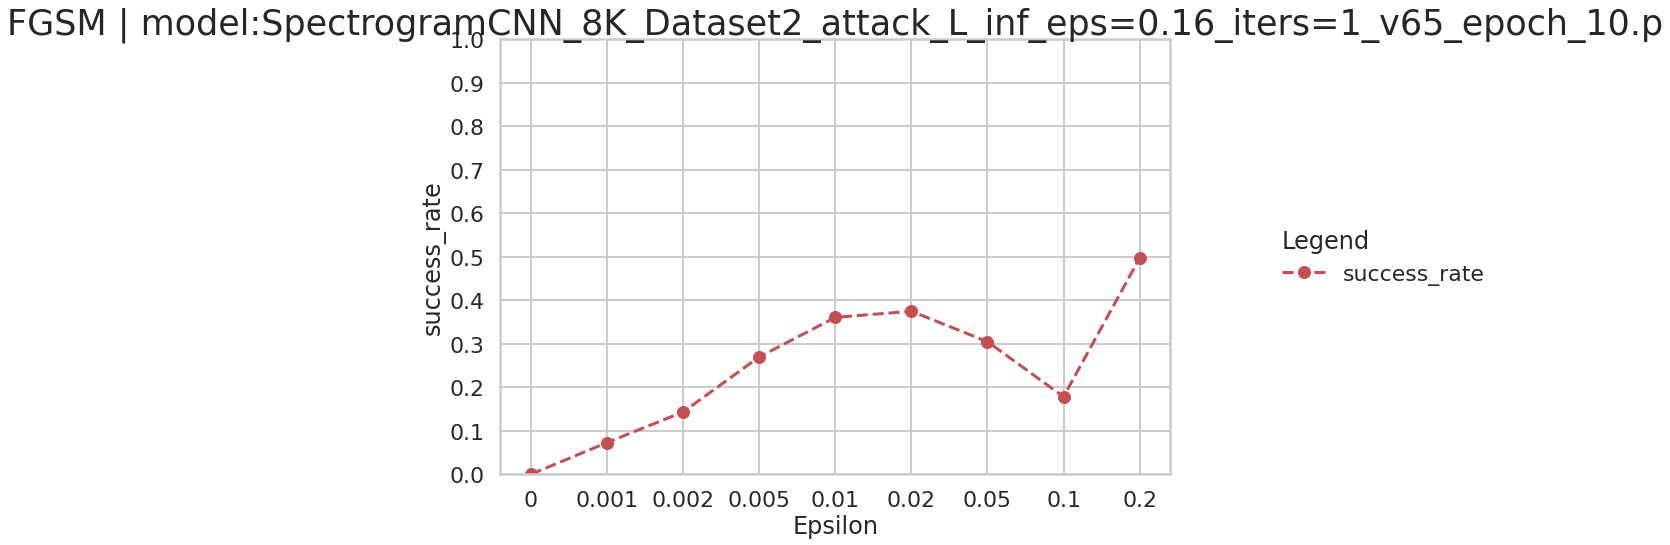

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v53_epoch_20.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v53_epoch_20.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:06<00:00,  7.39s/it]


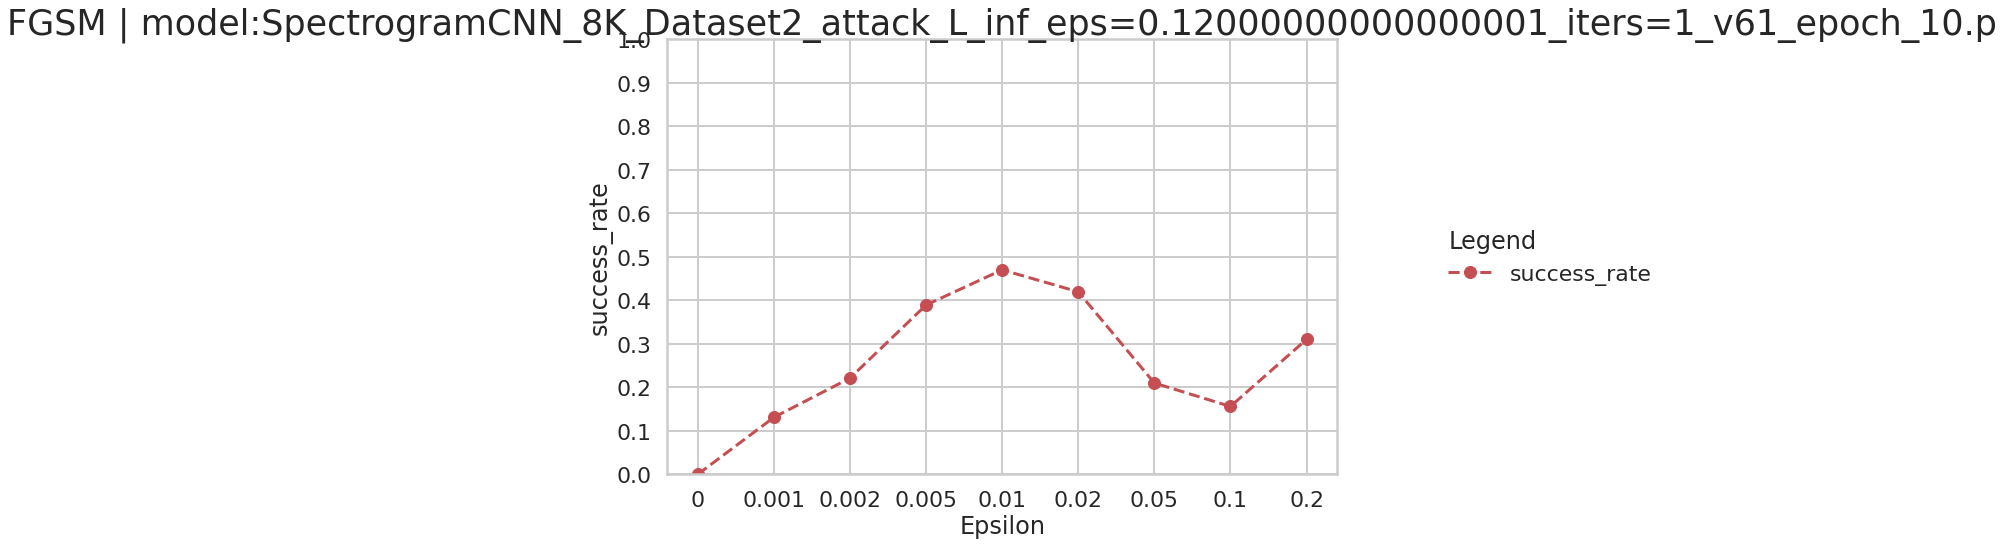

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v52_epoch_20.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v52_epoch_20.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v73_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v73_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:50<00:00,  5.61s/it]


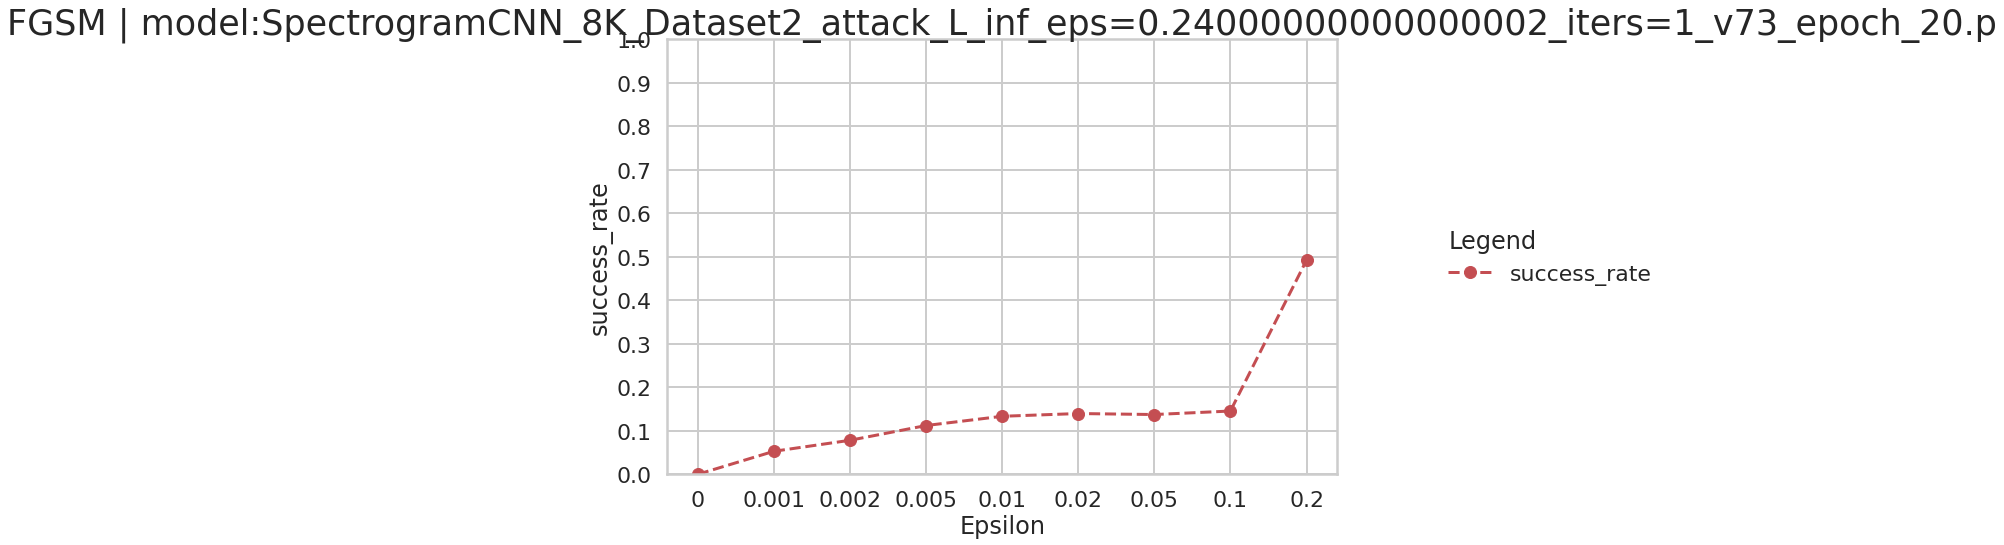

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v54_epoch_10.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v54_epoch_10.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v53.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model Spe

  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:50<00:00,  5.61s/it]


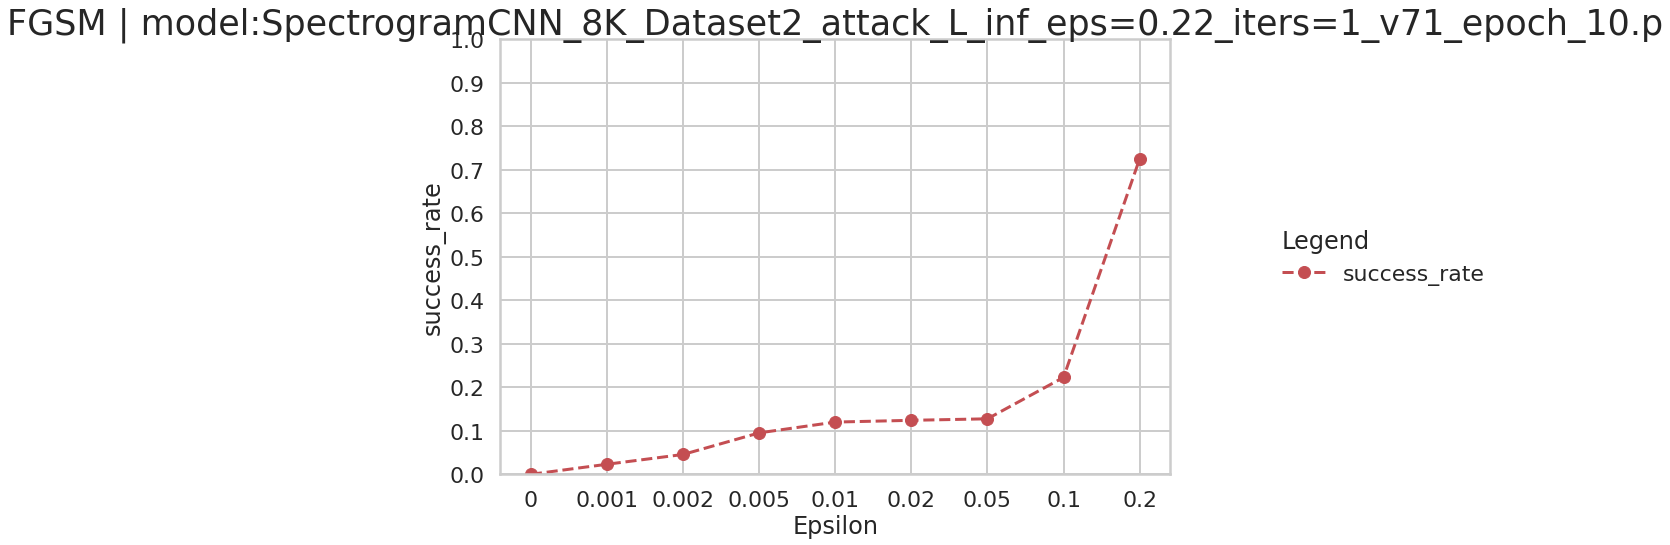

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v74.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v74.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:53<00:00,  5.92s/it]


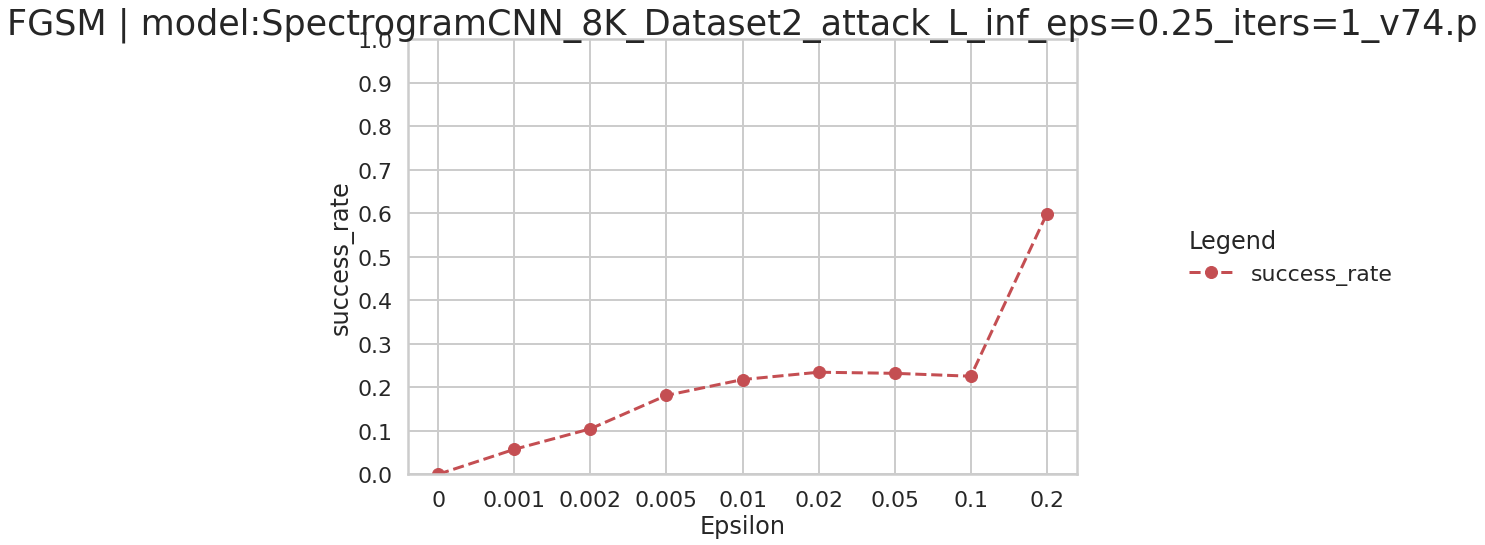

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v50_epoch_10.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v50_epoch_10.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v50.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model Spectr

  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v76_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v76_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:48<00:00,  5.40s/it]


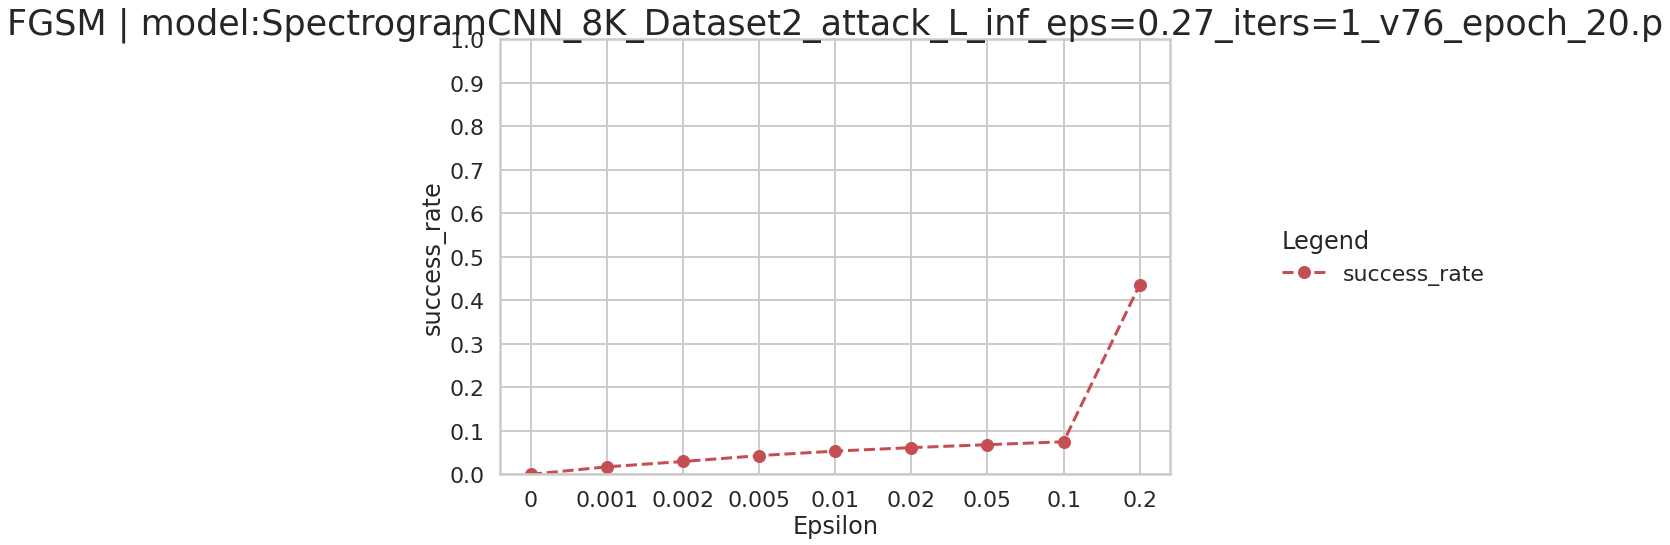

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v51_epoch_20.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v51_epoch_20.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v54.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model Spe

  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:06<00:00,  7.34s/it]


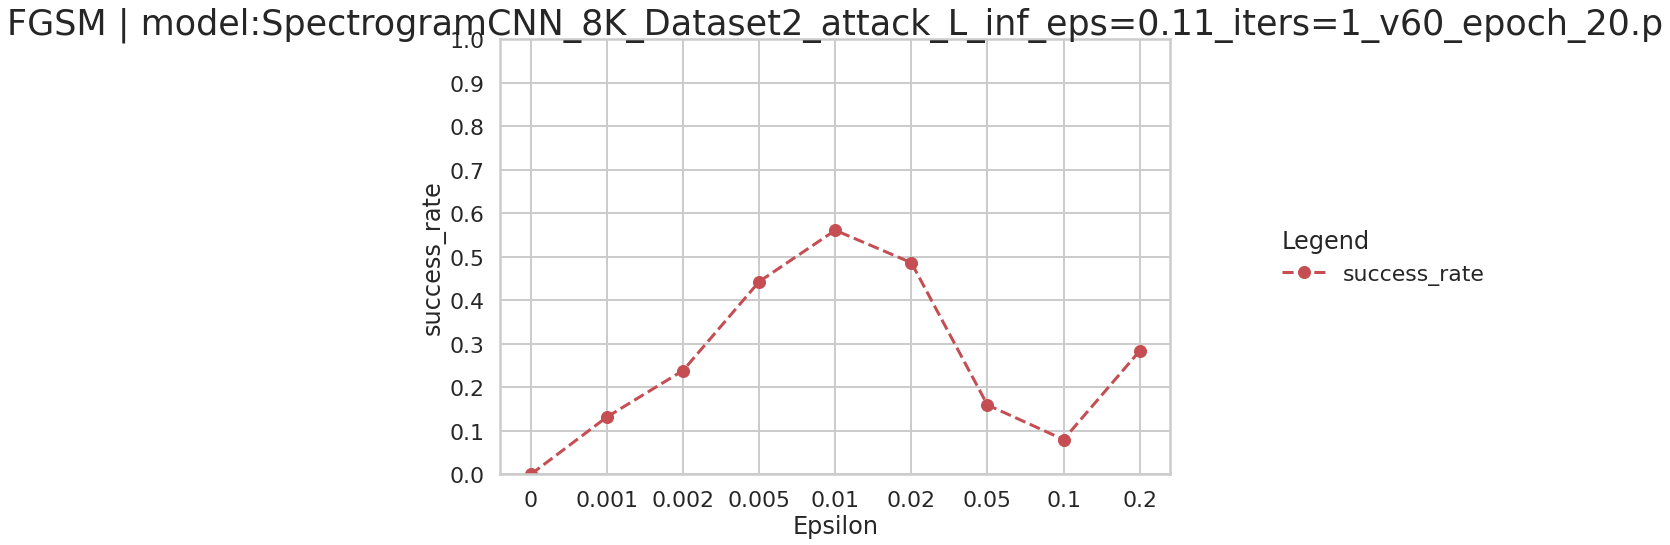

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:50<00:00,  5.56s/it]


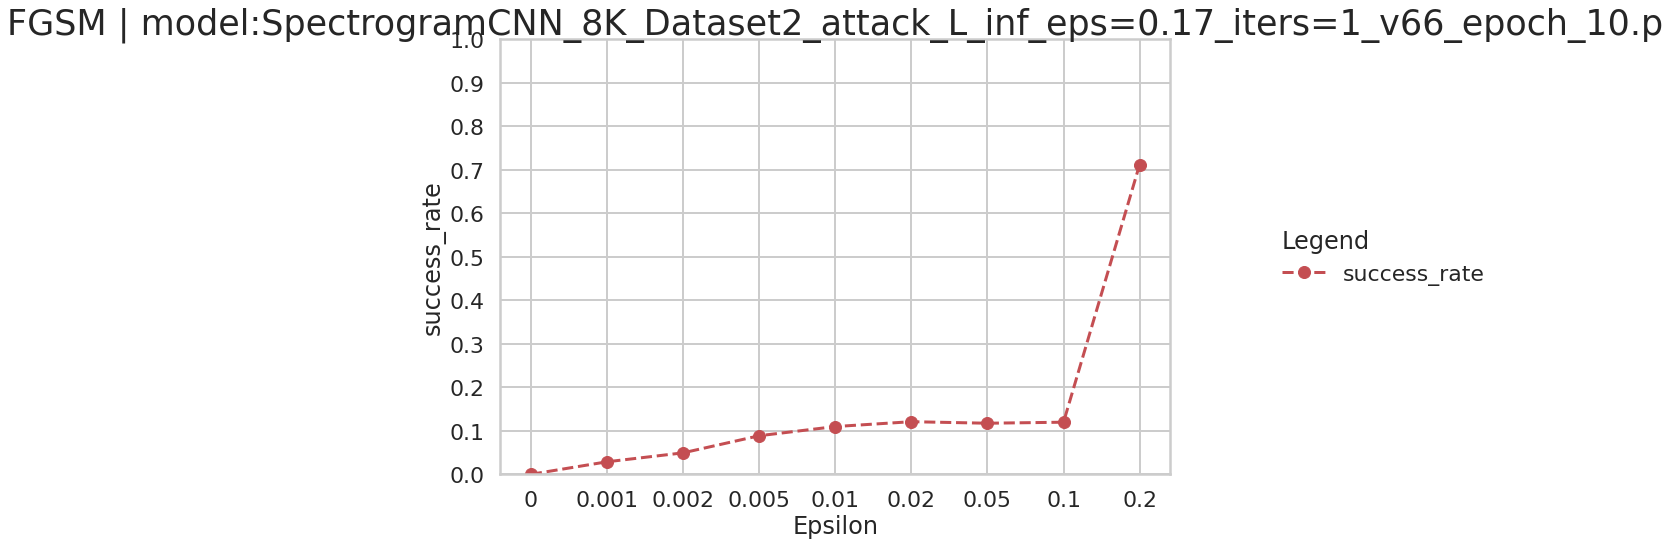

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:00<00:00,  6.67s/it]


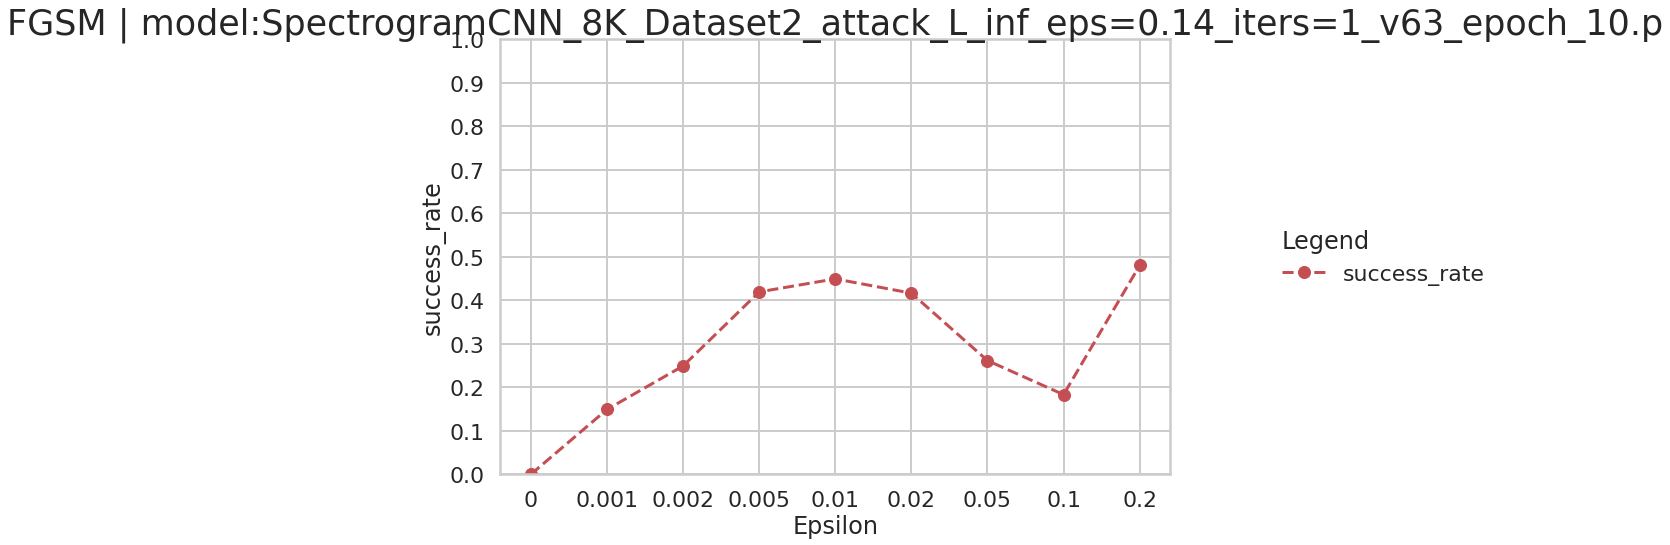

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:58<00:00,  6.54s/it]


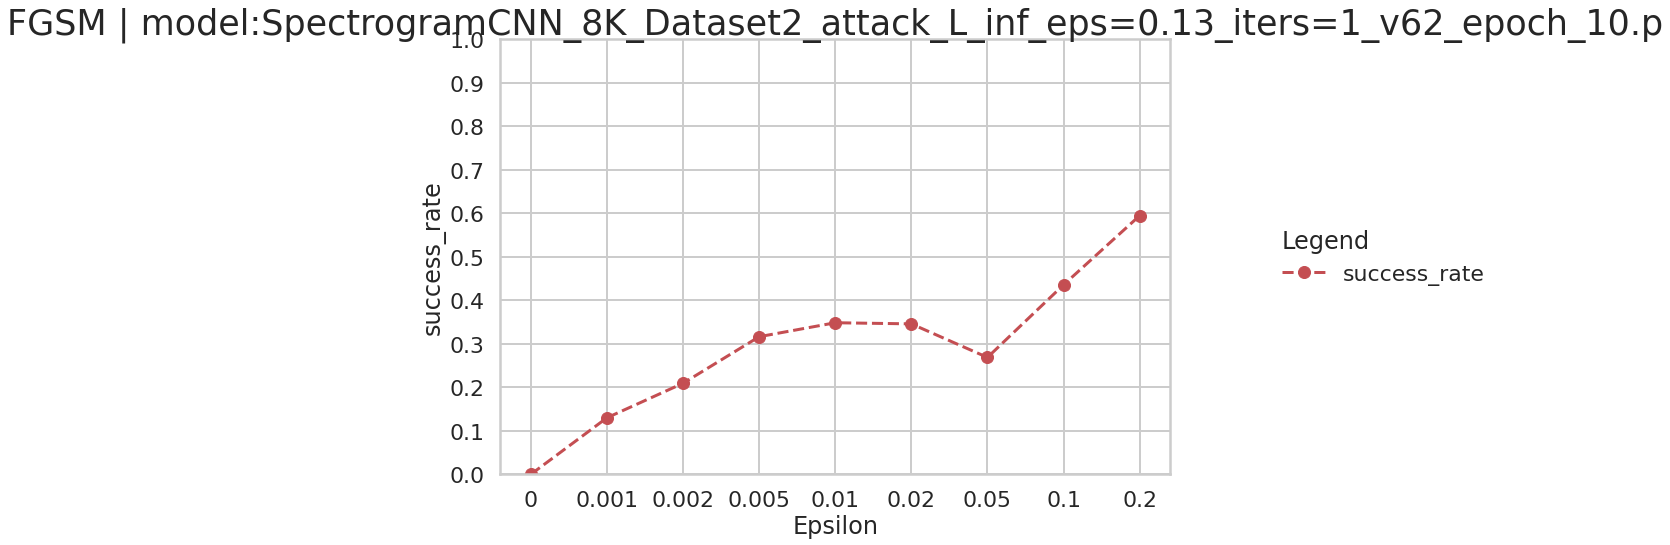

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:00<00:00,  6.74s/it]


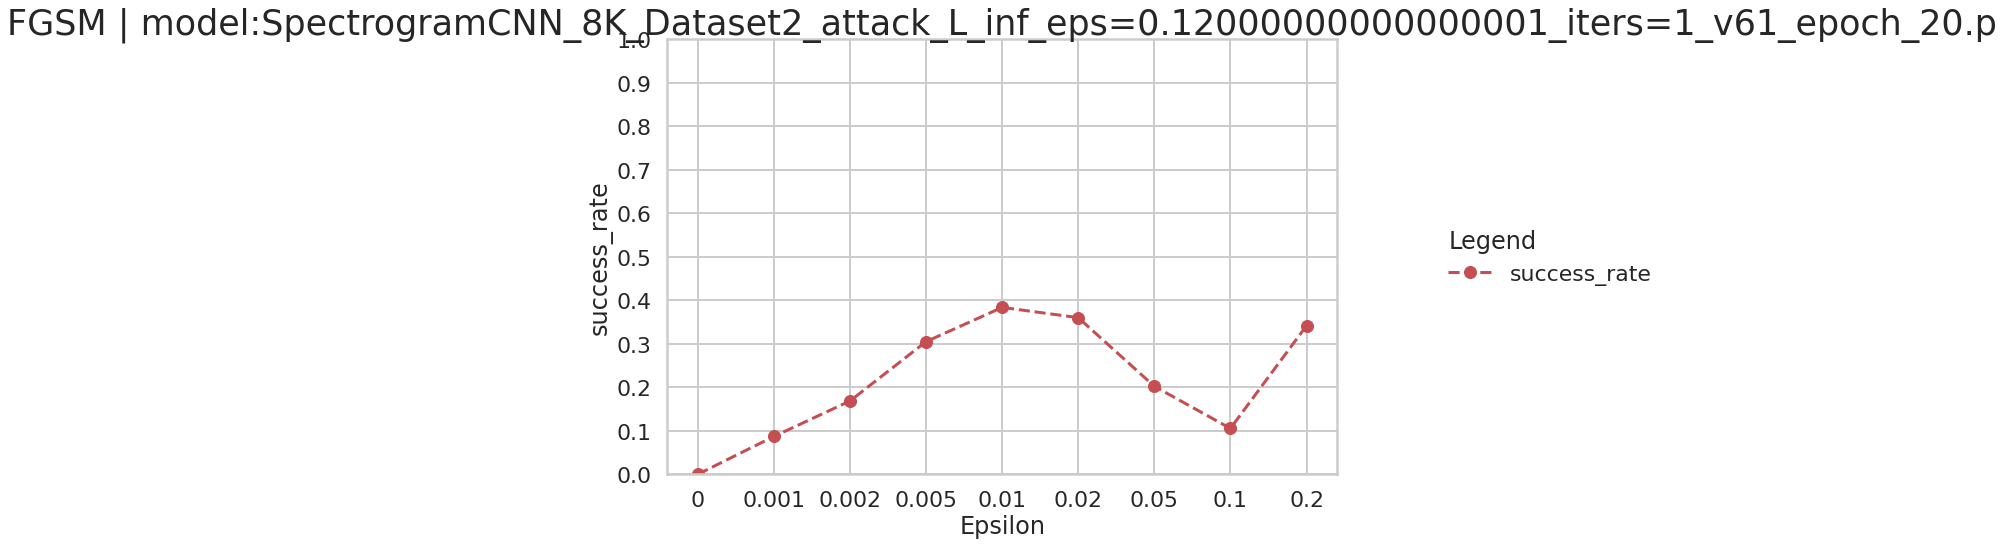

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v66_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:53<00:00,  5.92s/it]


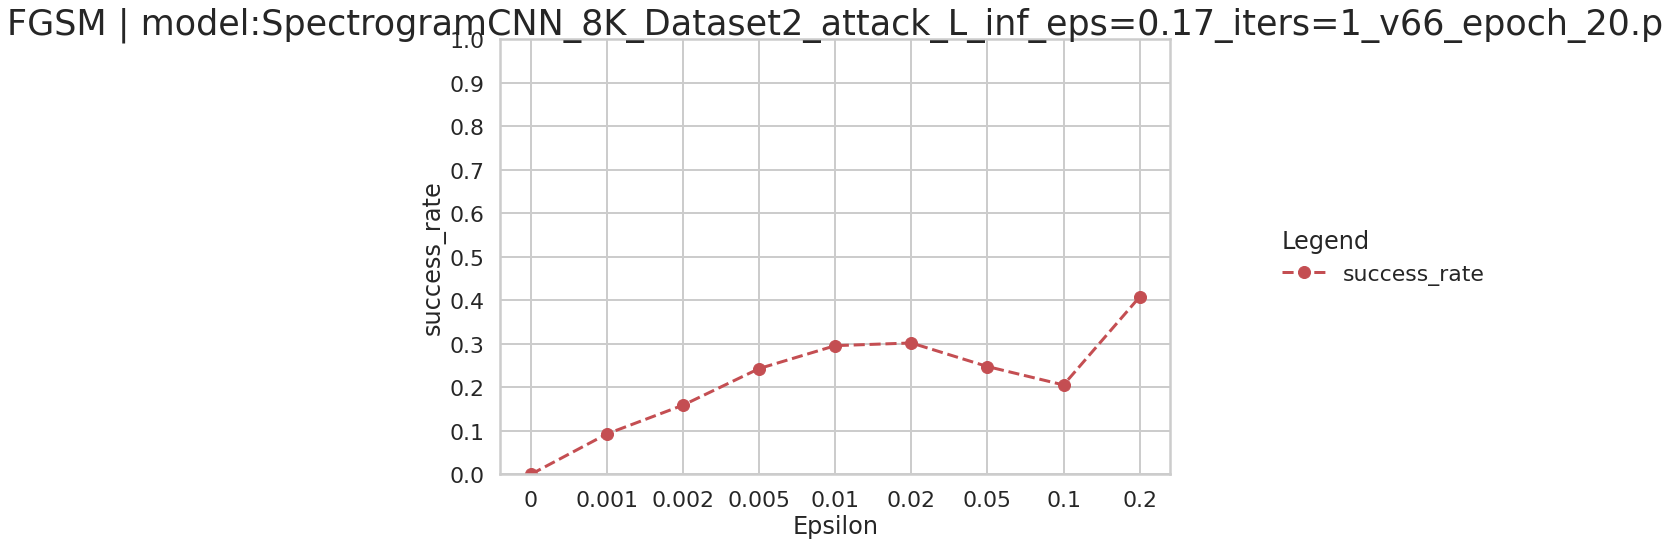

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:54<00:00,  6.10s/it]


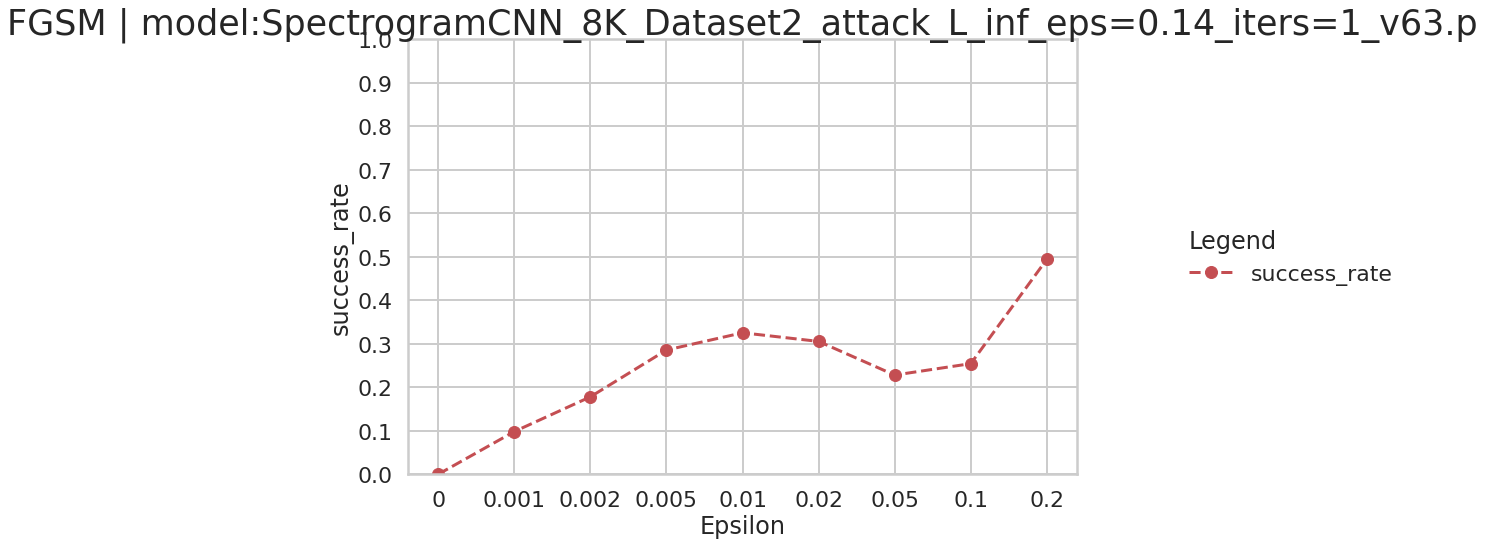

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v74_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v74_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:52<00:00,  5.84s/it]


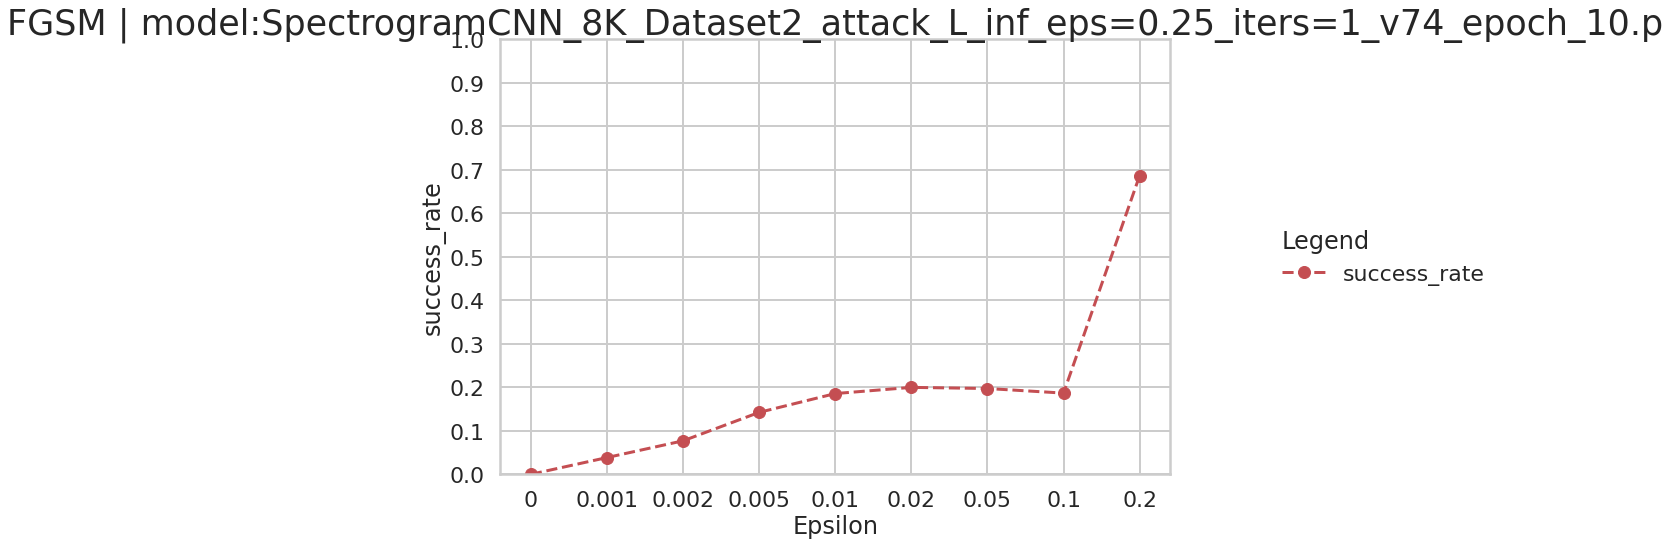

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:54<00:00,  6.07s/it]


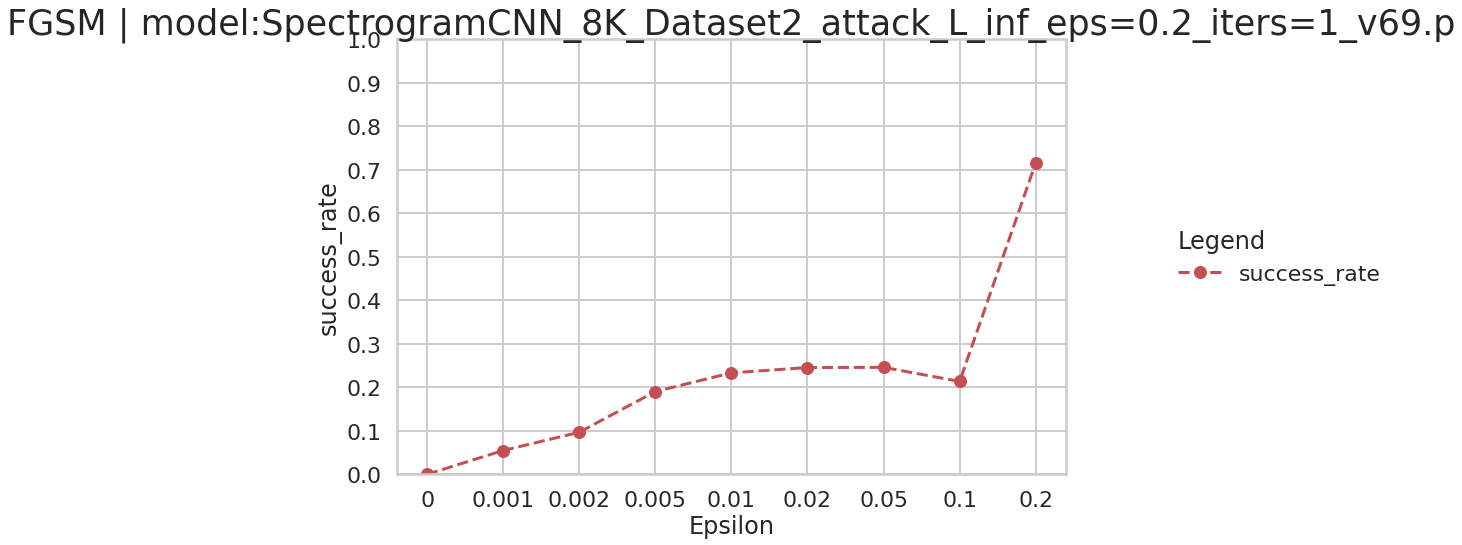

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:52<00:00,  5.78s/it]


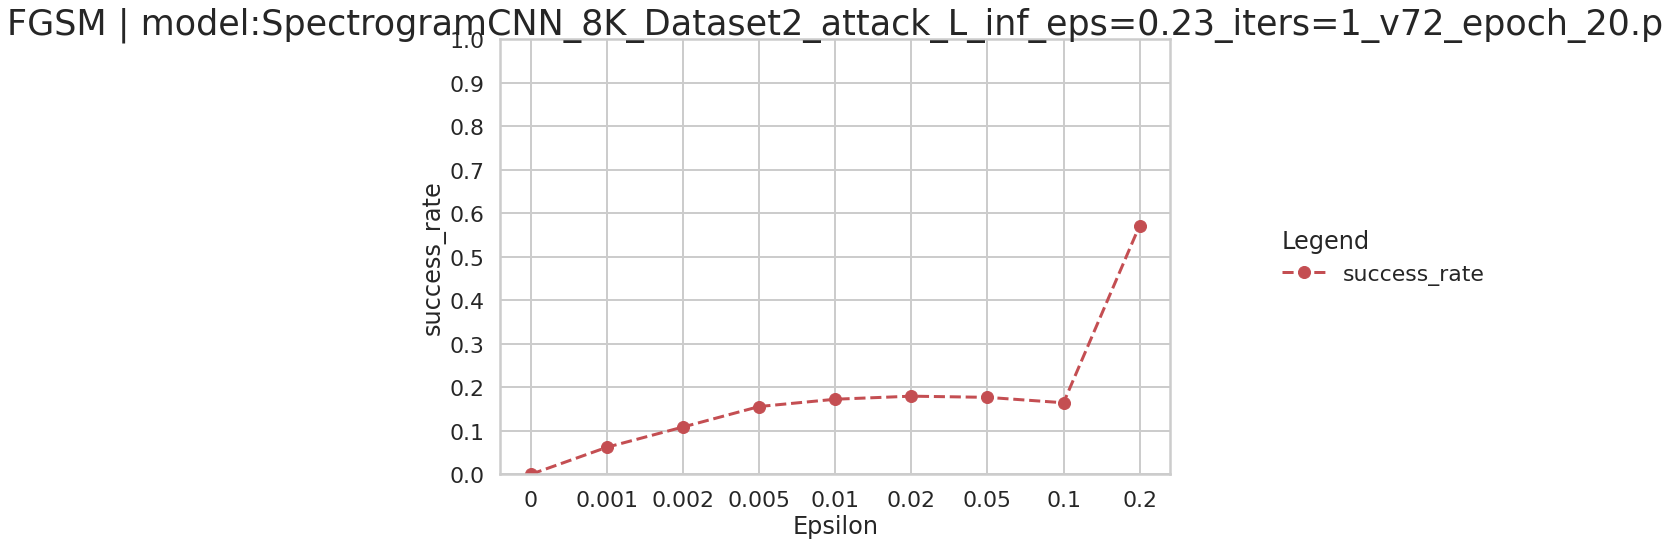

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:49<00:00,  5.55s/it]


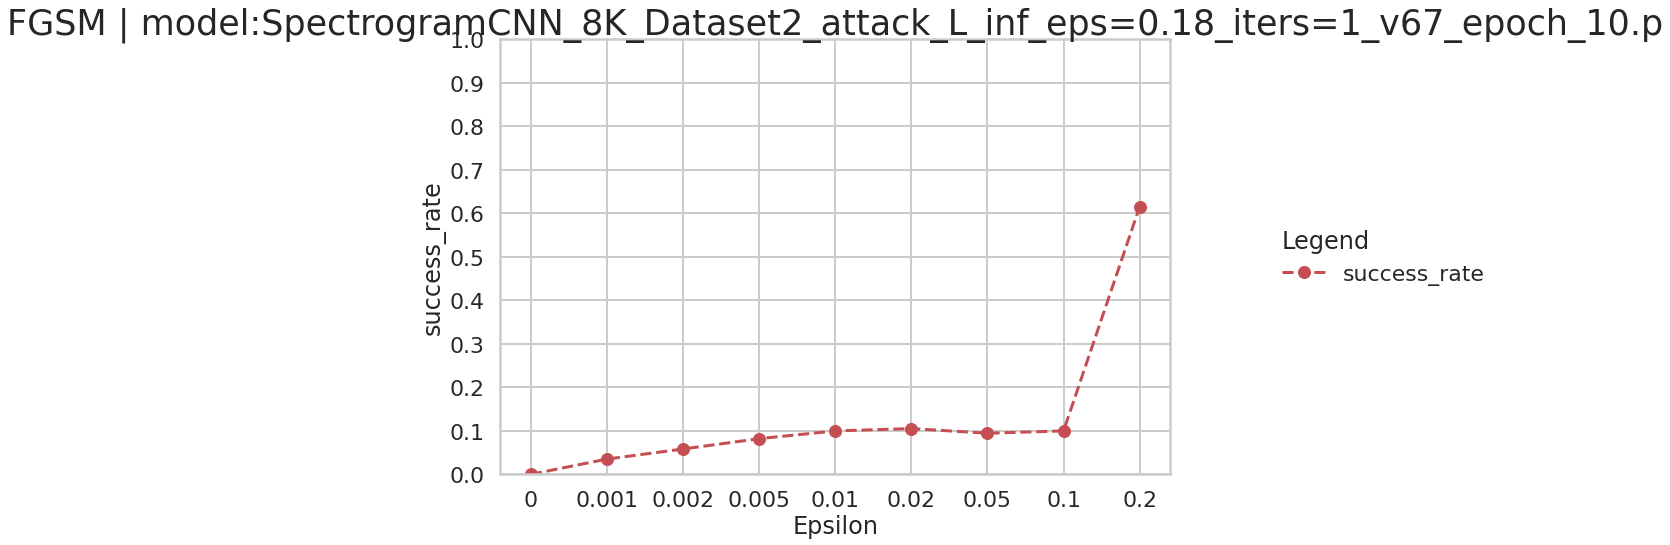

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v55.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v55.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:53<00:00,  5.91s/it]


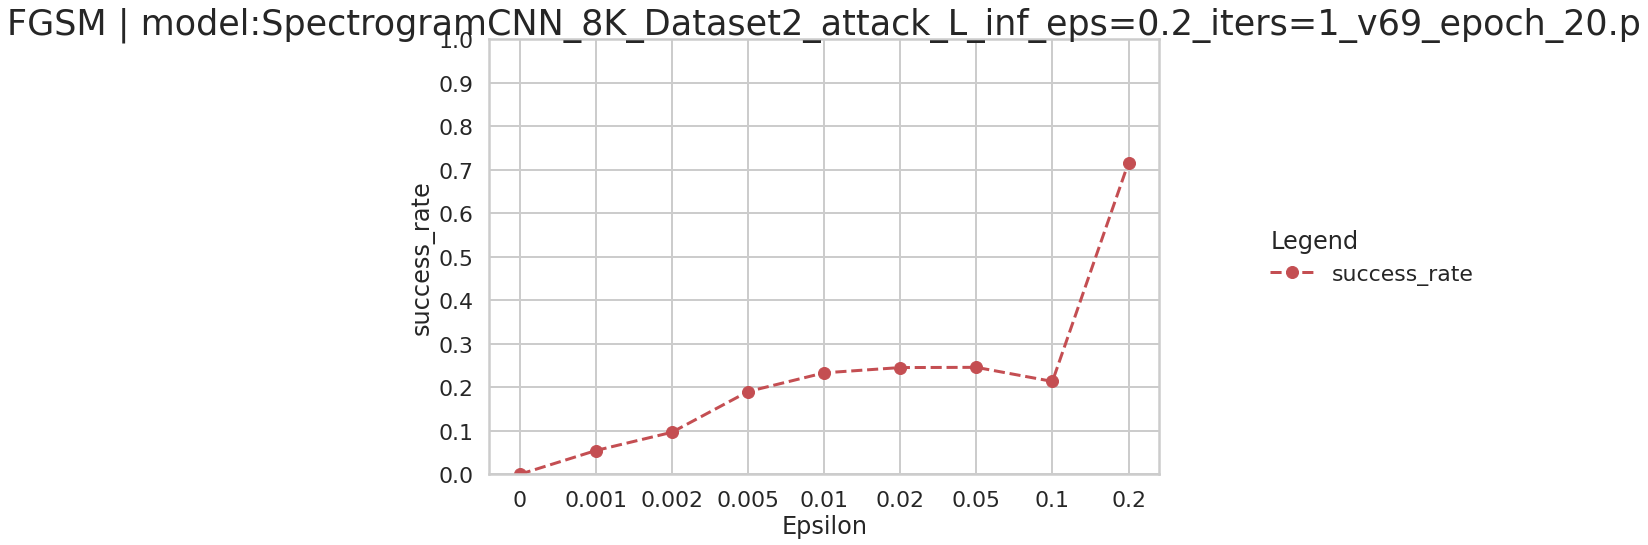

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:04<00:00,  7.14s/it]


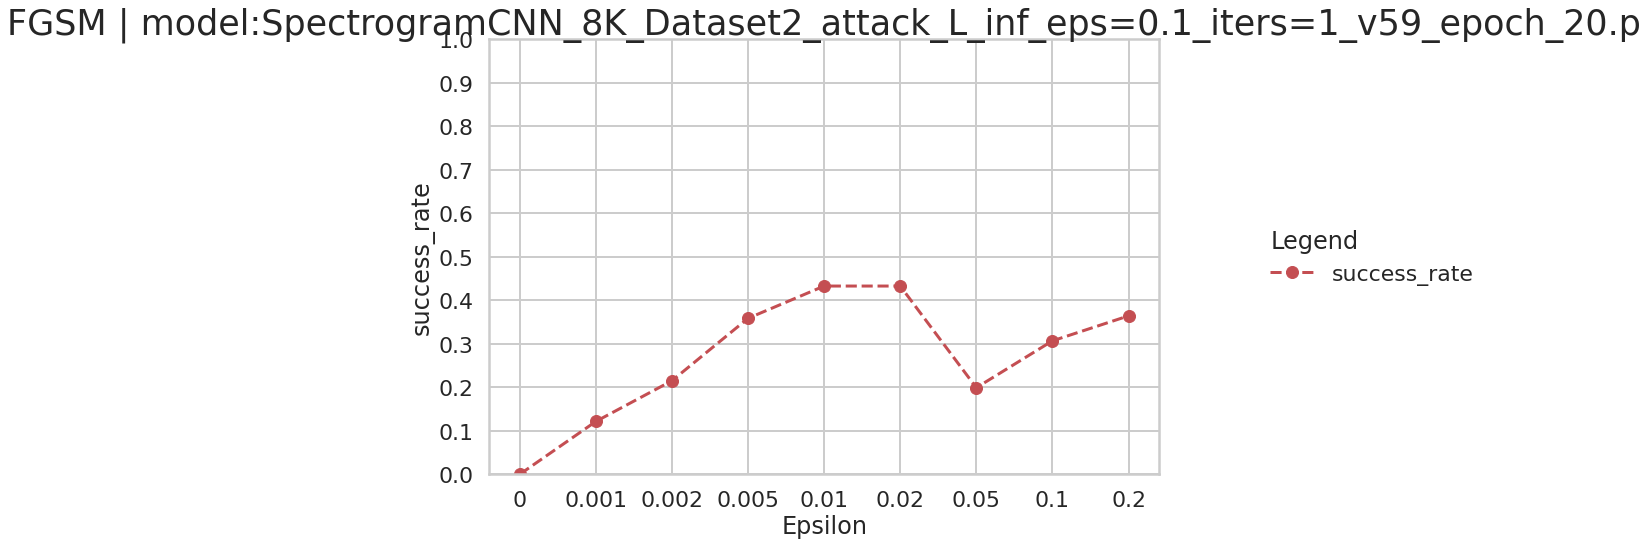

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v78_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v78_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:48<00:00,  5.37s/it]


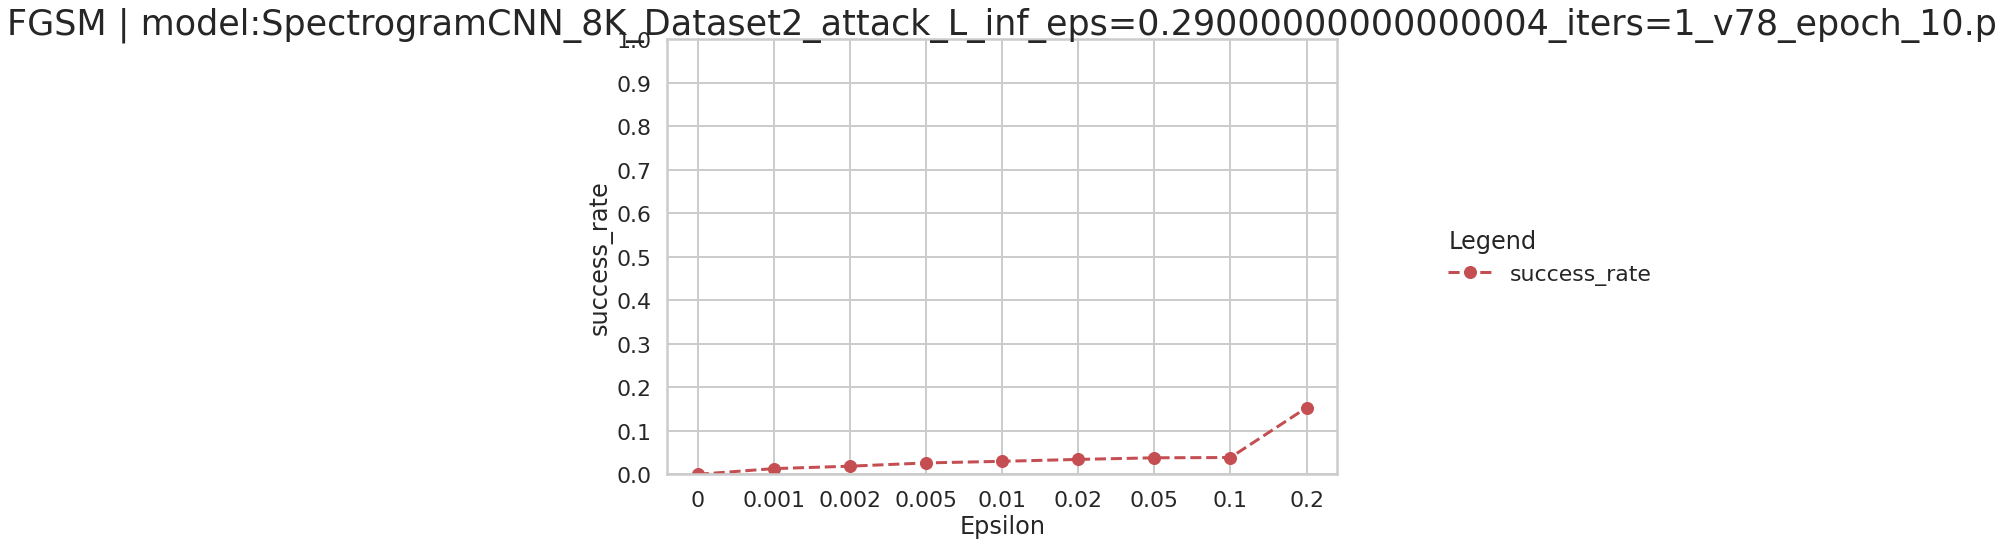

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:57<00:00,  6.44s/it]


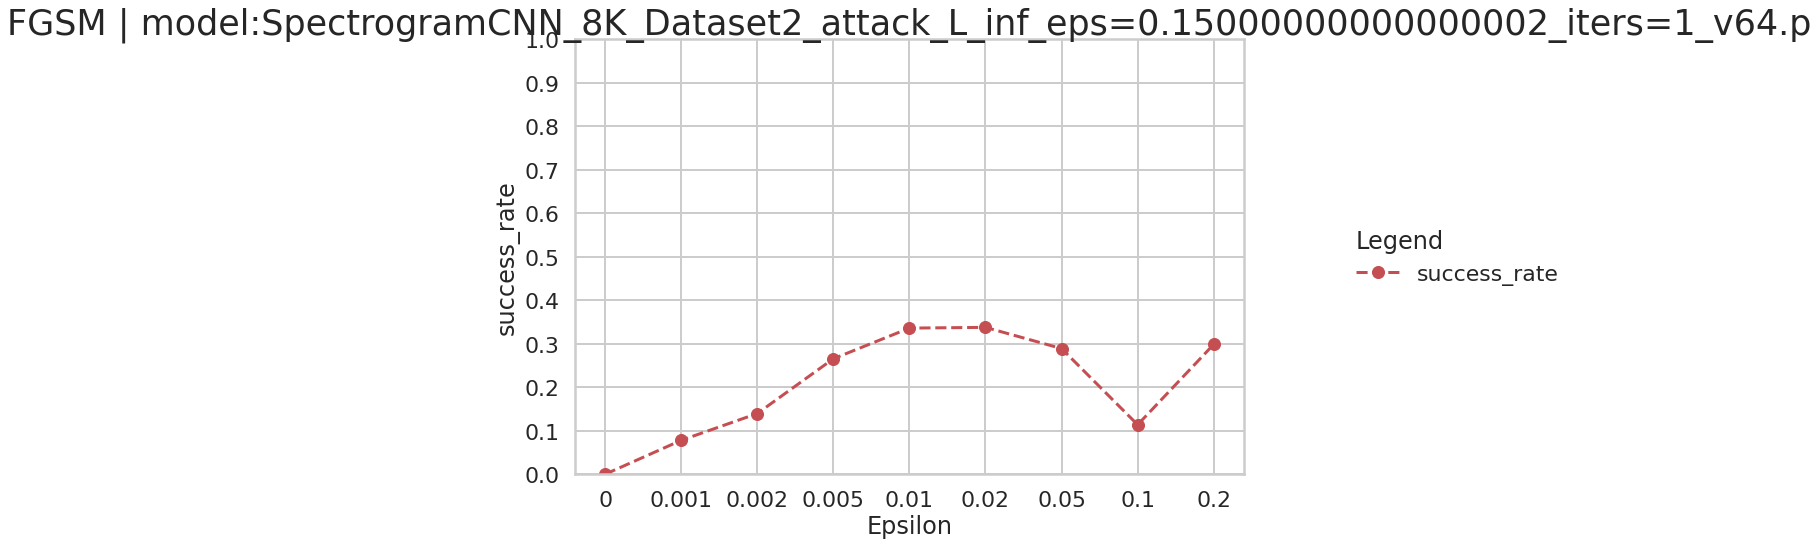

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:06<00:00,  7.37s/it]


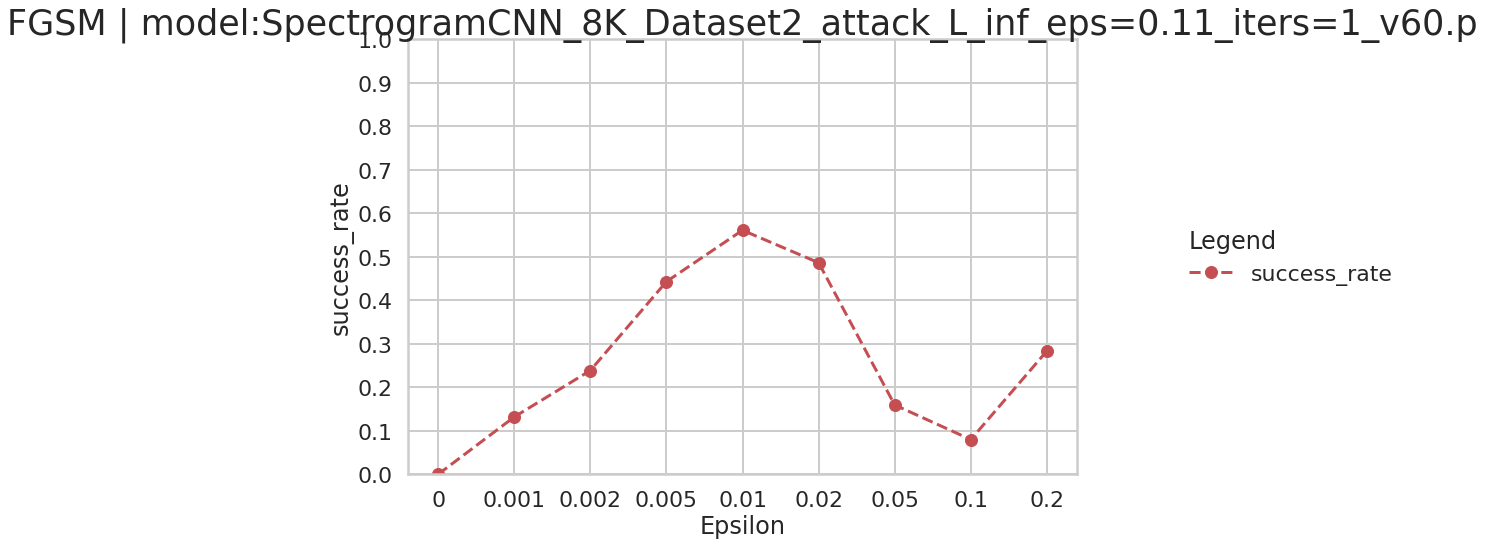

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:56<00:00,  6.23s/it]


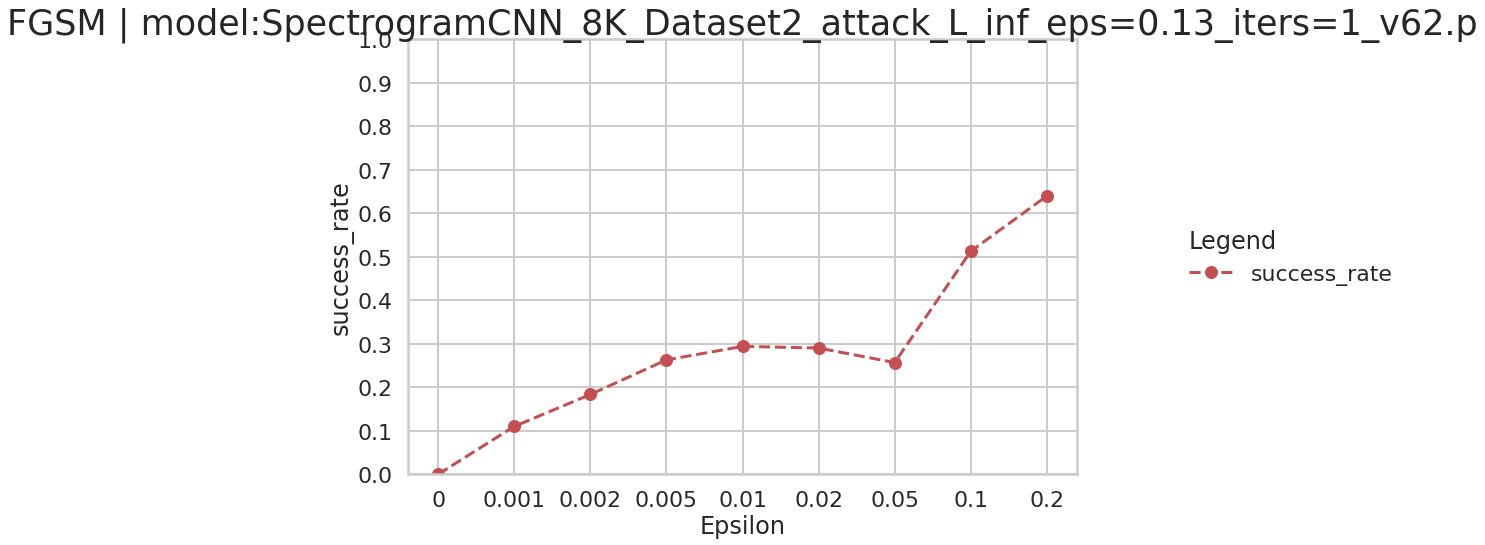

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v50_epoch_20.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v50_epoch_20.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v78.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v78.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:49<00:00,  5.55s/it]


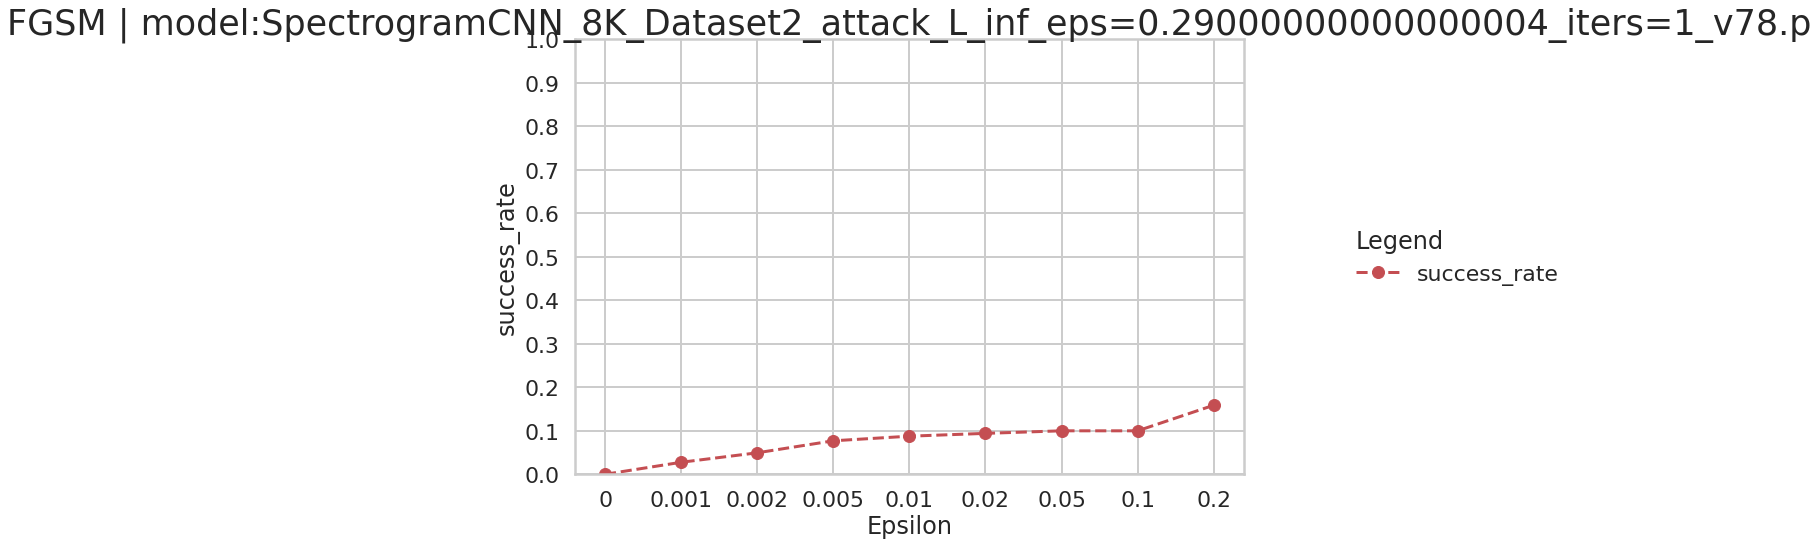

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v52.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v52.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v79_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v79_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:49<00:00,  5.50s/it]


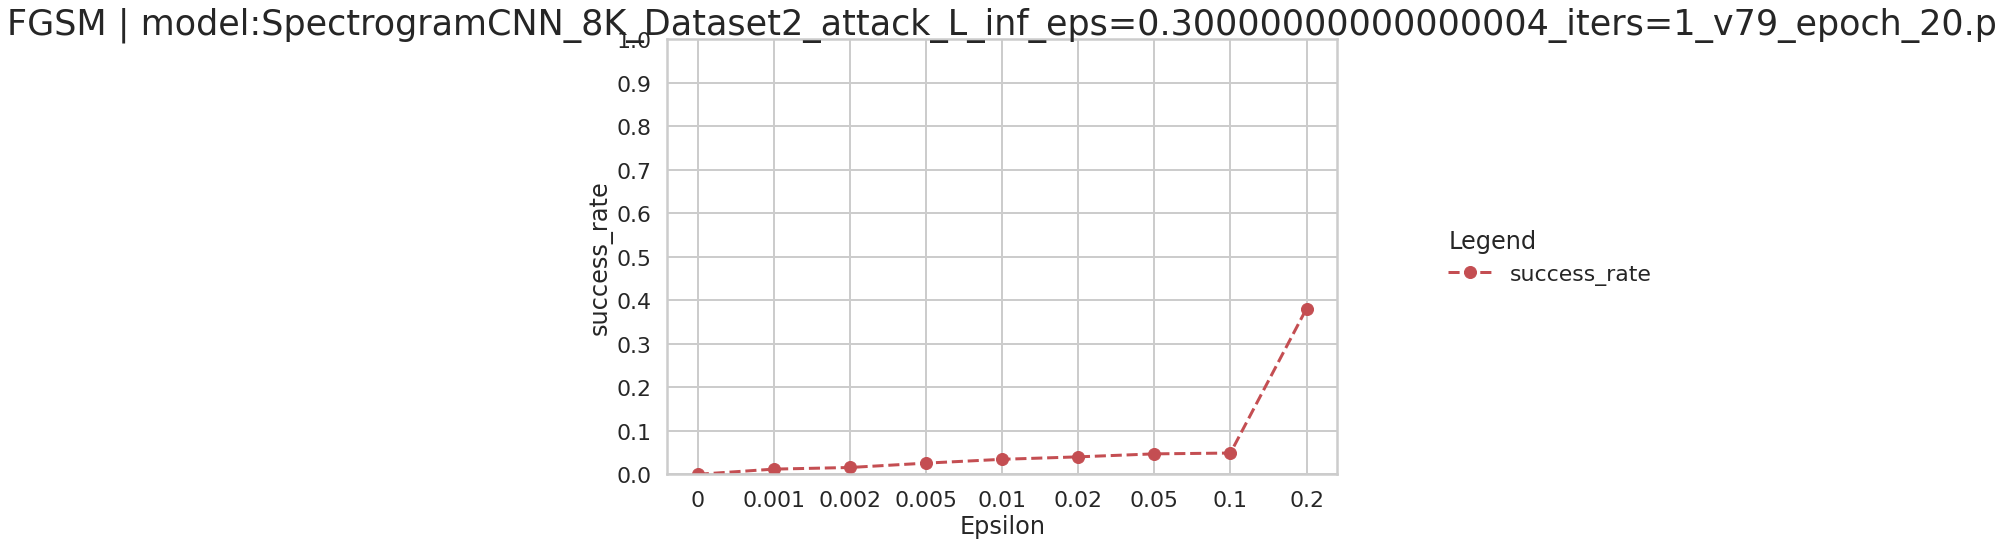

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.26_iters=1_v75_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.26_iters=1_v75_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:48<00:00,  5.38s/it]


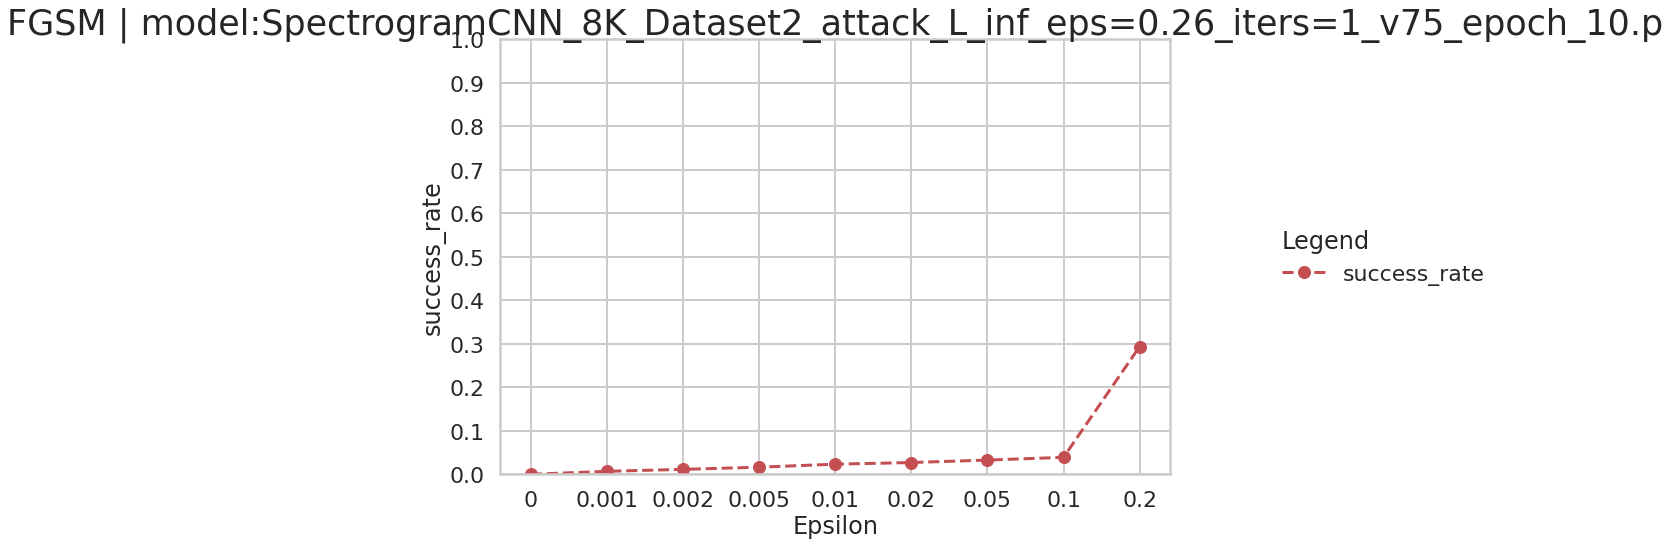

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v69_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:52<00:00,  5.83s/it]


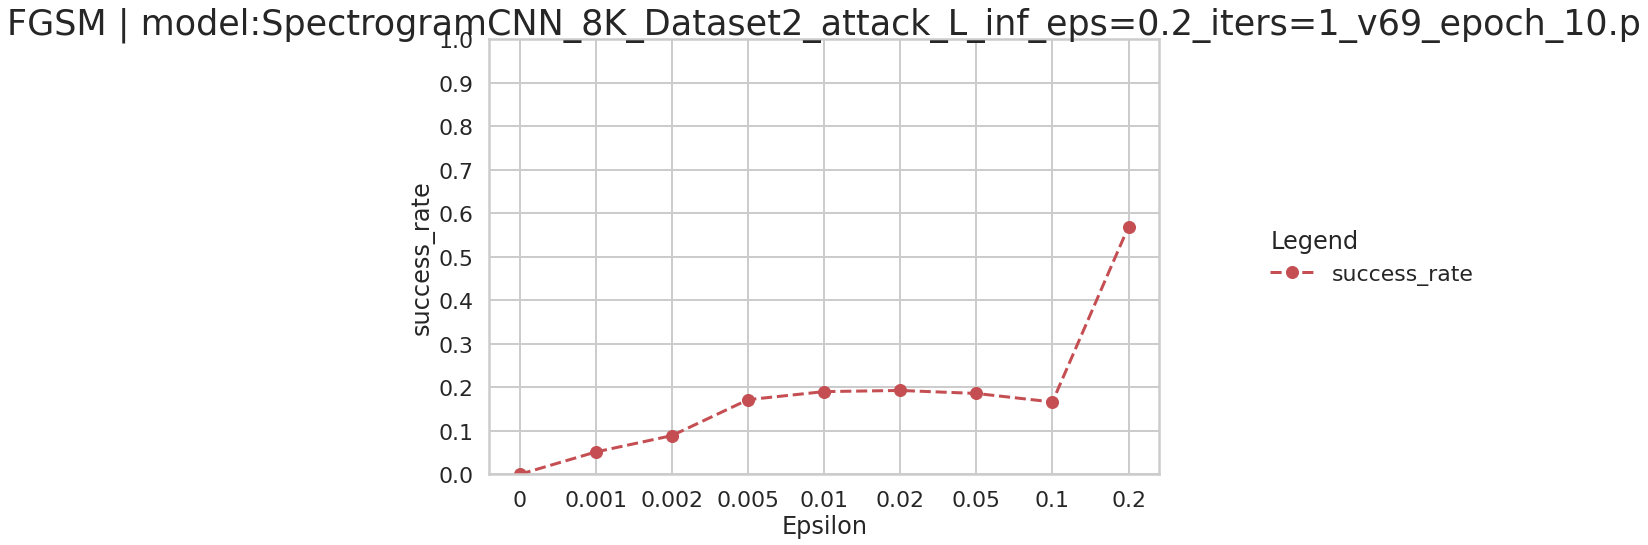

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v76_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v76_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:53<00:00,  5.90s/it]


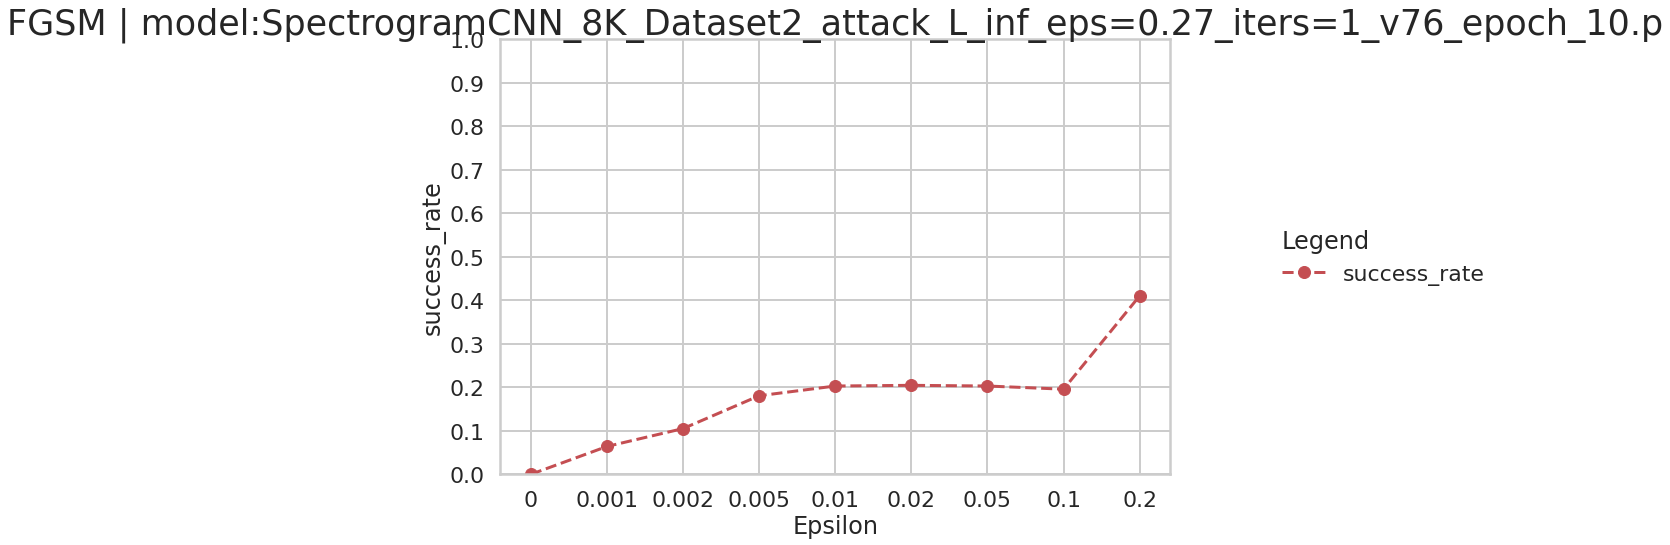

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v73.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v73.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:50<00:00,  5.59s/it]


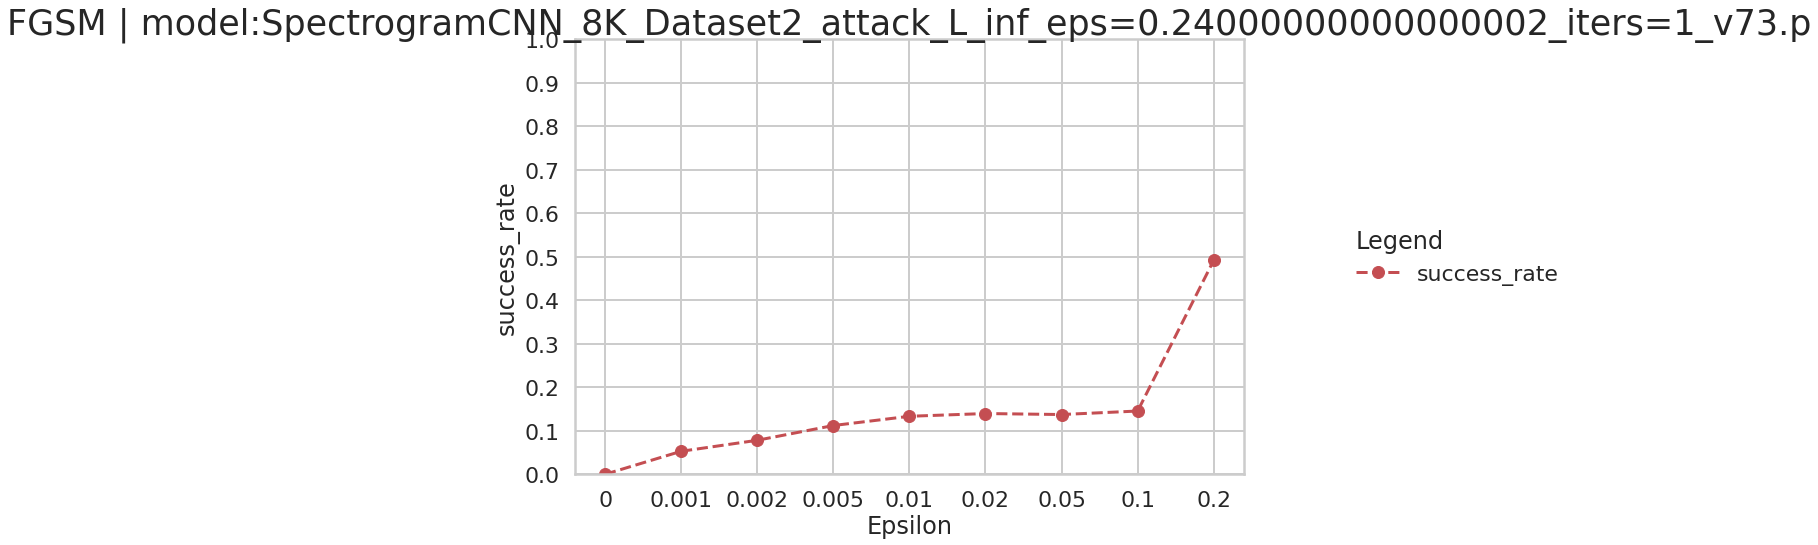

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v52_epoch_10.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v52_epoch_10.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v78_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v78_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:50<00:00,  5.57s/it]


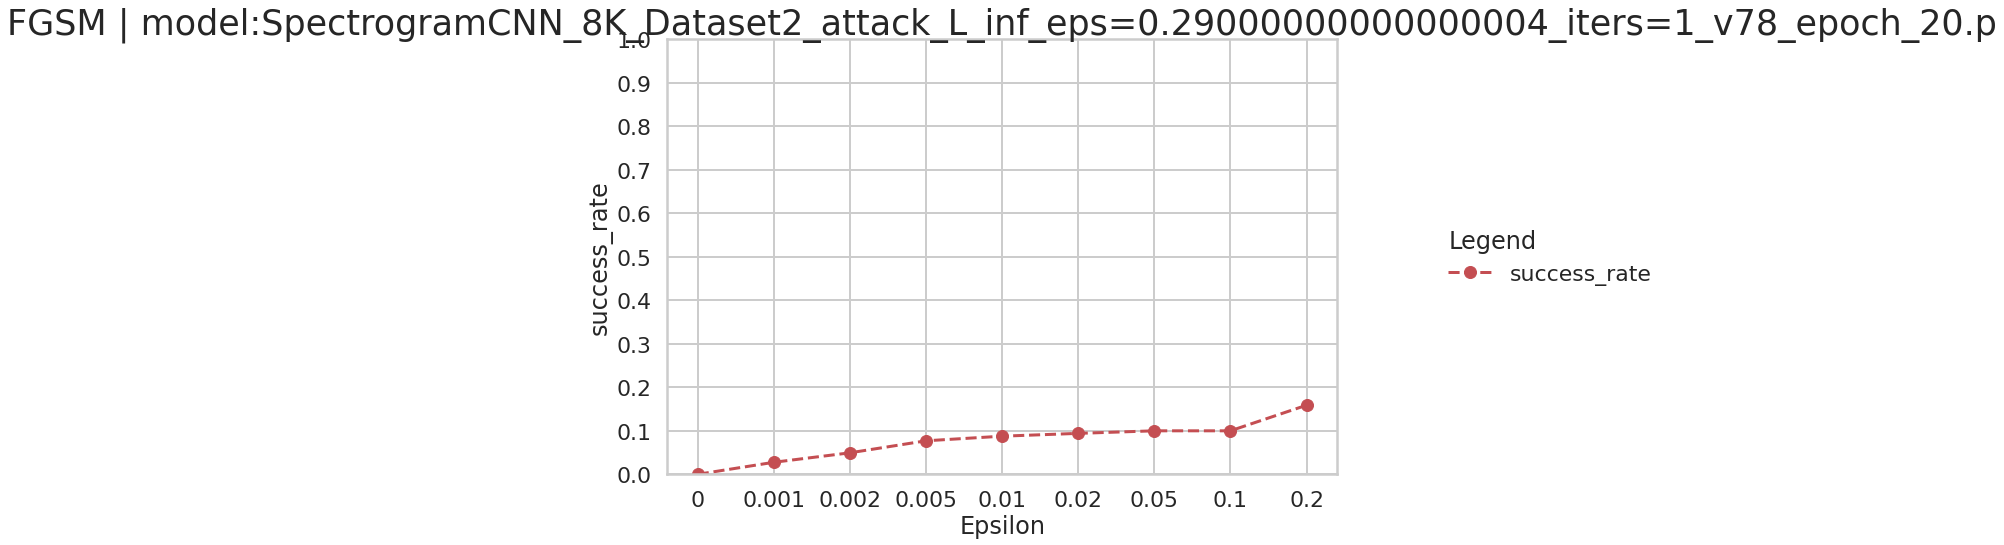

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v67_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:51<00:00,  5.76s/it]


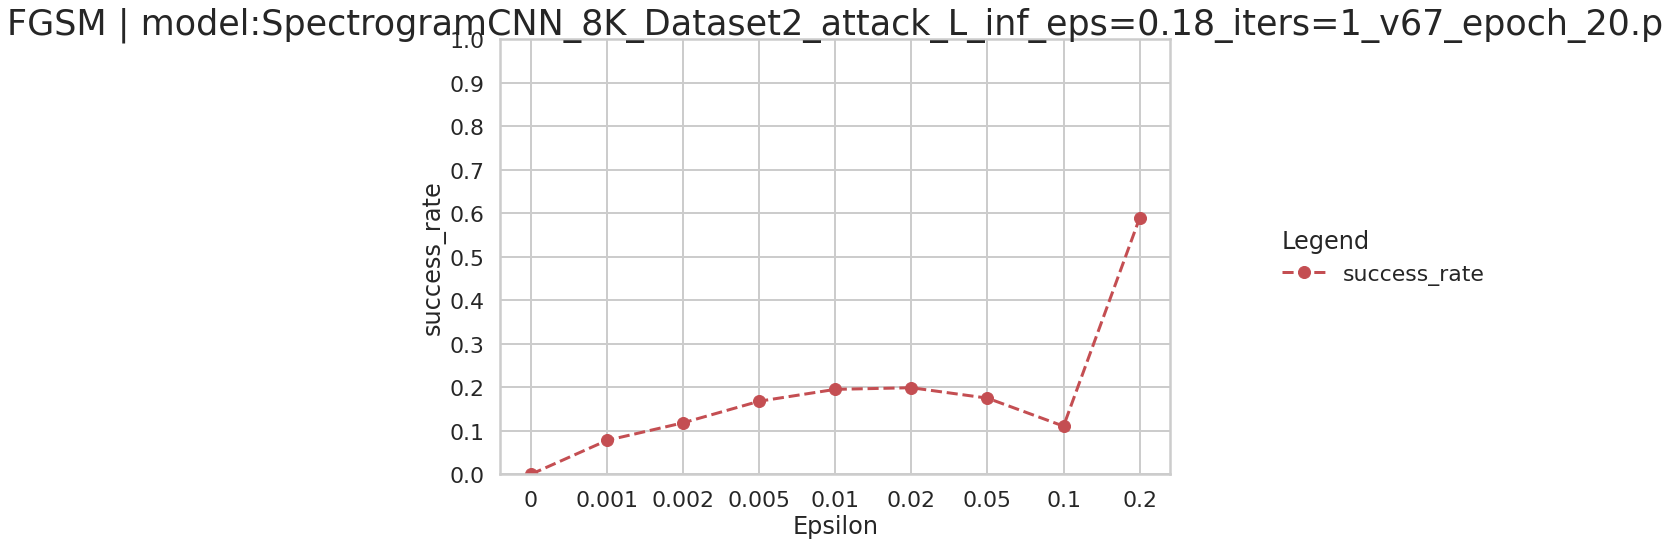

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.31_iters=1_v80_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.31_iters=1_v80_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:49<00:00,  5.51s/it]


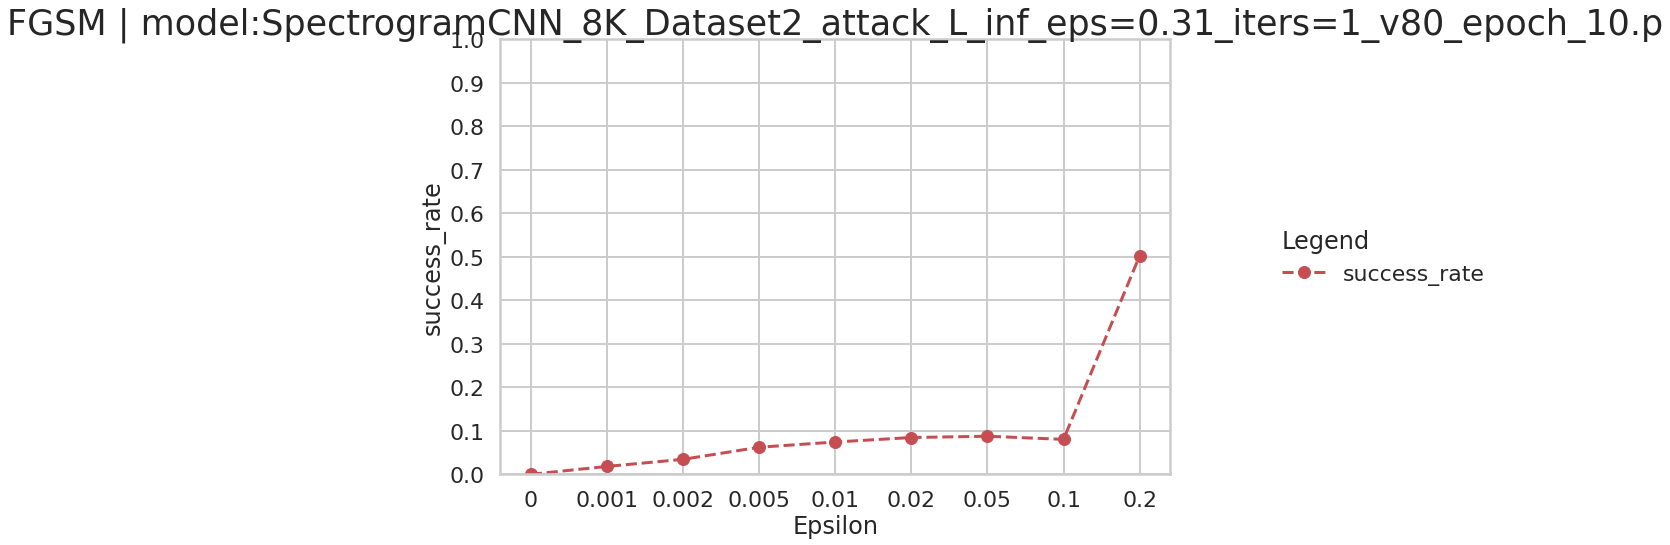

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:52<00:00,  5.81s/it]


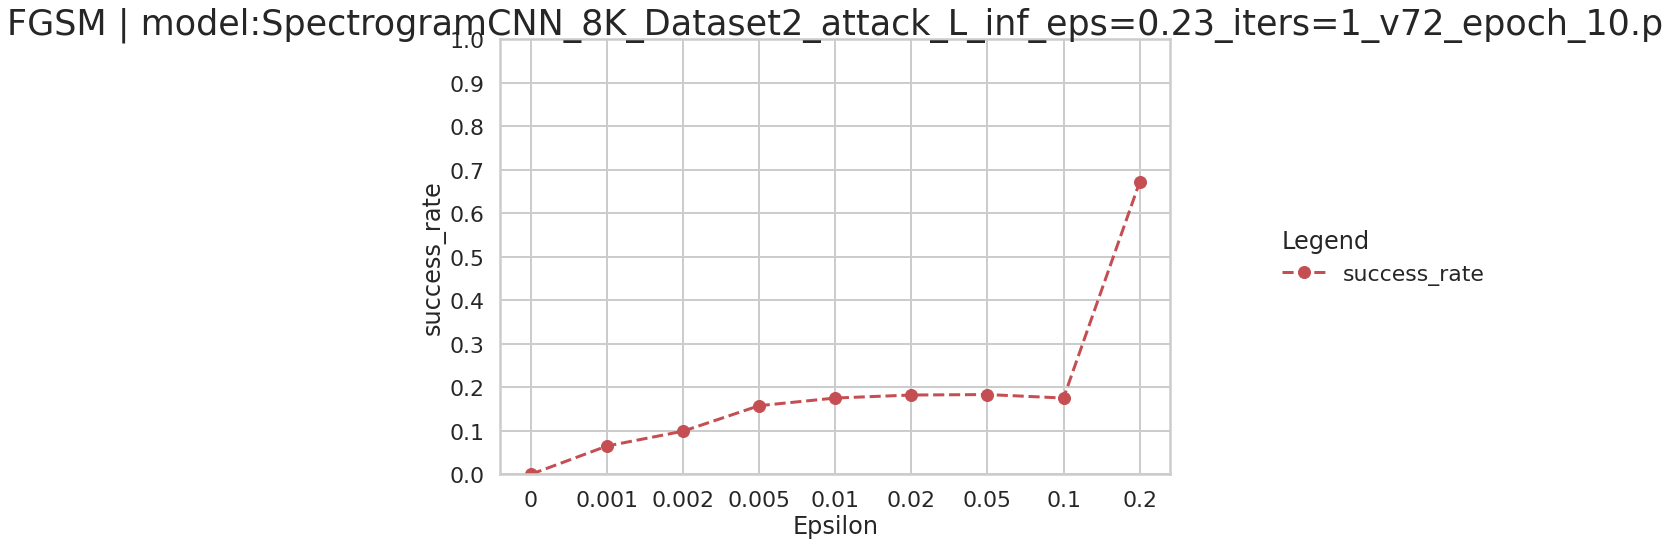

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v51.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v51.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v55_epoch_10.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for mod

  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:50<00:00,  5.57s/it]


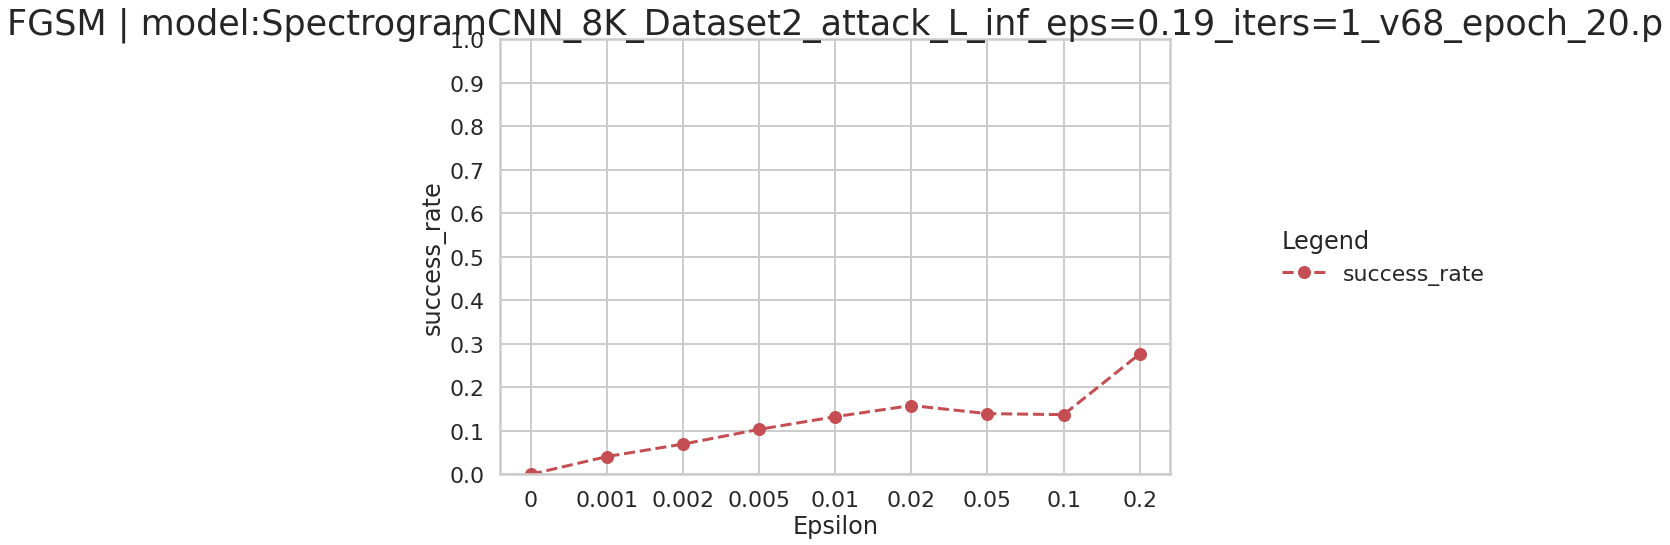

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v74_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v74_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:53<00:00,  5.94s/it]


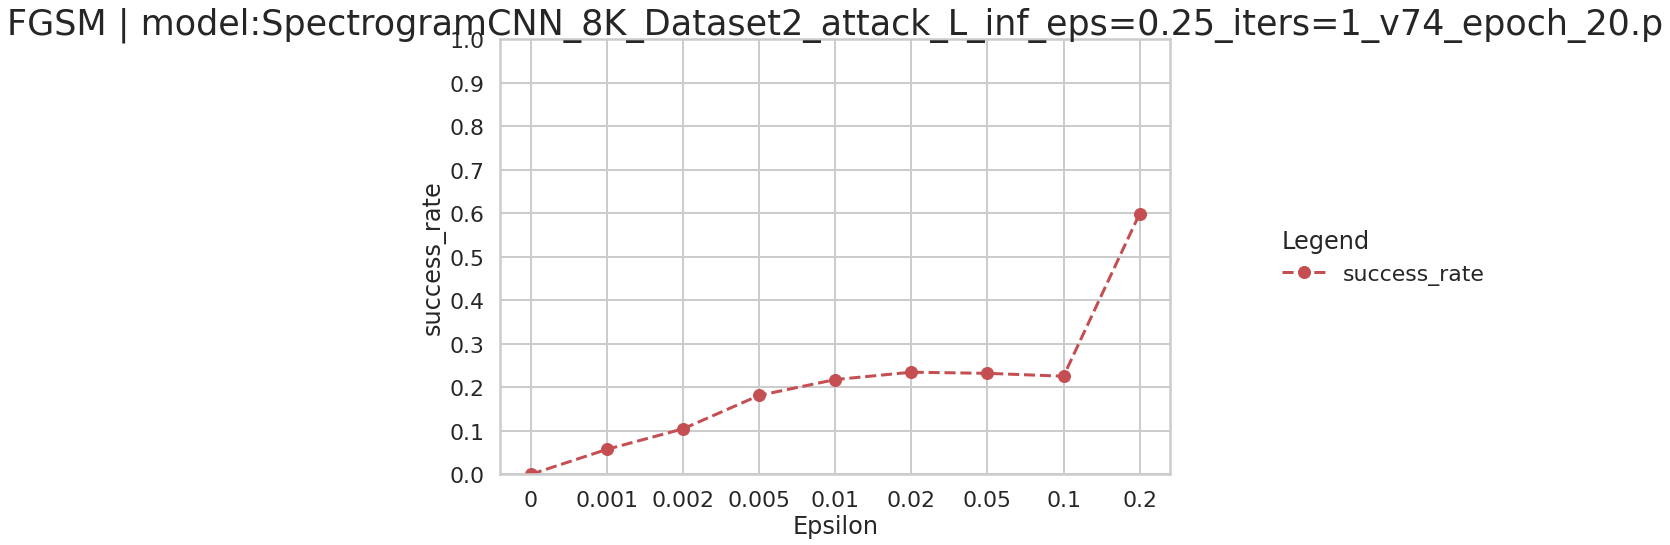

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v71.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:50<00:00,  5.58s/it]


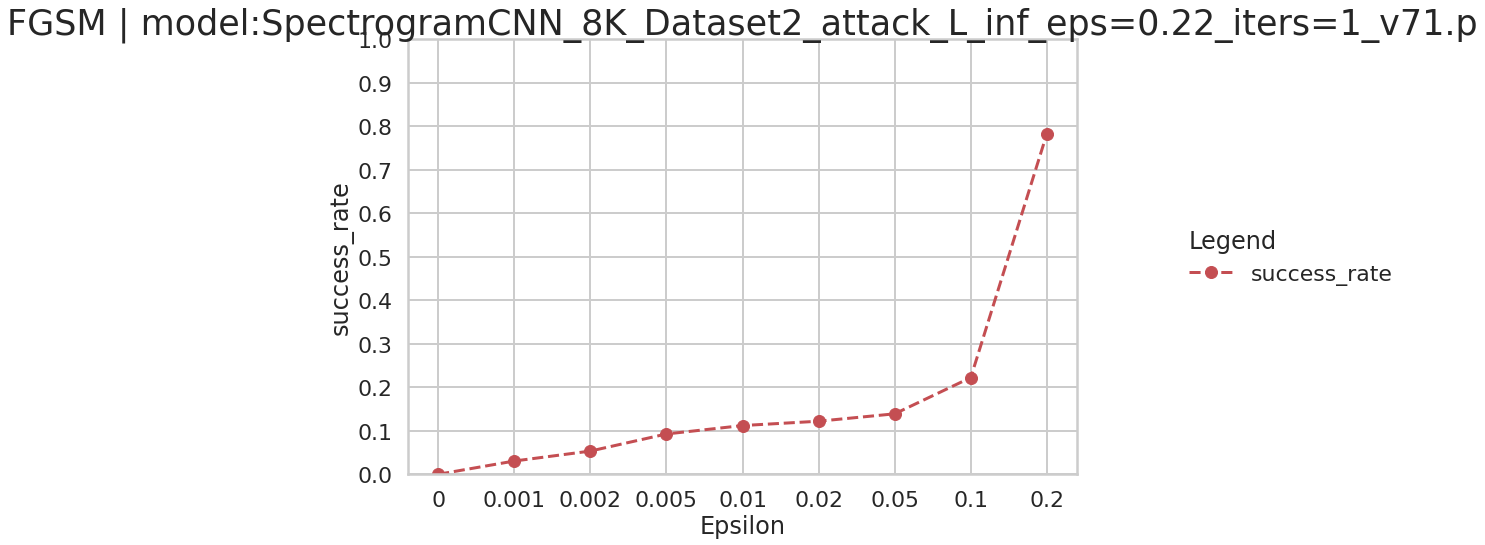

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v60_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:02<00:00,  6.95s/it]


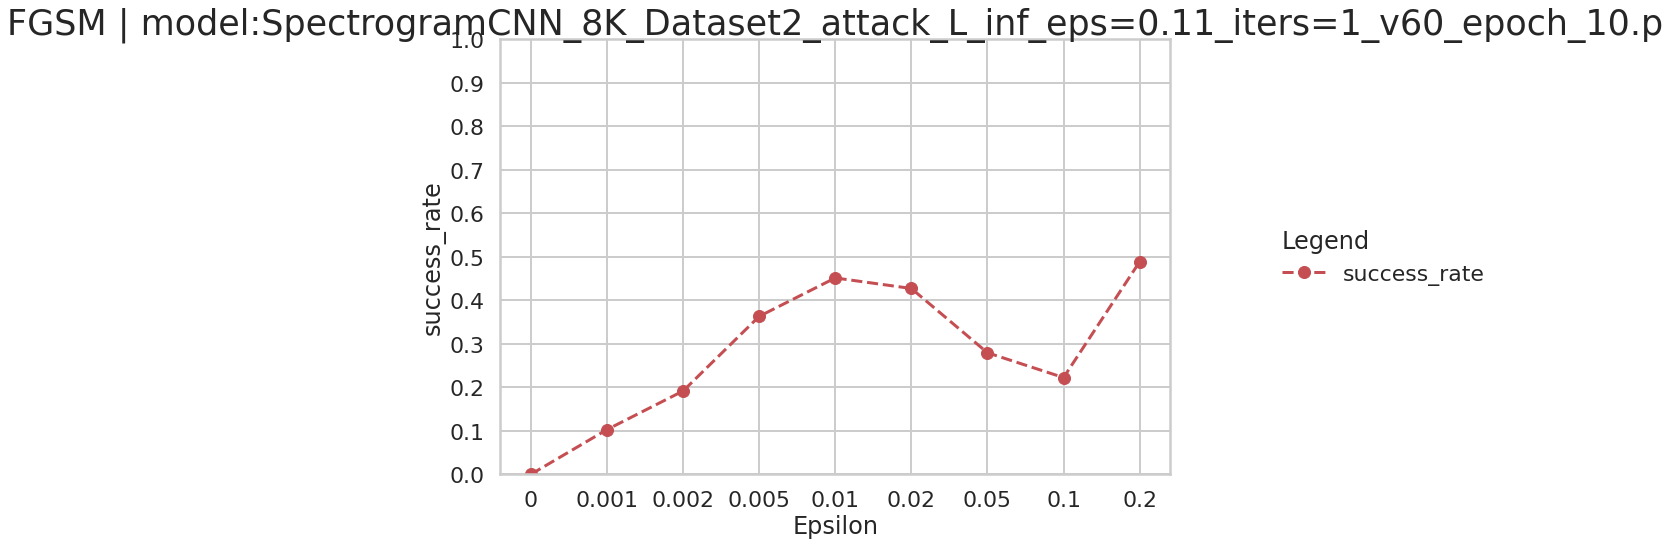

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v79.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v79.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:48<00:00,  5.43s/it]


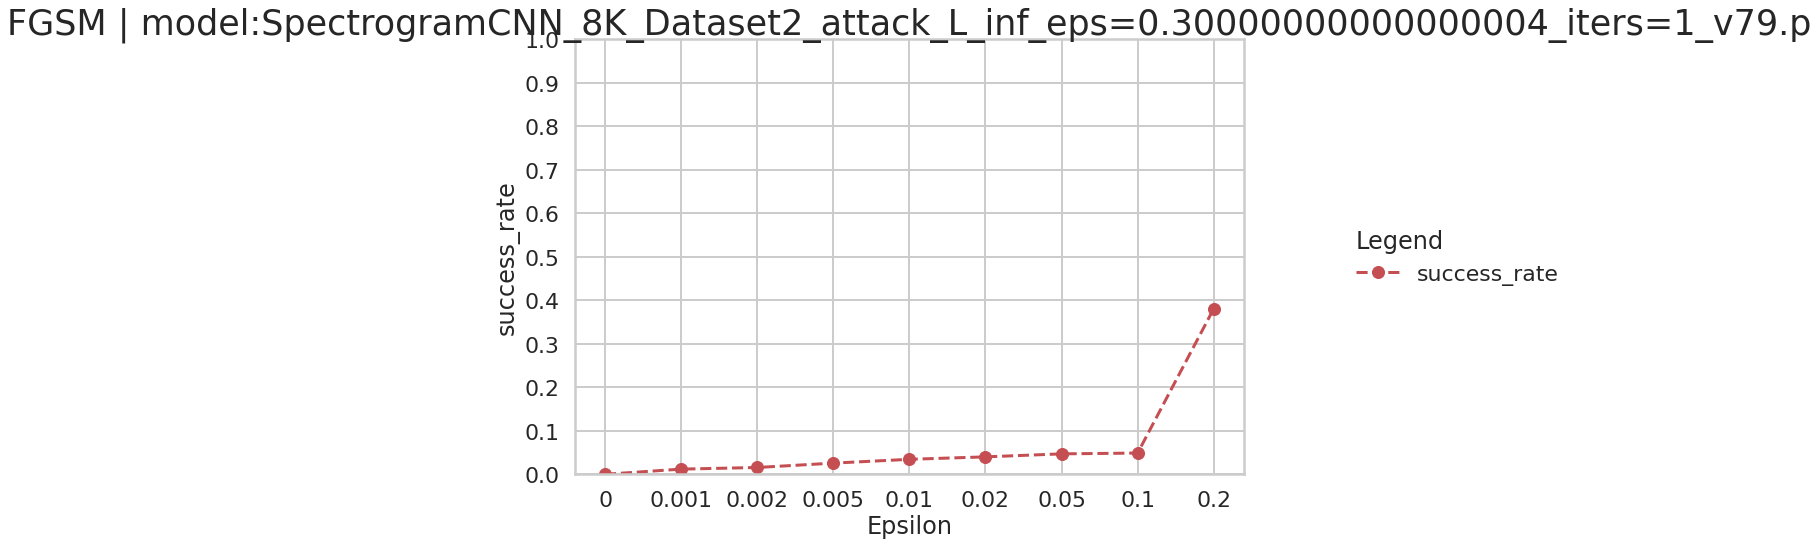

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.26_iters=1_v75_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.26_iters=1_v75_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:49<00:00,  5.48s/it]


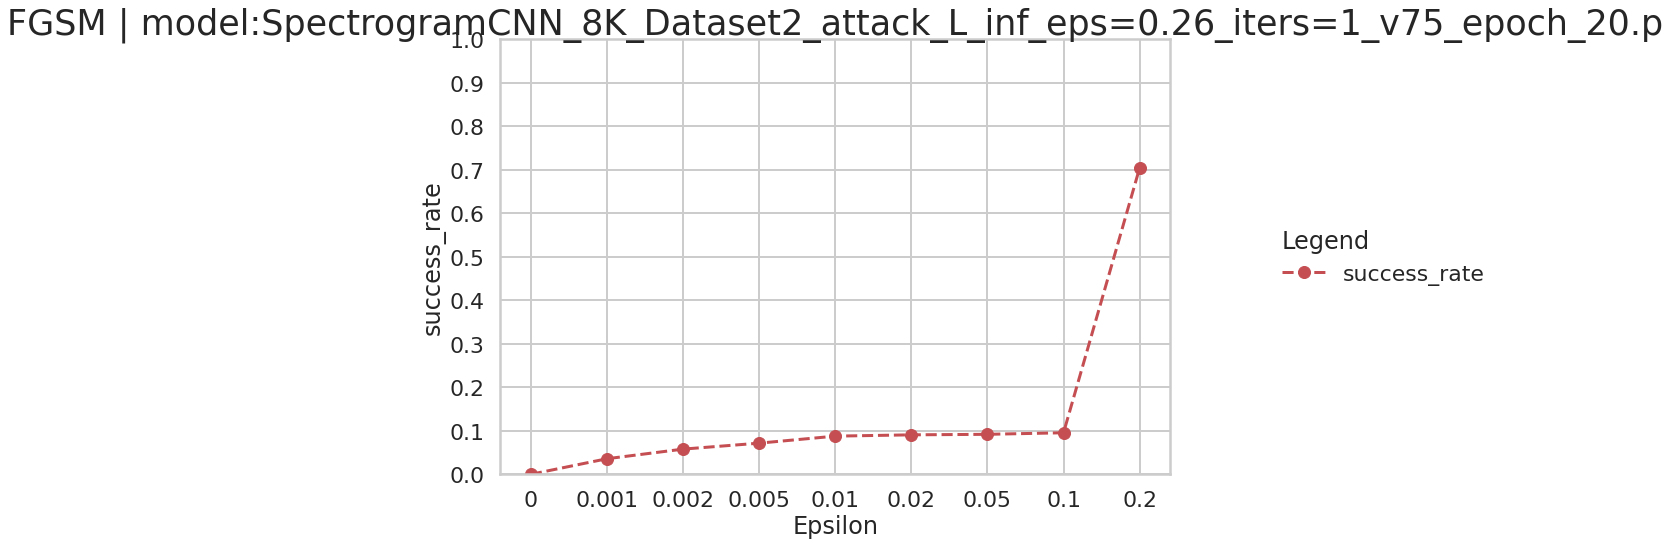

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v76.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v76.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:49<00:00,  5.49s/it]


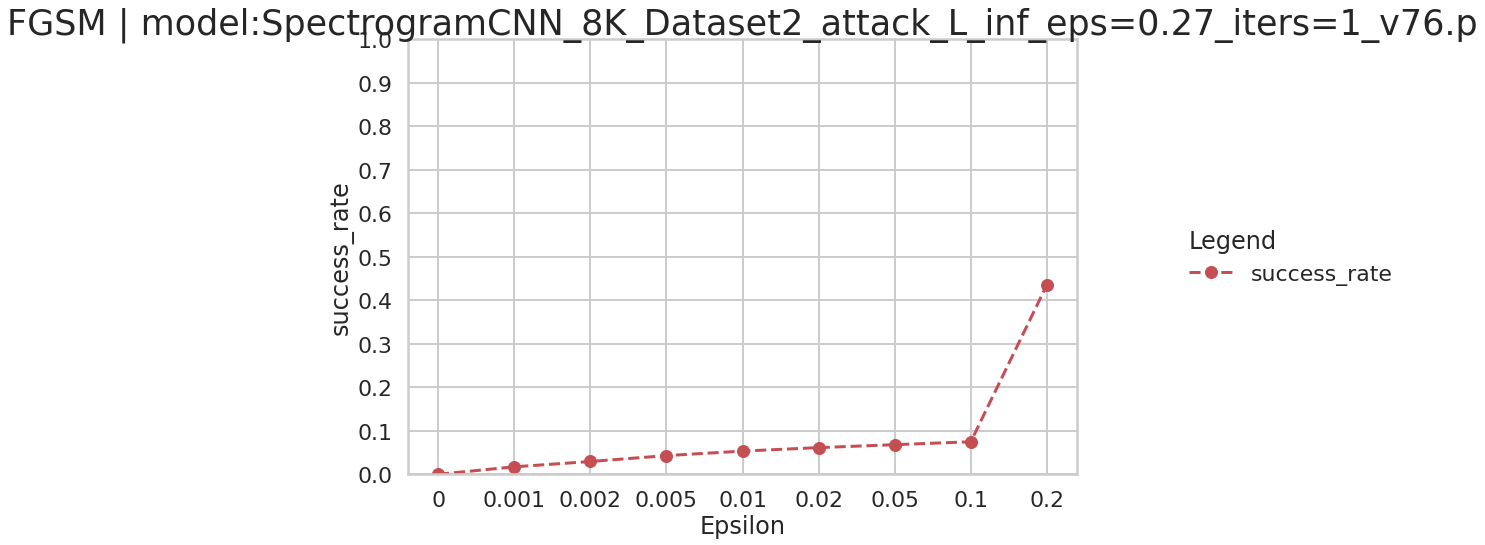

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v77.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v77.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:48<00:00,  5.35s/it]


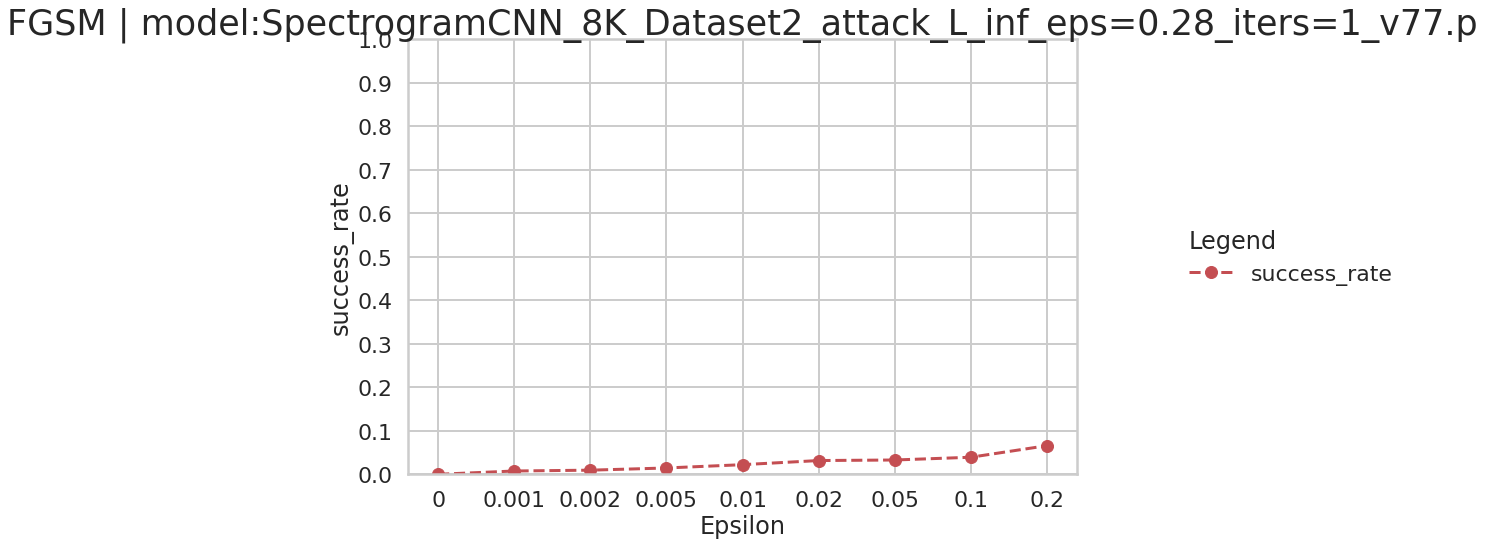

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v51_epoch_10.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v51_epoch_10.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v64_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:58<00:00,  6.46s/it]


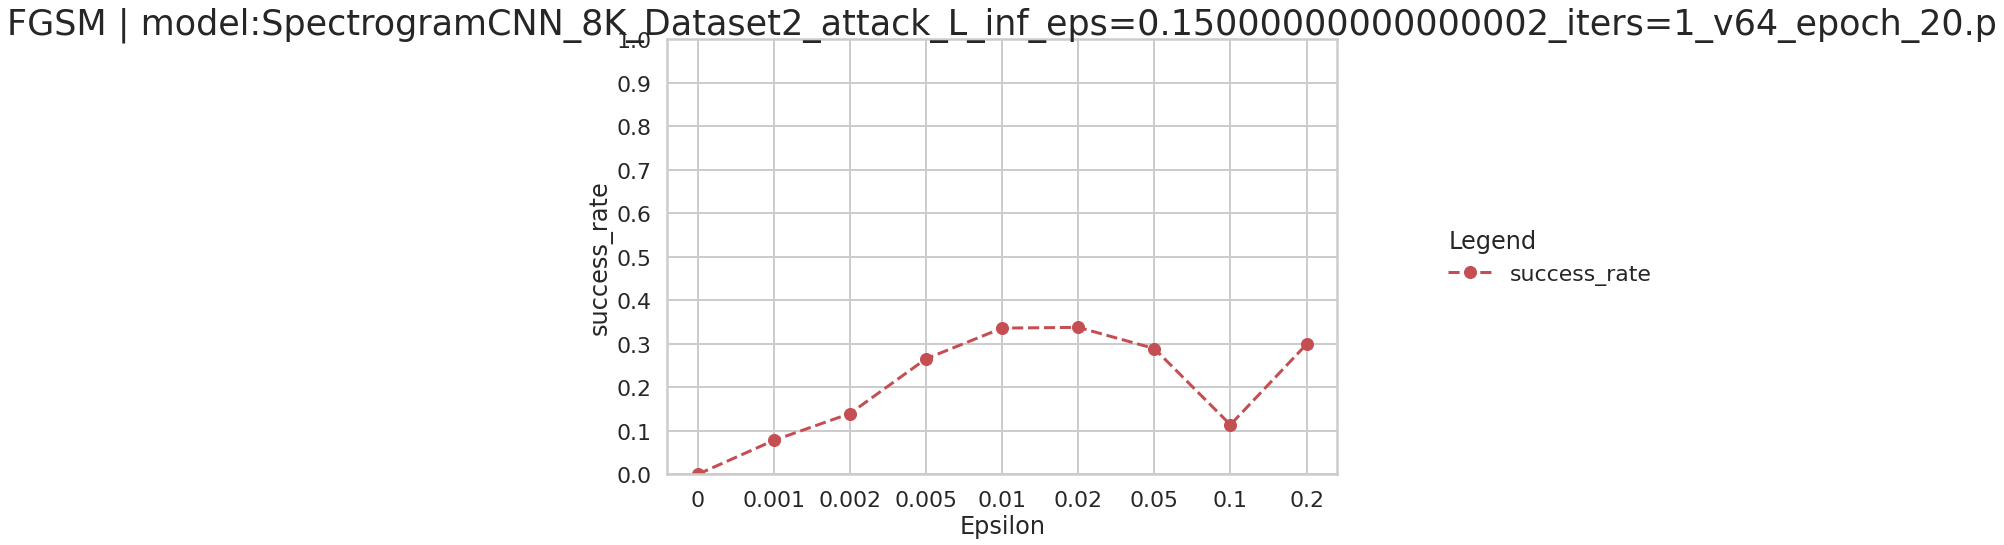

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v72.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:52<00:00,  5.79s/it]


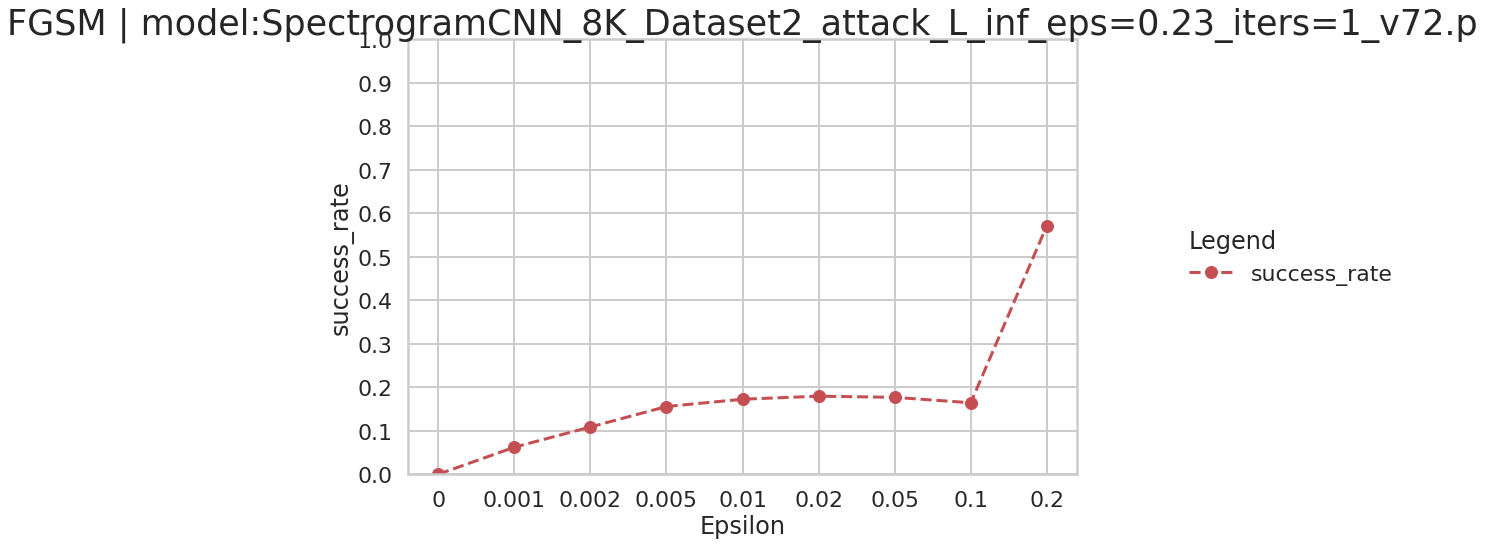

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:49<00:00,  5.55s/it]


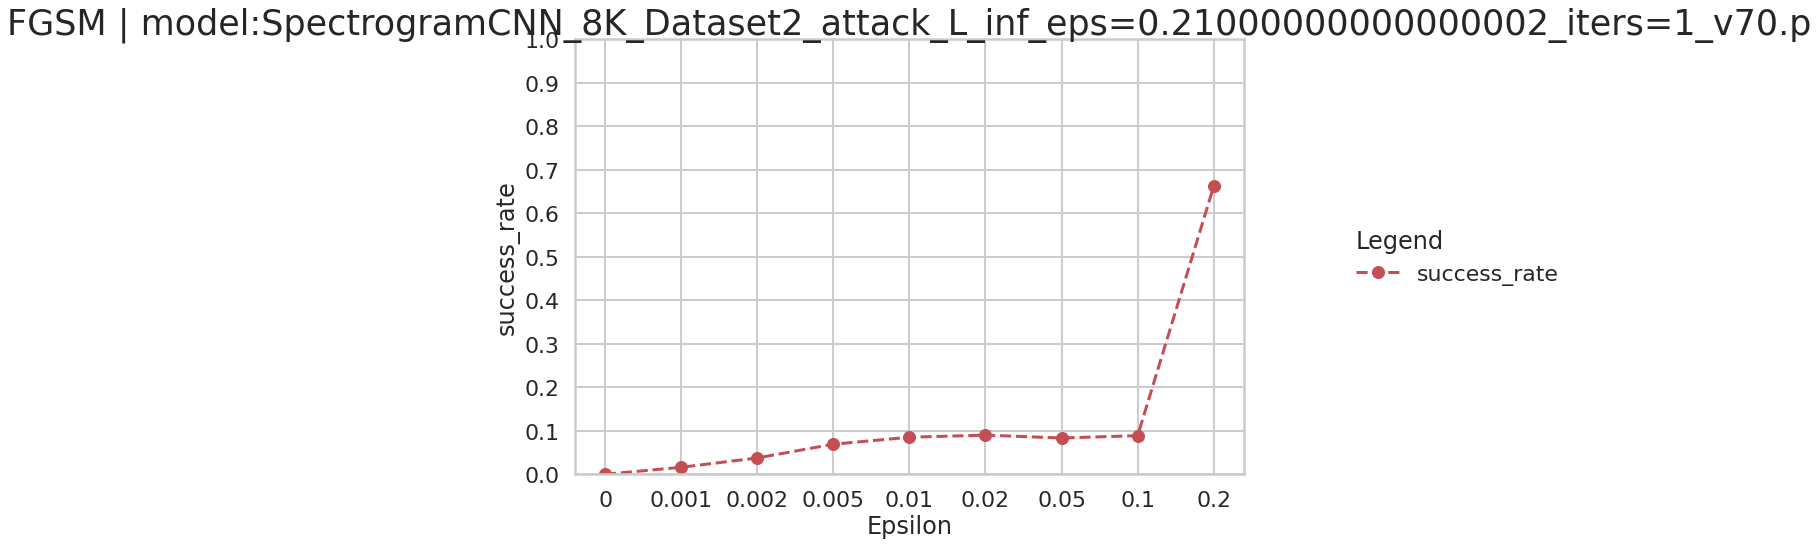

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v57.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v57.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:58<00:00,  6.55s/it]


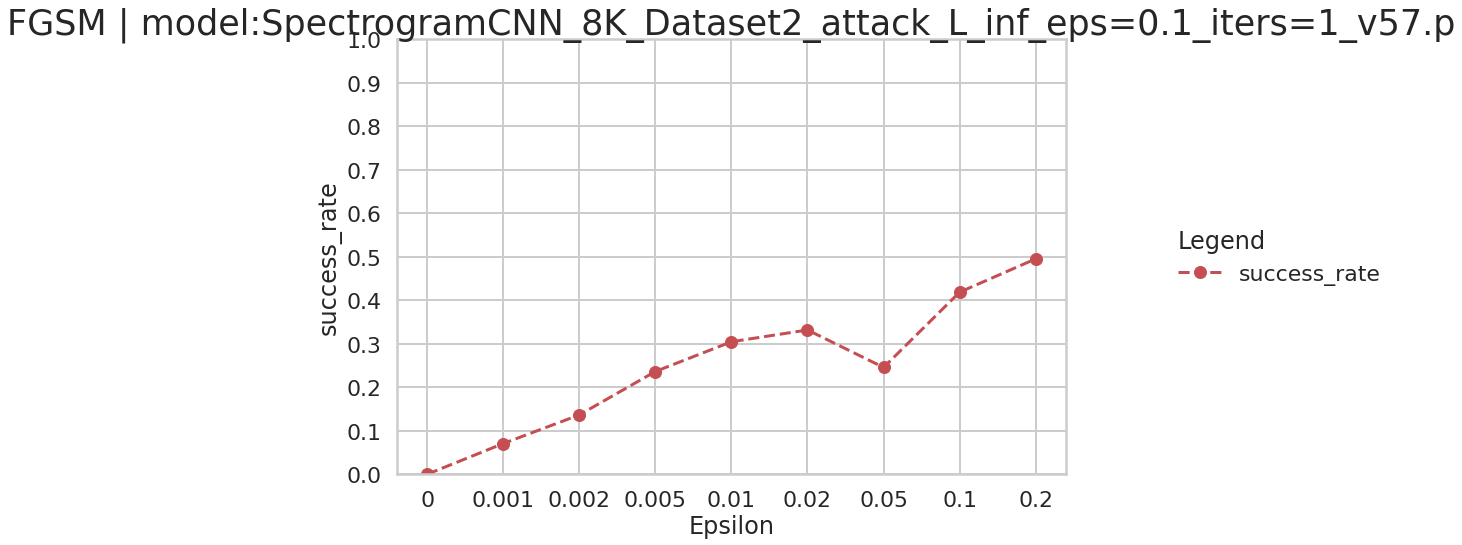

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v79_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v79_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:48<00:00,  5.39s/it]


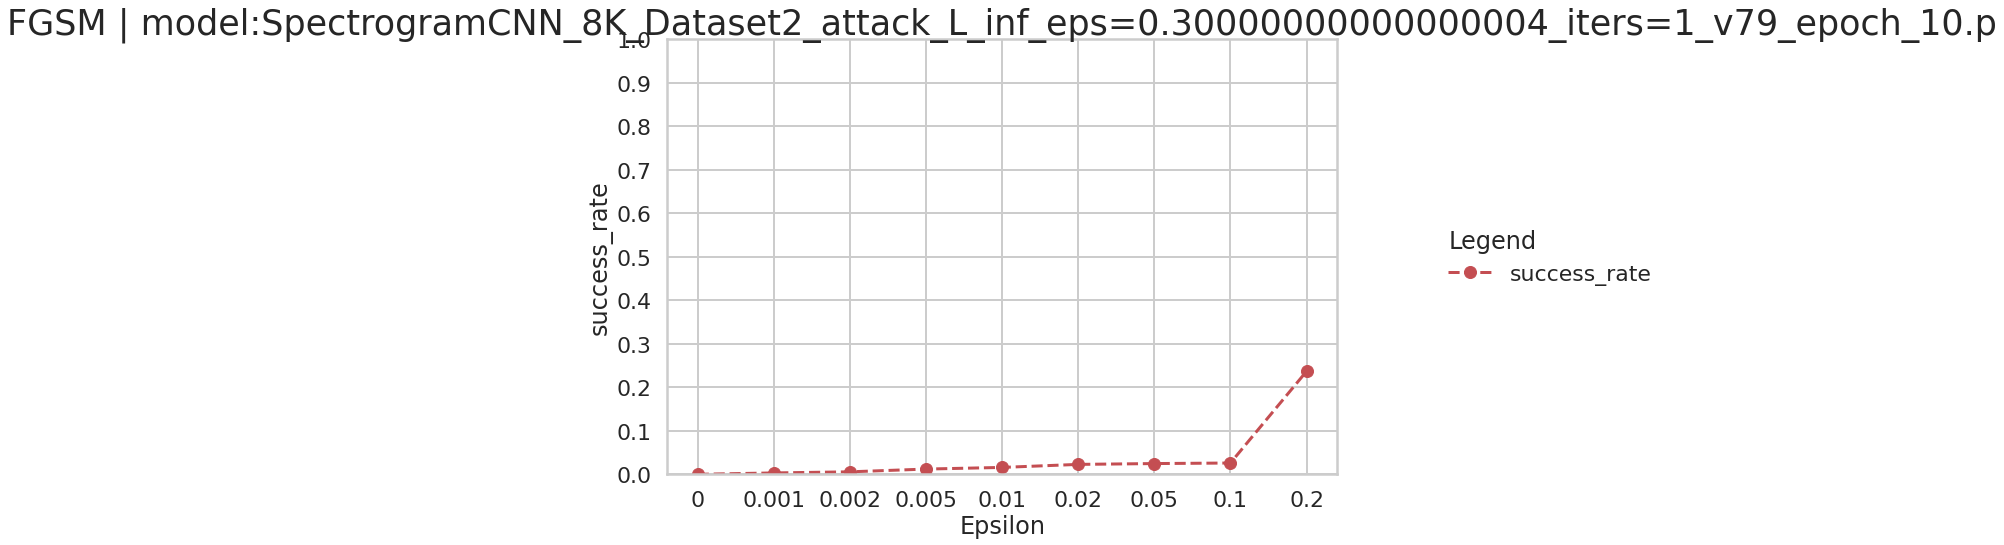

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v62_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:56<00:00,  6.23s/it]


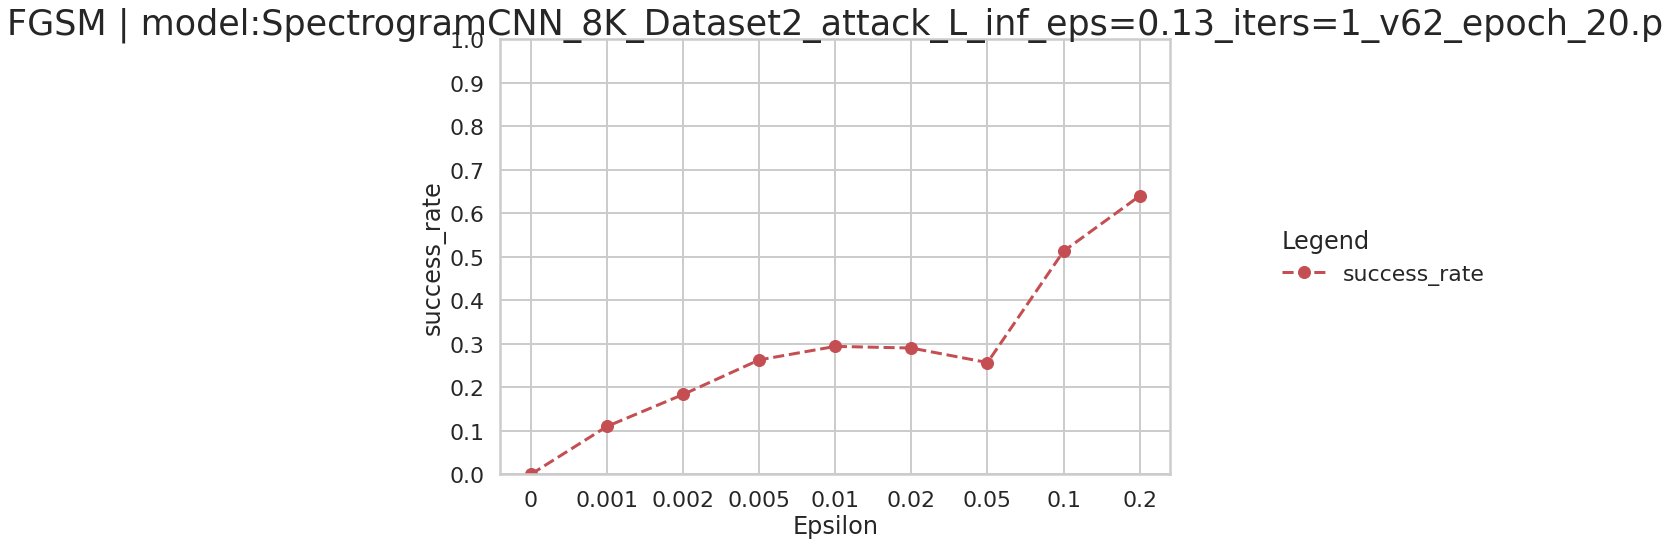

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v65.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:59<00:00,  6.66s/it]


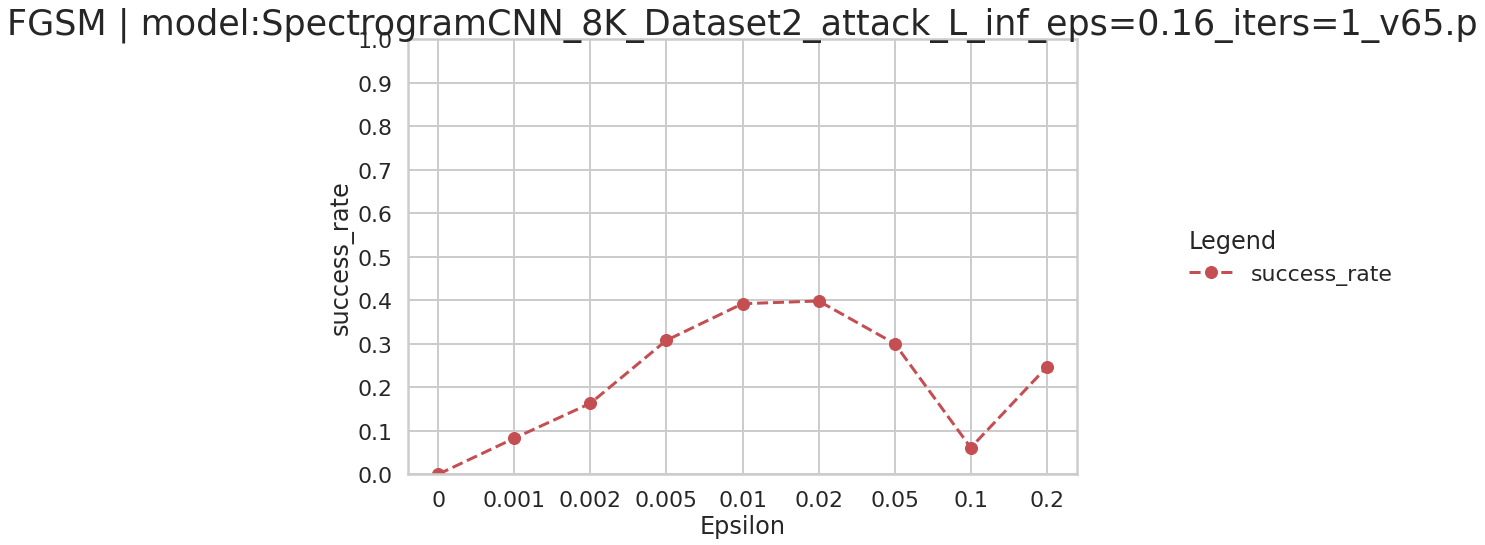

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:04<00:00,  7.14s/it]


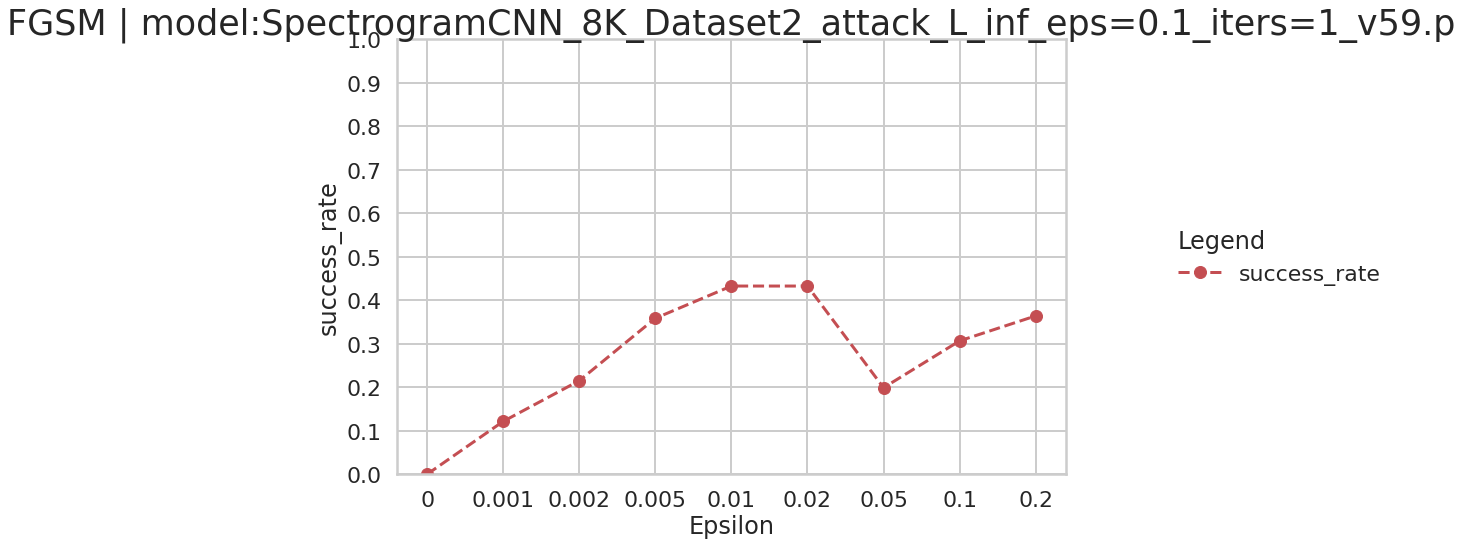

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v61.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:00<00:00,  6.74s/it]


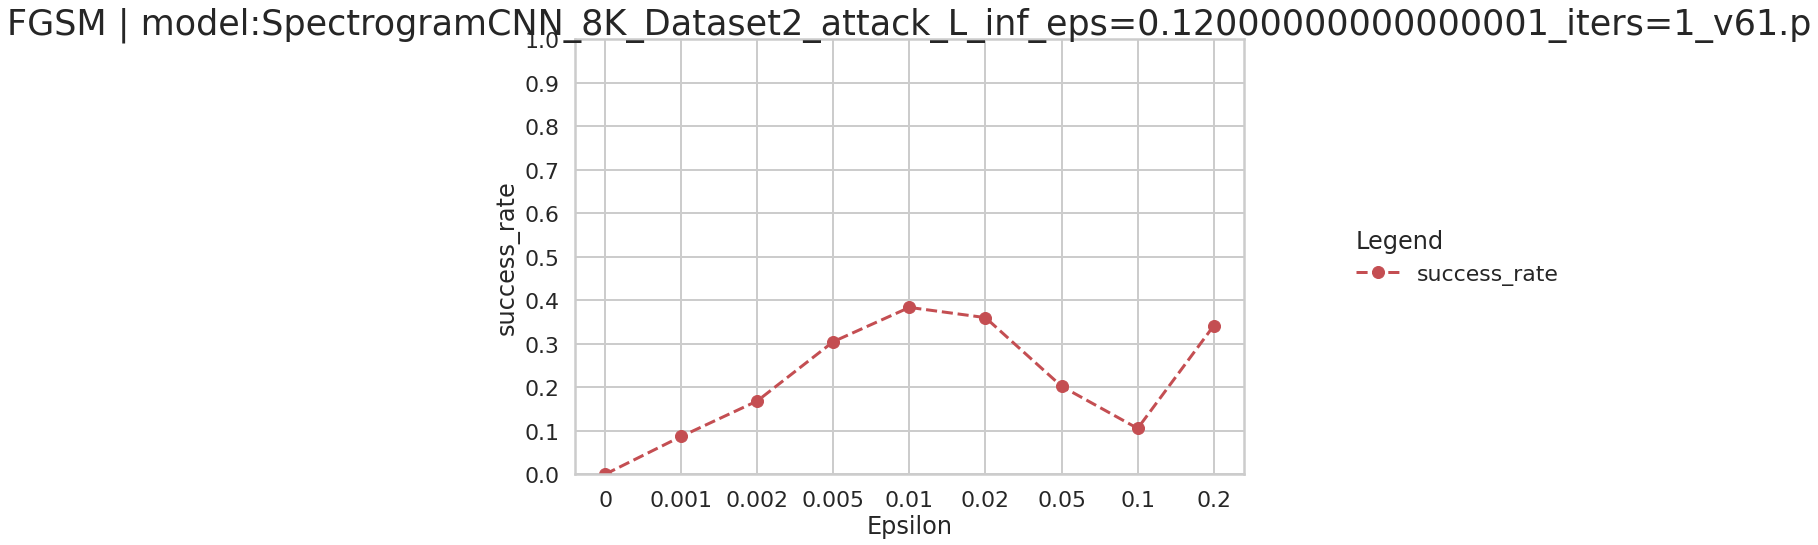

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v59_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [01:05<00:00,  7.33s/it]


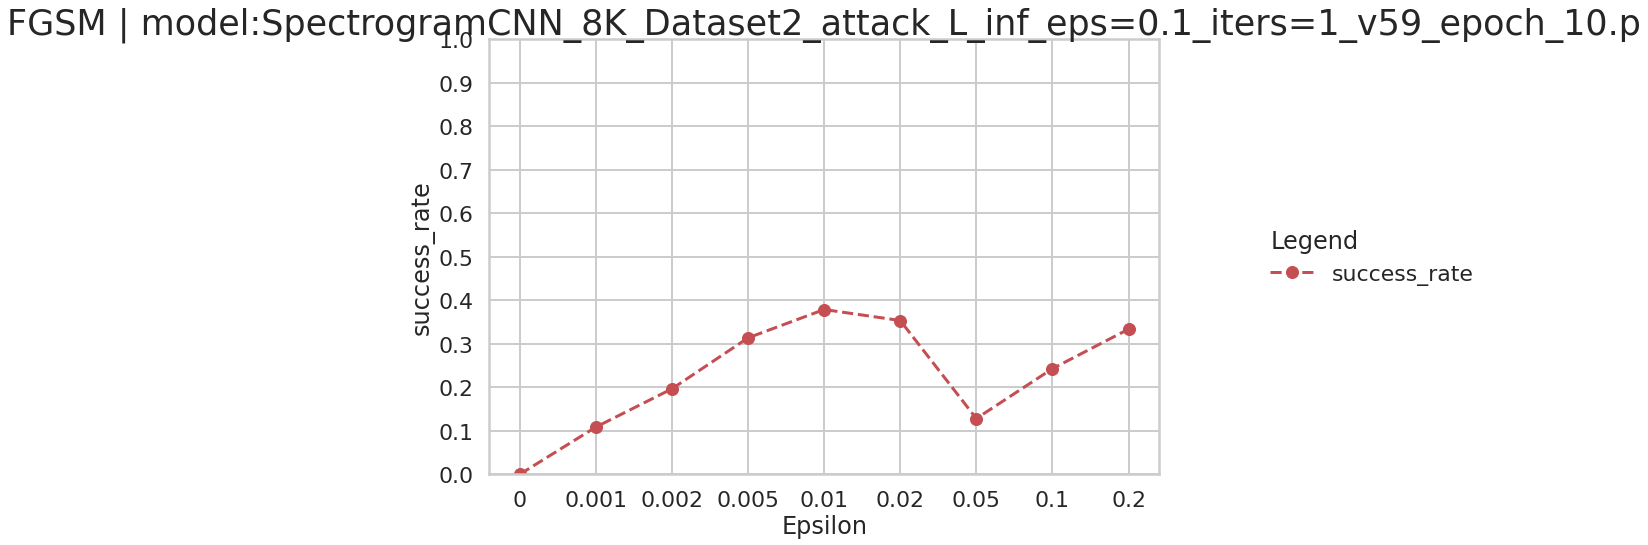

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v68_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:50<00:00,  5.57s/it]


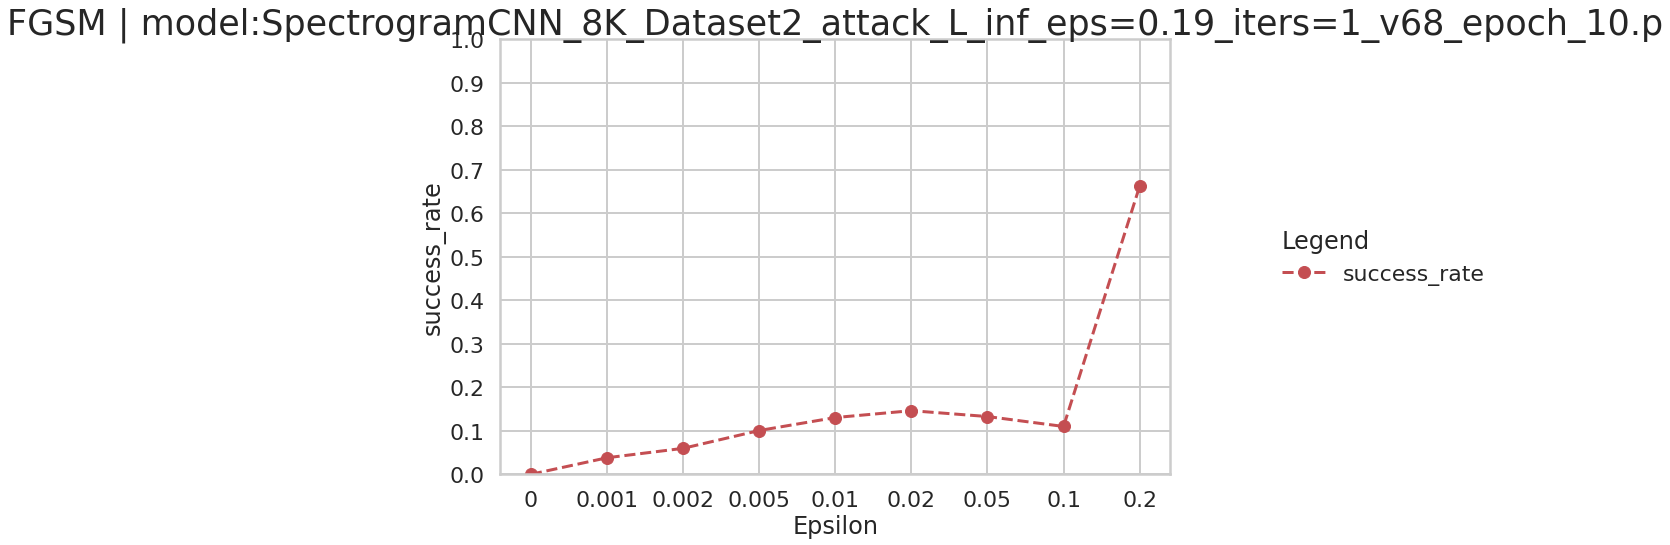

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v55_epoch_20.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v55_epoch_20.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v53_epoch_10.p

Perform Attack #1/1: FGSM
Attack FGSM h

  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v77_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v77_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:49<00:00,  5.50s/it]


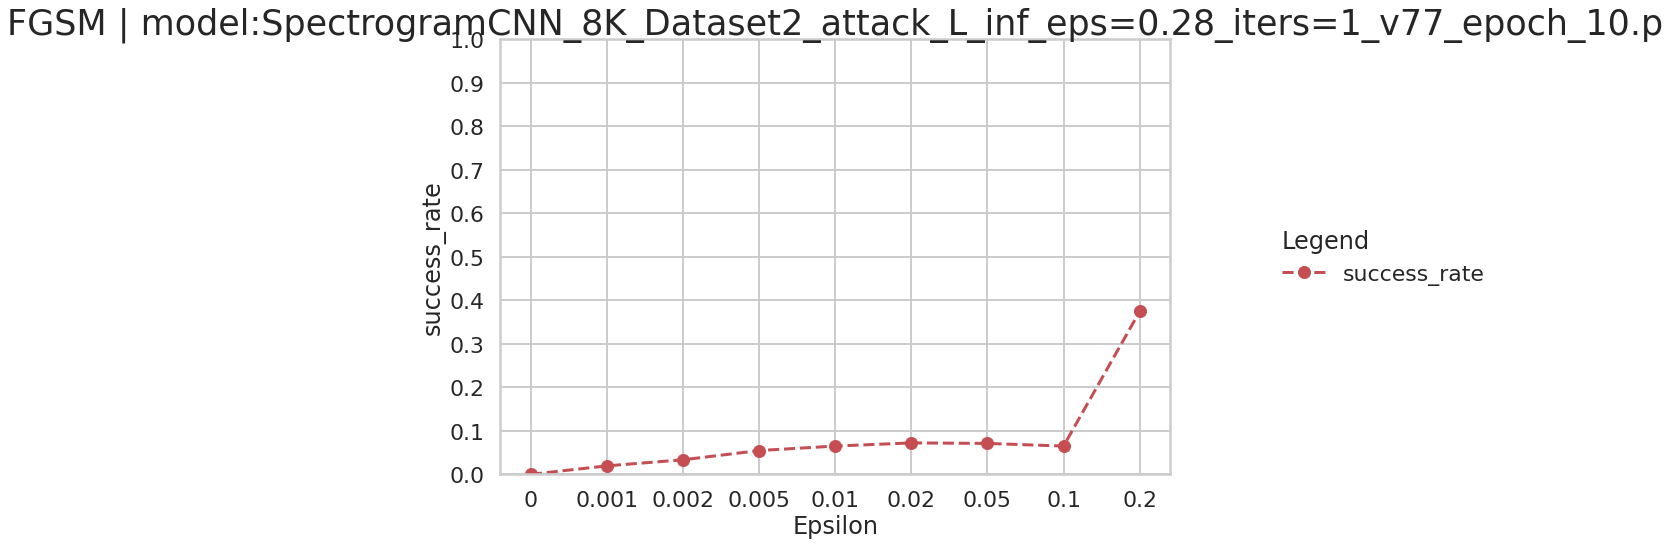

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v77_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v77_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:48<00:00,  5.37s/it]


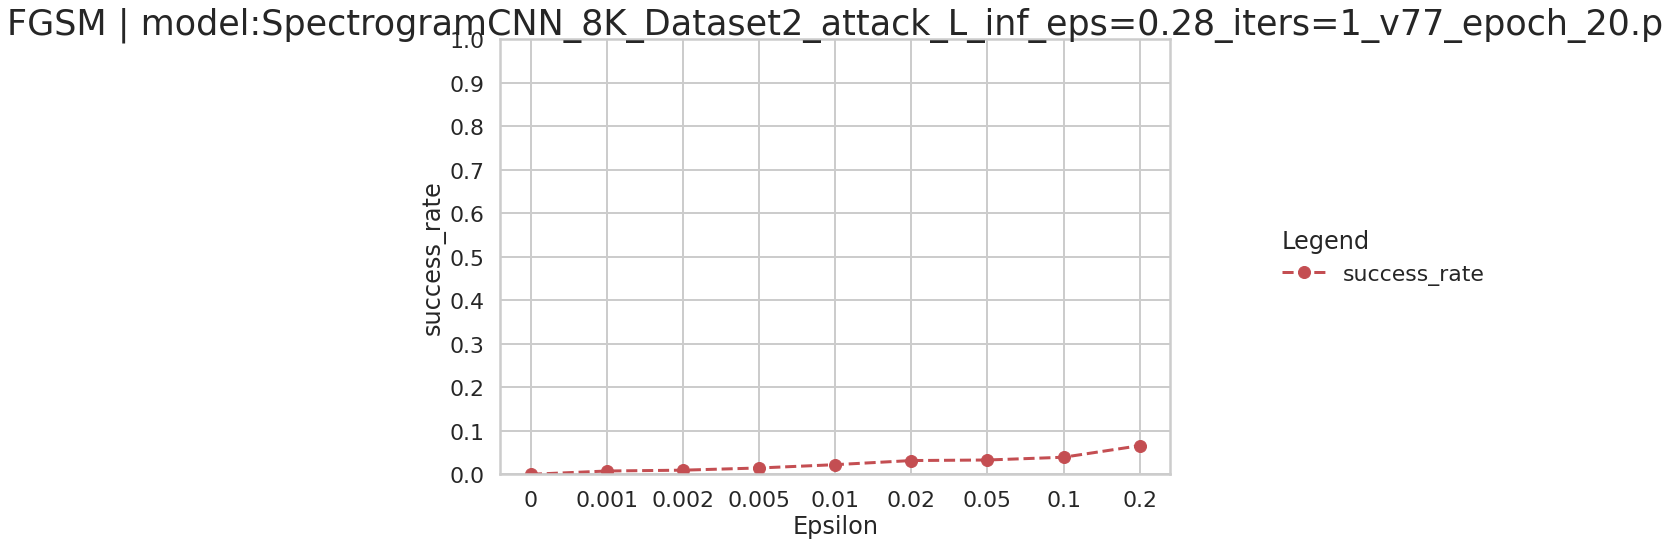

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v70_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:59<00:00,  6.66s/it]


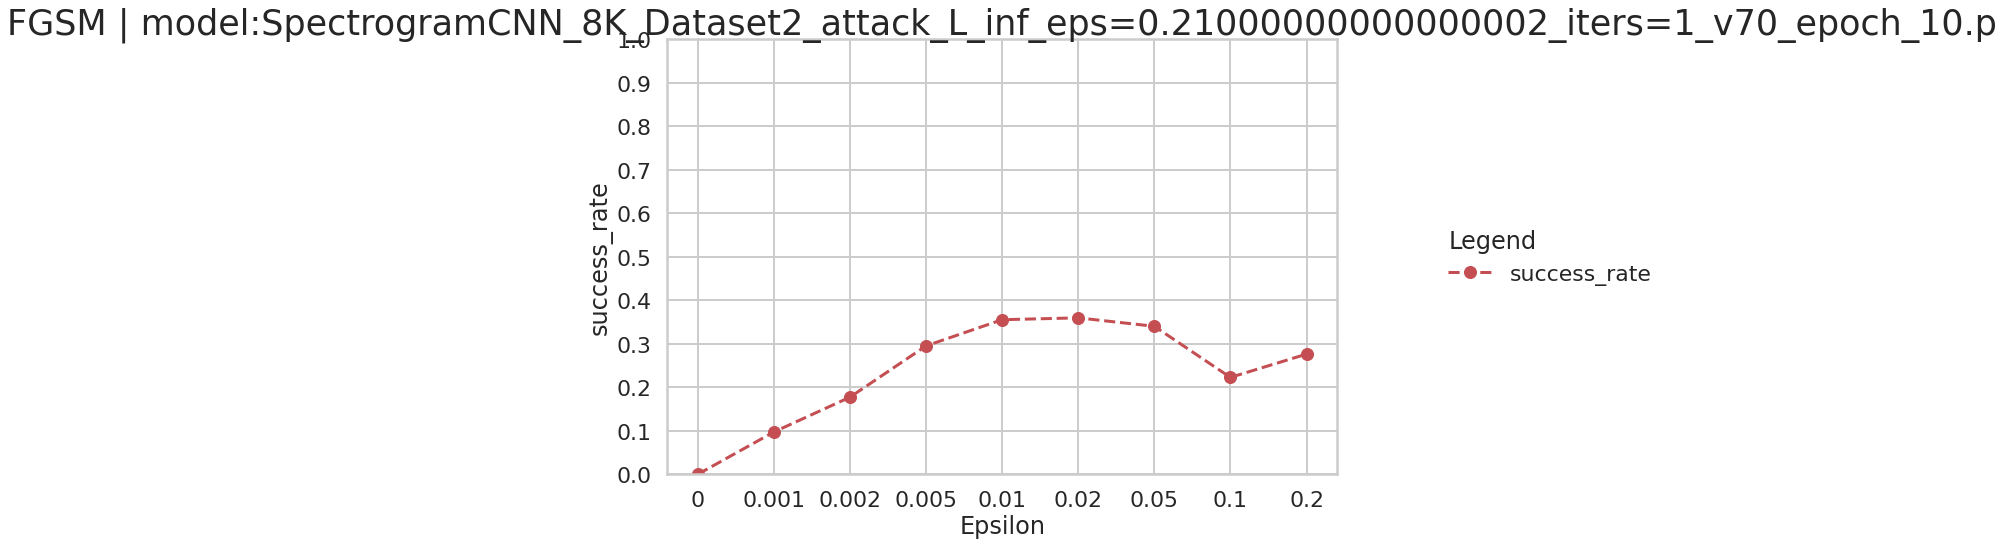

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63_epoch_20.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v63_epoch_20.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:54<00:00,  6.06s/it]


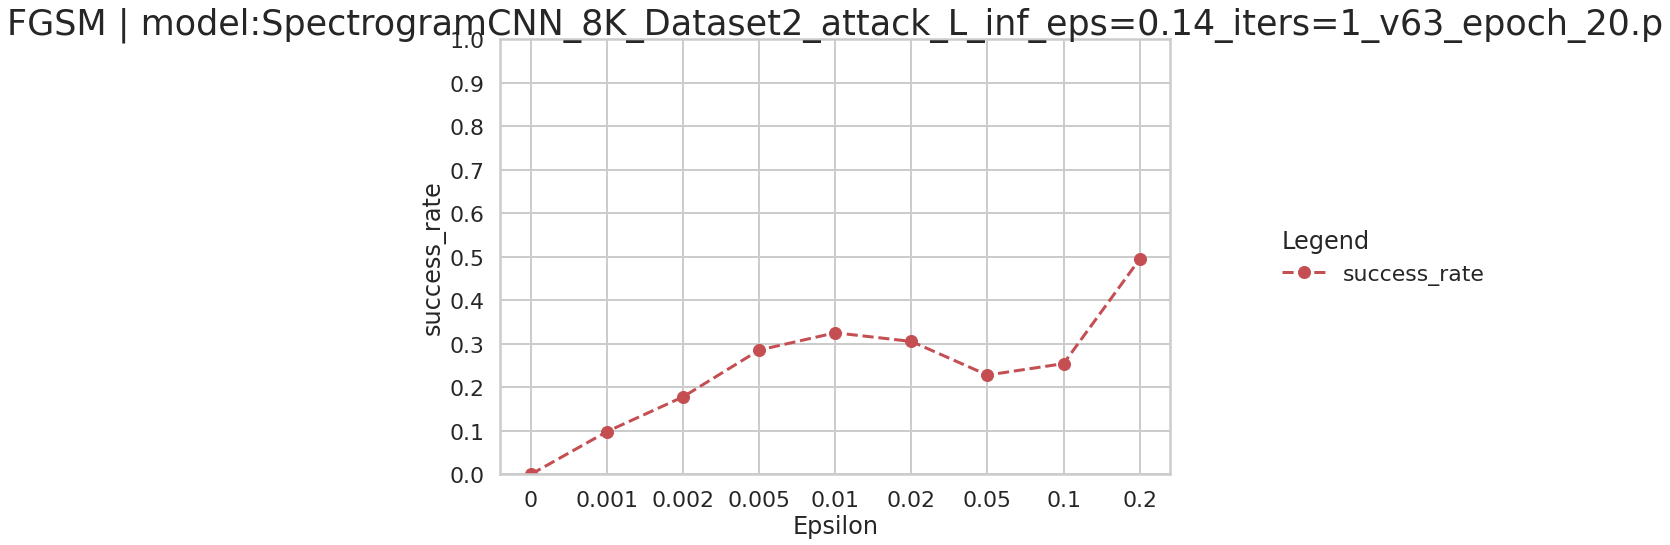

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.26_iters=1_v75.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.26_iters=1_v75.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:49<00:00,  5.55s/it]


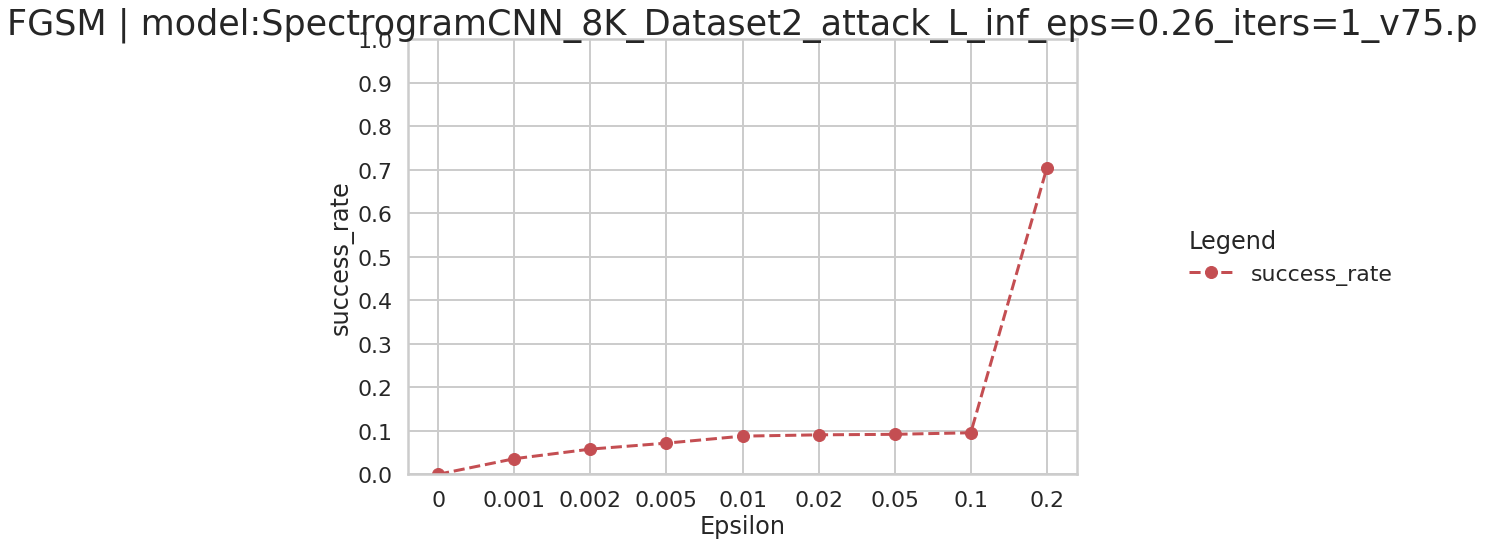

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0025_EVAL_DATASET2/backup.pickle"


In [8]:
import os
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
experiment = load_experiment(exp_folder = "0025_EVAL_DATASET2")

directory = "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/"
for filename in os.listdir(directory):
    experiment.run(directory + filename, SpectrogramCNN_8K_Dataset2_PLModule, dataset_id=config.DATASET_CONTROL)

Loaded model 0040_Ablation_DATASET1
Loading cached training data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_8k/
Loading cached validation data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model best_melSpec_0.8755186721991701best.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0040_Ablation_DATASET1/best_melSpec_0.8755186721991701best.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:35<00:00,  3.96s/it]


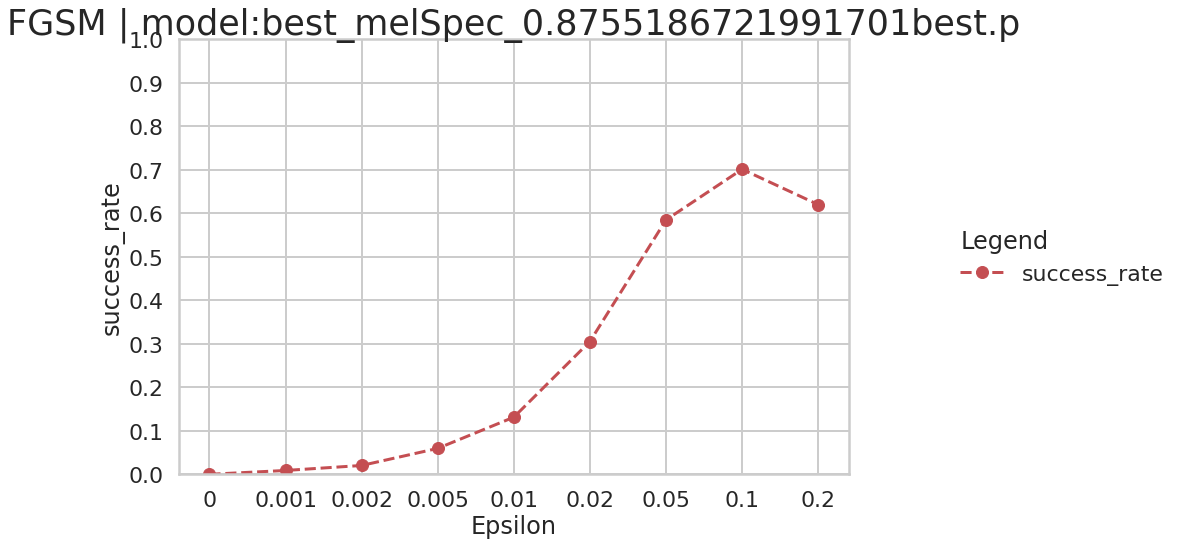

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0040_Ablation_DATASET1/backup.pickle"


In [11]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
experiment = load_experiment(exp_folder = "0040_Ablation_DATASET1")

state_dict_path = "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/AblationStudy/best_melSpec_0.8755186721991701best.p"
experiment.run(state_dict_path, AblationModelPLModule)#, dataset_id=config.DATASET_CONTROL)

In [1]:
#from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
#experiment = load_experiment(exp_folder = "0025_EVAL_DATASET2")

#for m in models:
    #experiment.run(m, AblationModelPLModule)#, dataset_id=config.DATASET_CONTROL)

ModuleNotFoundError: No module named 'utils'

In [12]:
experiment.show_best_models(best_n=10, metric="acc")


Attack = FGSM:
[(5.868998221695317, 'best_spec_0.8808535862477771.p'), (5.750444576170716, 'best_melSpec_0.8755186721991701best.p')]


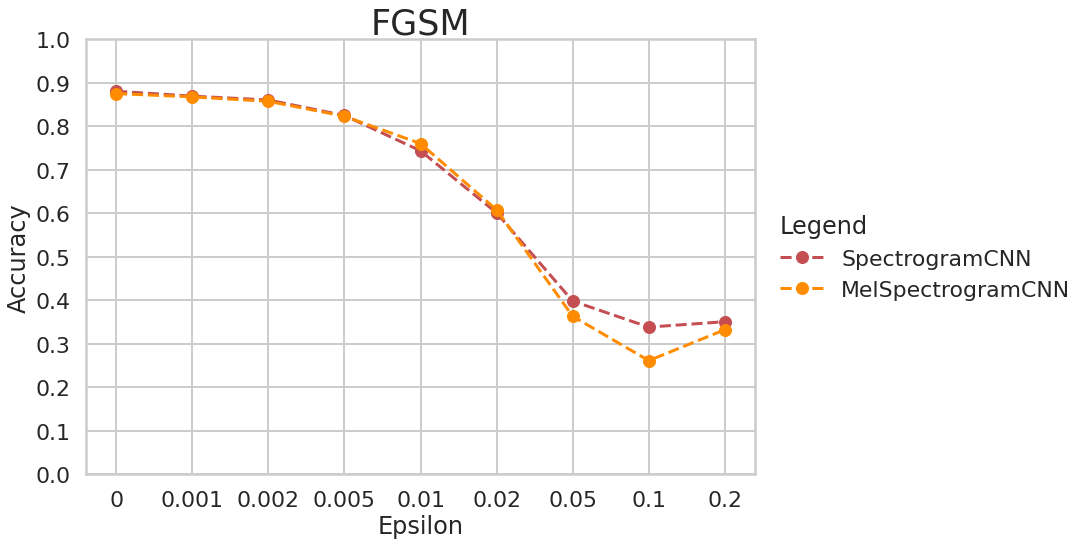

In [14]:
experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                        #("optuna_spec8kd2_0.9144.p", "SpectrogramCNN"),
                        ("best_spec_0.8808535862477771.p", "SpectrogramCNN"),
                        #("optuna_crnn8kd2_0.897.p", "CRNN"),
                        ("best_melSpec_0.8755186721991701best.p", "MelSpectrogramCNN")
                         ])